## 1. Introduction

The aim of this task is to perform both graphical and non-graphical EDA methods to understand the data and then detect data problems.

## 2. Load data

In [1]:
# import library
import pandas as pd

df = pd.read_csv('29481929_dirty_data.csv')
df.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$  
0        11418.06      9:41:27   22.12  
1         4213.56     12:11:28  272.76  
2        10340.10     10:57:01   19.71  
3         3186.42     21:39:46   23.87  
4         3069.78     12:17:44   16.98

There is one unnamed column, let's change the column name to 'ID'.

In [2]:
# Load dirty data into dataframe
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$  
0        11418.06      9:41:27   22.12  
1         4213.56     12:11:28  272.76  
2        10340.10     10:57:01   19.71  
3         3186.42     21:39:46   23.87  
4         3069.78     12:17:44   16.98

In [3]:
# Load nodes.csv into dataframe
nodes = pd.read_csv('nodes.csv')
nodes.head()

Unnamed: 0        lat         lon
0   711327755 -37.807675  144.955873
1   711327756 -37.807094  144.955978
2   711327759 -37.807301  144.957817
3   711327760 -37.807885  144.957719
4   777781264 -37.805221  144.952173

In [4]:
# Rename the unnammed column
nodes.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
nodes.head()

ID        lat         lon
0  711327755 -37.807675  144.955873
1  711327756 -37.807094  144.955978
2  711327759 -37.807301  144.957817
3  711327760 -37.807885  144.957719
4  777781264 -37.805221  144.952173

In [5]:
# load edges.csv into dataframe
edges = pd.read_csv('edges.csv')
edges.head()

Unnamed: 0          u          v  distance(m)  street type  speed(km/h)
0           0  711327755  711332946         58.0            1         15.0
1           2  711327755   55725841         15.0            2         20.0
2           3  711327755  711327760        165.0            1         15.0
3           4  711327756  703557073          4.0            0         10.0
4           5  711327756  711332946          8.0            1         15.0

The unnamed column is useless, it can be dropped.

In [6]:
# drop the unnamed column
edges = edges.drop(columns = ['Unnamed: 0'])
edges.head()

u          v  distance(m)  street type  speed(km/h)
0  711327755  711332946         58.0            1         15.0
1  711327755   55725841         15.0            2         20.0
2  711327755  711327760        165.0            1         15.0
3  711327756  703557073          4.0            0         10.0
4  711327756  711332946          8.0            1         15.0

## 3. Exploratory Data Analysis And Fixing Errors in 29481929_dirty_data.csv.

### Blueprint

1. Value in ID column must be unique.
2. The latitude and longitude for Victoria, Australia is -37.020100 and 144.964600 respectively, any value that deviate significantly from this two numbers are suspicious.
3. Departure date must be a valid date.
4. Check Journey Distance using the nodes and edges file.
5. Departure time + travel time = arrival time. This relationship must hold at all time.
6. Check region against latitude and longitude
7. Build linear regression model for fare.
8. Check Uber Type (0,1,2)
9. Check Uber Type and Fare relation
10. Re-run regression model if any error is found in step 9.

#### 1. Value in ID column must be unique.

In [7]:
df[df['ID'].duplicated() == True]

Empty DataFrame
Columns: [ID, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

There are no duplicate records in the ID column.

#### 2. The latitude and longitude for Victoria, Australia is -37.020100 and 144.964600 respectively, any value that deviate significantly from this two numbers are suspicious.

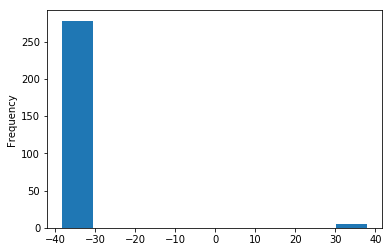

In [8]:
# import library
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# checking the distribution for origin latitude
df['Origin Latitude'].plot.hist()

In [9]:
df[df['Origin Latitude']>0]

ID  Uber Type  Origin Region  Destination Region  \
58  ID1252107401          0              6                   7   
59  ID3835460615          1              8                   7   
60  ID3919391906          1              5                   4   
62  ID3423877666          1              7                   5   
63  ID1813130282          0              5                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
58        37.787433        144.980377            -37.861835   
59        37.807202        145.026637            -37.861835   
60        37.804394        144.929245            -37.800987   
62        37.861835        144.905716            -37.801931   
63        37.809280        144.932047            -37.803873   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
58             144.905716              11633.0     2018-07-28       15:42:05   
59             144.905716              13986.0     2018-02-09       04:08:19   
60             144.992572               6400.0     2018-04-19       17:22:40   
62             144.937772              11437.0     2018-07-09       20:24:52   
63             144.947910               1831.0     2018-04-28       06:46:04   

    Travel Time(s) Arrival Time  Fare$  
58         3663.78     16:43:08  16.77  
59         4298.28      5:19:57  35.11  
60         1640.34     17:50:00  19.00  
62         3724.62     21:26:56  26.90  
63          470.22      6:53:54   8.14

The origin latitude of these 5 records are wrong, the values should be negative.<br>
The position of (37.787433, 144.980377) is somewhere near Japan.

In [10]:
# get the row index
idx_wrong_pos = df[df['Origin Latitude']>0].index
# negative values
val = list(-df[df['Origin Latitude']>0]['Origin Latitude'])

# change to negative values
for i in range(len(val)):
    df.loc[idx_wrong_pos[i], 'Origin Latitude'] = val[i]

In [11]:
df.loc[idx_wrong_pos]

ID  Uber Type  Origin Region  Destination Region  \
58  ID1252107401          0              6                   7   
59  ID3835460615          1              8                   7   
60  ID3919391906          1              5                   4   
62  ID3423877666          1              7                   5   
63  ID1813130282          0              5                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
58       -37.787433        144.980377            -37.861835   
59       -37.807202        145.026637            -37.861835   
60       -37.804394        144.929245            -37.800987   
62       -37.861835        144.905716            -37.801931   
63       -37.809280        144.932047            -37.803873   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
58             144.905716              11633.0     2018-07-28       15:42:05   
59             144.905716              13986.0     2018-02-09       04:08:19   
60             144.992572               6400.0     2018-04-19       17:22:40   
62             144.937772              11437.0     2018-07-09       20:24:52   
63             144.947910               1831.0     2018-04-28       06:46:04   

    Travel Time(s) Arrival Time  Fare$  
58         3663.78     16:43:08  16.77  
59         4298.28      5:19:57  35.11  
60         1640.34     17:50:00  19.00  
62         3724.62     21:26:56  26.90  
63          470.22      6:53:54   8.14

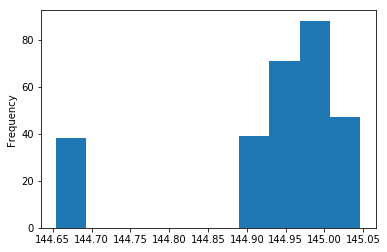

In [12]:
# check distribution of origin longitude
df['Origin Longitude'].plot.hist()

Seems no problem for origin longitude

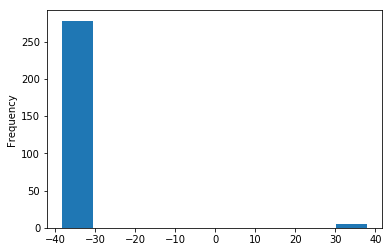

In [13]:
# check distribution for destination latitude
df['Destination Latitude'].plot.hist()

Same problem as origin latitude.

In [14]:
df[df['Destination Latitude']>0]

ID  Uber Type  Origin Region  Destination Region  \
69  ID3570472598          1              9                   8   
70  ID1921109087          0              7                   2   
73  ID3279191516          1              2                   6   
78  ID1153660828          0              3                   7   
80  ID5195862942          2              6                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
69       -38.110916        144.654173             37.807202   
70       -37.861835        144.905716             37.813105   
73       -37.812306        144.937436             37.773845   
78       -37.812470        144.973389             37.861835   
80       -37.787442        144.980409             37.815834   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
69             145.026637              49777.0     2018-07-15       11:25:52   
70             144.938555              10289.0     2018-07-08       18:47:01   
73             144.983689               7304.0     2018-03-10       20:50:43   
78             144.905716               8719.0     2018-04-11       04:17:20   
80             145.046450               8357.0     2018-03-17       15:33:20   

    Travel Time(s) Arrival Time   Fare$  
69        12099.66     14:47:31   61.05  
70         3376.20     19:43:17   17.52  
73         1641.00     21:18:04   22.58  
78         2957.82      5:06:37   15.18  
80         2437.38     16:13:57  173.86

In [15]:
# get the row index
idx_wrong_pos1 = df[df['Destination Latitude']>0].index
# negative values
val = list(-df[df['Destination Latitude']>0]['Destination Latitude'])

# change to negative values
for i in range(len(val)):
    df.loc[idx_wrong_pos1[i], 'Destination Latitude'] = val[i]

In [16]:
df.loc[idx_wrong_pos1]

ID  Uber Type  Origin Region  Destination Region  \
69  ID3570472598          1              9                   8   
70  ID1921109087          0              7                   2   
73  ID3279191516          1              2                   6   
78  ID1153660828          0              3                   7   
80  ID5195862942          2              6                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
69       -38.110916        144.654173            -37.807202   
70       -37.861835        144.905716            -37.813105   
73       -37.812306        144.937436            -37.773845   
78       -37.812470        144.973389            -37.861835   
80       -37.787442        144.980409            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
69             145.026637              49777.0     2018-07-15       11:25:52   
70             144.938555              10289.0     2018-07-08       18:47:01   
73             144.983689               7304.0     2018-03-10       20:50:43   
78             144.905716               8719.0     2018-04-11       04:17:20   
80             145.046450               8357.0     2018-03-17       15:33:20   

    Travel Time(s) Arrival Time   Fare$  
69        12099.66     14:47:31   61.05  
70         3376.20     19:43:17   17.52  
73         1641.00     21:18:04   22.58  
78         2957.82      5:06:37   15.18  
80         2437.38     16:13:57  173.86

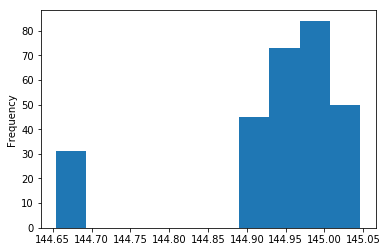

In [17]:
df['Destination Longitude'].plot.hist()

Seems no problem for destination longitude.

In [18]:
# make a copy of df as a checkpoint, in case something goes wrong, I can always go back to the last stage.
df1 = df.copy()

#### 3. Departure date must be a valid date.

In [19]:
# add a temporary column for working
df1['d_date'] = df1['Departure Date']
df1.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$      d_date  
0        11418.06      9:41:27   22.12  2018-03-05  
1         4213.56     12:11:28  272.76  2018-07-01  
2        10340.10     10:57:01   19.71  2018-04-16  
3         3186.42     21:39:46   23.87  2018-04-20  
4         3069.78     12:17:44   16.98  2018-06-26

In [20]:
# find out records with invalid dates
df1['d_date'] = pd.to_datetime(df1['d_date'], errors='coerce')
# get the row index for record with invalid date
idx_wrong_date = df1[df1['d_date'].isnull()].index
df1[df1['d_date'].isnull()]

ID  Uber Type  Origin Region  Destination Region  \
177  ID3453273661          1              2                   5   
181  ID3246124515          1              4                   6   
182  ID3949015407          1              6                   5   
187  ID5544969599          2              6                   7   
192  ID1161218823          0              2                   8   
193  ID3403080469          1              8                   7   
197  ID3329796129          1              8                   7   
201  ID3503987915          1              8                   2   
202  ID5618852309          2              6                   9   
203  ID1613013285          0              8                   7   
204  ID3907091786          1              9                   3   
206  ID3287344251          1              2                   6   
207  ID3919010904          1              7                   6   
208  ID3357782524          1              9                   3   
209  ID1273079392          0              9                   1   
210  ID3479890723          1              9                   2   
212  ID5724268075          2              9                   8   

     Origin Latitude  Origin Longitude  Destination Latitude  \
177       -37.813104        144.937488            -37.804452   
181       -37.810890        145.004109            -37.773845   
182       -37.790818        144.985793            -37.816956   
187       -37.787433        144.980377            -37.861835   
192       -37.820756        144.948472            -37.807202   
193       -37.815834        145.046450            -37.861835   
197       -37.815834        145.046450            -37.861835   
201       -37.815834        145.046450            -37.814965   
202       -37.790797        144.985865            -38.110916   
203       -37.815834        145.046450            -37.861835   
204       -38.110916        144.654173            -37.822089   
206       -37.815450        144.941596            -37.787433   
207       -37.861835        144.905716            -37.787433   
208       -38.110916        144.654173            -37.813274   
209       -38.110916        144.654173            -37.820250   
210       -38.110916        144.654173            -37.814727   
212       -38.110916        144.654173            -37.807202   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
177             144.926224               2028.0     2018-26-06       12:49:44   
181             144.983689               6933.0     2018-23-07       19:42:32   
182             144.927414               7583.0     2018-16-03       00:56:25   
187             144.905716              11633.0     2018-14-07       17:19:25   
192             145.026637               8071.0     2018-17-06       05:40:51   
193             144.905716              15151.0     2018-20-02       21:57:08   
197             144.905716              15151.0     2018-26-07       06:31:49   
201             144.927566              11849.0     2018-04-31       10:31:13   
202             144.654173              47193.0     2018-04-31       21:40:21   
203             144.905716              15151.0     2018-02-30       01:51:44   
204             144.969470              44263.0     2018-04-31       15:51:42   
206             144.980377               5599.0     2018-06-31       09:36:19   
207             144.980377              11633.0     2018-04-31       05:27:59   
208             144.973756              44330.0     2018-02-30       06:52:31   
209             144.970807              44231.0     2018-02-30       16:30:36   
210             144.937765              42599.0     2018-06-31       14:19:23   
212             145.026637              49777.0     2018-06-31       17:01:32   

     Travel Time(s) Arrival Time   Fare$ d_date  
177          552.36     12:58:56   12.77    NaT  
181         1479.06     20:07:11   19.73    NaT  
182         1938.24      1:28:43   24.36    Na

There are two problems with Departure Date:
1. Some of the dates are in the wrong format, i.e. YYYY-DD-MM.
2. Some of the dates are invalid, e.g. 2018-06-31.

For the 1st case, the dates will be changed to the format YYYY-MM-DD.<br>
For the 2nd case, the dates will be changed to the last date of that month. e.g. 2018-06-31 --> 2018-06-30


In [21]:
# replace the invalid date found above
df1.replace({'2018-26-06':'2018-06-26',
            '2018-23-07':'2018-07-23',
            '2018-16-03':'2018-03-16',
            '2018-14-07':'2018-07-14',
            '2018-17-06':'2018-06-17',
            '2018-20-02':'2018-02-20',
            '2018-26-07':'2018-07-26',
            '2018-04-31':'2018-04-30',
            '2018-02-30':'2018-02-28',
            '2018-06-31':'2018-06-30'}, inplace= True)

df1.loc[idx_wrong_date]

ID  Uber Type  Origin Region  Destination Region  \
177  ID3453273661          1              2                   5   
181  ID3246124515          1              4                   6   
182  ID3949015407          1              6                   5   
187  ID5544969599          2              6                   7   
192  ID1161218823          0              2                   8   
193  ID3403080469          1              8                   7   
197  ID3329796129          1              8                   7   
201  ID3503987915          1              8                   2   
202  ID5618852309          2              6                   9   
203  ID1613013285          0              8                   7   
204  ID3907091786          1              9                   3   
206  ID3287344251          1              2                   6   
207  ID3919010904          1              7                   6   
208  ID3357782524          1              9                   3   
209  ID1273079392          0              9                   1   
210  ID3479890723          1              9                   2   
212  ID5724268075          2              9                   8   

     Origin Latitude  Origin Longitude  Destination Latitude  \
177       -37.813104        144.937488            -37.804452   
181       -37.810890        145.004109            -37.773845   
182       -37.790818        144.985793            -37.816956   
187       -37.787433        144.980377            -37.861835   
192       -37.820756        144.948472            -37.807202   
193       -37.815834        145.046450            -37.861835   
197       -37.815834        145.046450            -37.861835   
201       -37.815834        145.046450            -37.814965   
202       -37.790797        144.985865            -38.110916   
203       -37.815834        145.046450            -37.861835   
204       -38.110916        144.654173            -37.822089   
206       -37.815450        144.941596            -37.787433   
207       -37.861835        144.905716            -37.787433   
208       -38.110916        144.654173            -37.813274   
209       -38.110916        144.654173            -37.820250   
210       -38.110916        144.654173            -37.814727   
212       -38.110916        144.654173            -37.807202   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
177             144.926224               2028.0     2018-06-26       12:49:44   
181             144.983689               6933.0     2018-07-23       19:42:32   
182             144.927414               7583.0     2018-03-16       00:56:25   
187             144.905716              11633.0     2018-07-14       17:19:25   
192             145.026637               8071.0     2018-06-17       05:40:51   
193             144.905716              15151.0     2018-02-20       21:57:08   
197             144.905716              15151.0     2018-07-26       06:31:49   
201             144.927566              11849.0     2018-04-30       10:31:13   
202             144.654173              47193.0     2018-04-30       21:40:21   
203             144.905716              15151.0     2018-02-28       01:51:44   
204             144.969470              44263.0     2018-04-30       15:51:42   
206             144.980377               5599.0     2018-06-30       09:36:19   
207             144.980377              11633.0     2018-04-30       05:27:59   
208             144.973756              44330.0     2018-02-28       06:52:31   
209             144.970807              44231.0     2018-02-28       16:30:36   
210             144.937765              42599.0     2018-06-30       14:19:23   
212             145.026637              49777.0     2018-06-30       17:01:32   

     Travel Time(s) Arrival Time   Fare$ d_date  
177          552.36     12:58:56   12.77    NaT  
181         1479.06     20:07:11   19.73    NaT  
182         1938.24      1:28:43   24.36    Na

The 'd_date' column can be dropped now.

In [22]:
df1 = df1.drop(columns = ['d_date'])
df1.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$  
0        11418.06      9:41:27   22.12  
1         4213.56     12:11:28  272.76  
2        10340.10     10:57:01   19.71  
3         3186.42     21:39:46   23.87  
4         3069.78     12:17:44   16.98

Since fare is dependent on the day of week, it will be useful to add a column to determine whether it was a weekday or weekend. <br>
A dummy variable 0 (weekday) and 1 (weekend) will be added for each row.

In [23]:
# function to determine weekday or weekend
def weekday_end(df):
    #change the departure date to datetime object
    df['Departure Date'] = df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
    
    # empty list to store result
    day_of_week =[]
    
    #iterate over rows and get day of week for each row
    for index, row in df.iterrows():
        day = row['Departure Date'].weekday()
        day_of_week.append(day)

    # empty list to store weekday or weekend
    week_day_end = []
    
    for i in day_of_week:
        # 0 and 6 means weekend
        if (i == 0) or (i==6):
            week_day_end.append('end')
        # otherwise weekday
        else:
            week_day_end.append('day')
    
    # insert a new column to dataframe
    df['weekend'] = week_day_end

In [24]:
weekday_end(df1)
df1.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$ weekend  
0        11418.06      9:41:27   22.12     end  
1         4213.56     12:11:28  272.76     end  
2        10340.10     10:57:01   19.71     end  
3         3186.42     21:39:46   23.87     day  
4         3069.78     12:17:44   16.98     day

Fare is also dependent on the departure time, we will now insert a new column that specifies the discrete number for time section (0,1,2).

In [25]:
# function to determine time section
def time_section(df):
    # change departure time to datetime object
    df['Departure Time work'] = pd.to_datetime(df['Departure Time'], errors='coerce')
    # initialize empty list to store result
    section = []
    
    for index, row in df.iterrows():
        if (row['Departure Time work'].hour >=6) and (row['Departure Time work'].hour <=11):
            section.append('morning')
        elif (row['Departure Time work'].hour >=12) and (row['Departure Time work'].hour <=20):
            section.append('afternoon')
        else:
            section.append('night')
    
    df['section'] = section

In [26]:
# determine time section
time_section(df1)
# drop the temporary column
df1 = df1.drop(columns = ['Departure Time work'])
df1.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$ weekend    section  
0        11418.06      9:41:27   22.12     end    morning  
1         4213.56     12:11:28  272.76     end    morning  
2        10340.10     10:57:01   19.71     end    morning  
3         3186.42     21:39:46   23.87     day  afternoon  
4         3069.78     12:17:44   16.98     day    morning

In [27]:
# make a copy of df as a checkpoint, in case something goes wrong, I can always go back to the last stage.
df2 = df1.copy()

#### 4. Check the journey distance using the nodes and edges file.
The networkx library will be used to find the shortest path between two places(nodes).<br>
Let's briefly explore the edge file.

In [28]:
edges.head(12)

u          v  distance(m)  street type  speed(km/h)
0   711327755  711332946         58.0            1         15.0
1   711327755   55725841         15.0            2         20.0
2   711327755  711327760        165.0            1         15.0
3   711327756  703557073          4.0            0         10.0
4   711327756  711332946          8.0            1         15.0
5   711327756  711331420         44.0            0         10.0
6   711327759  711331451          8.0            2         20.0
7   711327759  703557072          5.0            1         15.0
8   711327759  711331434         32.0            0         10.0
9   711327760  603633283         14.0            2         20.0
10  711327760  711331451         59.0            0         10.0
11  711327760  711327755        165.0            2         20.0

The graph for a road network is an undirected graph, however, these 2 nodes, namely 711327755 and 711327760 (row 2 and 11) are connected by 2 edges. This happens for many other nodes. I believe this is an error in the edge file. <br>
The decision I have to make is to determine which edge to use, since in an undirected graph, 2 nodes can only be connected by 1 edge.<br>

Option 1: Choose the first node (choose row 2 instead of 11).<br>
Option 2: Choose the second node (choose row 11 instead of row 2).<br>
Option 3: Choose the one with lower speed limit.<br>
Option 4: Choose the one with higher speed limit.

To test which of the above option is correct, I use the data from the missing value file (all the data is correct) and test the above option one by one, if I can calculate the Travel Time and Travel Distance in that file by using the edges file, my approach is correct.

Luckily, option 1 gives the correct answer. Now the edges file will be load into a undirected graph using networkx.

In [29]:
# import library
import networkx as nx

# initialize graph
G = nx.Graph()

# load edges into graph
for index, row in edges.iterrows():
    d = row['distance(m)']
    # change speed to m/s
    s = row['speed(km/h)']/3.6
    # calculate time
    t = d/s
    u = int(row['u'])
    v = int(row['v'])
    
    # if edge does not exist, add the edge (i.e. choose the first edge)
    if G.has_edge(u,v) == False:
        G.add_edge(u, v, distance = d, time = t)

Lets examine the first edge to ensure the data is loaded correctly.

In [30]:
G[711327760][711327755]

{'distance': 165.0, 'time': 39.599999999999994}

This is the first row of the edge dataframe, the result is correct.

We first need to lookup the location ID in the nodes dataframe by using the latitude and longitude.

In [31]:
nodes.head()

ID        lat         lon
0  711327755 -37.807675  144.955873
1  711327756 -37.807094  144.955978
2  711327759 -37.807301  144.957817
3  711327760 -37.807885  144.957719
4  777781264 -37.805221  144.952173

In [32]:
# initialize empty list to store result
ori_id_list =[]
des_id_list = []
#iterate over rows in the dataframe
for index, row in df2.iterrows():
    # extract the latitude and longitude for origin and destination
    ori_lat = row['Origin Latitude']
    ori_long = row['Origin Longitude']
    des_lat = row['Destination Latitude']
    des_long = row['Destination Longitude']
    
    #lookup id for origin
    ori_id = int(nodes[(nodes['lat'] == ori_lat) & (nodes['lon'] == ori_long)].iloc[0]['ID'])
    ori_id_list.append(ori_id)
    
    #lookup id for destination
    des_id = int(nodes[(nodes['lat'] == des_lat) & (nodes['lon'] == des_long)].iloc[0]['ID'])
    des_id_list.append(des_id)
df2['ori_id']= ori_id_list
df2['des_id'] = des_id_list

df2.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$ weekend    section      ori_id  \
0        11418.06      9:41:27   22.12     end    morning  4307007287   
1         4213.56     12:11:28  272.76     end    morning  2455254505   
2        10340.10     10:57:01   19.71     end    morning  5002706670   
3         3186.42     21:39:46   23.87     day  afternoon  1390575046   
4         3069.78     12:17:44   16.98     day    morning  3281123478   

       des_id  
0  5002706670  
1  1889485053  
2   579482318  
3  3215191991  
4  1390575046

We now have all the information required to calculate the shortest path between two places. <br>
As stated in the assignment specification, one row contains only 1 error, so the Jouney Distance for a row with incorrect date format must be correct. Lets retrieve the information from row 177 (a record with incorrect date format).

In [33]:
df2.loc[177]

ID                              ID3453273661
Uber Type                                  1
Origin Region                              2
Destination Region                         5
Origin Latitude                     -37.8131
Origin Longitude                     144.937
Destination Latitude                -37.8045
Destination Longitude                144.926
Journey Distance(m)                     2028
Departure Date           2018-06-26 00:00:00
Departure Time                      12:49:44
Travel Time(s)                        552.36
Arrival Time                        12:58:56
Fare$                                  12.77
weekend                                  day
section                            afternoon
ori_id                             634783951
des_id                             581787684
Name: 177, dtype: object

In [34]:
path = nx.dijkstra_path(G,634783951,581787684, weight = 'distance')
distance = 0
time = 0
for i in range(len(path)-1):
    u = path[i]
    v = path[i+1]
    d = G[u][v]['distance']
    t = G[u][v]['time']

    distance += d
    time += t

print('Distance: ',distance)
print('Time: ',time)

Distance:  2028.0
Time:  552.36


The calculated distance and time is the same as the Journey Distance and Travel Time.<br>
The calculated time is the same with the Travel Time(s) in the dataset, we can say that the travel time is correct for this record. However, if we encouter a case, where the calculated time is different from the Travel Time(s), we cannot automatically say that the Travel Time is wrong, this is because, there can be multiple shortest path between the two places, since the speed limit is different for each path, we need to loop over each shortest path and calculate the time, if we cannot find a match after looping through all the shortest path, we then can say that the Travel Time is wrong.
Now, we first add the calculated distance to the dataframe and compare the **calculated distance** with the **Journey Distance(m)**.

In [35]:
# initial empty list to store result
cal_dist = []

#iterate over rows
for index, row in df2.iterrows():
    # find shortest path between two nodes
    path = nx.dijkstra_path(G, row['ori_id'],row['des_id'], weight = 'distance')
    # initialize distance to 0
    distance = 0
    # initialize time to 0
    time = 0
    # loop over every edges
    for i in range(len(path)-1):
        # find the distance between each pair or edge
        d = G[path[i]][path[i+1]]['distance']
        # add the distance to total distance
        distance += d
        
    # append total distance to result list
    cal_dist.append(distance)
# add a new column to dataframe
df2['cal_dist'] = cal_dist


In [36]:
df2.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$ weekend    section      ori_id  \
0        11418.06      9:41:27   22.12     end    morning  4307007287   
1         4213.56     12:11:28  272.76     end    morning  2455254505   
2        10340.10     10:57:01   19.71     end    morning  5002706670   
3         3186.42     21:39:46   23.87     day  afternoon  1390575046   
4         3069.78     12:17:44   16.98     day    morning  3281123478   

       des_id  cal_dist  
0  5002706670   47186.0  
1  1889485053   13562.0  
2   579482318   42962.0  
3  3215191991    9557.0  
4  1390575046    9177.0

In [37]:
# import library
import numpy as np
# compare two Jounrey Distance against calculated distance
df2['match_d'] = np.where((df2['Journey Distance(m)'] == df2['cal_dist'])
                     , True, False)

In [38]:
# save the index for wrong distance record
idx_wrong_dist = df2[df2['match_d']==False].index

df2[df2['match_d']==False]


ID  Uber Type  Origin Region  Destination Region  \
6   ID3914035215          1              4                   2   
8   ID3822247553          1              5                   8   
9   ID3130964711          1              4                   7   
11  ID5645524671          2              5                   2   
16  ID1611746919          0              8                   4   

    Origin Latitude  Origin Longitude  Destination Latitude  \
6        -37.799894        144.989204            -37.822222   
8        -37.805734        144.928738            -37.815834   
9        -37.816543        145.005753            -37.861835   
11       -37.805928        144.938959            -37.809420   
16       -37.807202        145.026637            -37.799961   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
6              144.949747               5009.4     2018-07-21       15:08:51   
8              145.046450              10996.7     2018-01-27       21:36:06   
9              144.905716              11306.8     2018-03-08       21:30:51   
11             144.931671                896.9     2018-05-12       06:27:37   
16             144.989898               3667.9     2018-06-10       22:17:19   

    Travel Time(s) Arrival Time  Fare$ weekend    section      ori_id  \
6          1303.68     15:30:34  21.61     day  afternoon  2469584358   
8          3094.74     22:27:40  33.35     day      night   581712807   
9          3559.32     22:30:10  31.16     day      night  1463620940   
11          236.82      6:31:33  34.22     day    morning  4793613069   
16          984.48     22:33:43  15.55     end      night   304700558   

        des_id  cal_dist  match_d  
6    844490198    5003.0    False  
8   1889485053   10996.0    False  
9   1390575046   11301.0    False  
11    35726391     898.0    False  
16  2469584363    3668.0    False

In this case, we can basically drop the 'Journey Distance(m)' column and rename the 'cal_dist' column to 'Journey Distance(m)'.

In [39]:
# drop'Journey Distance(m)' and 'match' column
df2 = df2.drop(columns = ['Journey Distance(m)','match_d'])
# rename cal_dist column
df2.rename(columns = {'cal_dist':'Journey Distance(m)'}, inplace = True)
df2.loc[idx_wrong_dist]

ID  Uber Type  Origin Region  Destination Region  \
6   ID3914035215          1              4                   2   
8   ID3822247553          1              5                   8   
9   ID3130964711          1              4                   7   
11  ID5645524671          2              5                   2   
16  ID1611746919          0              8                   4   

    Origin Latitude  Origin Longitude  Destination Latitude  \
6        -37.799894        144.989204            -37.822222   
8        -37.805734        144.928738            -37.815834   
9        -37.816543        145.005753            -37.861835   
11       -37.805928        144.938959            -37.809420   
16       -37.807202        145.026637            -37.799961   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
6              144.949747     2018-07-21       15:08:51         1303.68   
8              145.046450     2018-01-27       21:36:06         3094.74   
9              144.905716     2018-03-08       21:30:51         3559.32   
11             144.931671     2018-05-12       06:27:37          236.82   
16             144.989898     2018-06-10       22:17:19          984.48   

   Arrival Time  Fare$ weekend    section      ori_id      des_id  \
6      15:30:34  21.61     day  afternoon  2469584358   844490198   
8      22:27:40  33.35     day      night   581712807  1889485053   
9      22:30:10  31.16     day      night  1463620940  1390575046   
11      6:31:33  34.22     day    morning  4793613069    35726391   
16     22:33:43  15.55     end      night   304700558  2469584363   

    Journey Distance(m)  
6                5003.0  
8               10996.0  
9               11301.0  
11                898.0  
16               3668.0

In [40]:
# make a checkpoint
df3 = df2.copy()

In [41]:
# wrong record index
print(idx_wrong_dist)
print(idx_wrong_pos)
print(idx_wrong_pos1)
print(idx_wrong_date)


Int64Index([6, 8, 9, 11, 16], dtype='int64')
Int64Index([58, 59, 60, 62, 63], dtype='int64')
Int64Index([69, 70, 73, 78, 80], dtype='int64')
Int64Index([177, 181, 182, 187, 192, 193, 197, 201, 202, 203, 204, 206, 207,
            208, 209, 210, 212],
           dtype='int64')


#### 5. Departure time + travel time = arrival time. This relationship must hold at all time.

Now, we will compare Departure Time + Travel Time against Arrival Time.

In [42]:
import datetime

# change Departure Time to datetime object
df3['Departure Time work'] = pd.to_datetime(df3['Departure Time'],format = '%H:%M:%S',errors='coerce')

cal_time_list = []
for index, row in df3.iterrows():
    # add Travel time(s) to departure time
    cal_time = row['Departure Time work'] + datetime.timedelta(seconds = row['Travel Time(s)'])
    # change the datetime object back to string
    cal_time = cal_time.strftime('%H:%M:%S')
    # if the first character is a 0, strip it
    if cal_time[0] == '0':
        cal_time = cal_time[1:]
        
    cal_time_list.append(cal_time)
    
df3['cal_arrival_time'] = cal_time_list

In [43]:
df3.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time  Travel Time(s)  \
0             144.654173     2018-03-05       06:31:09        11418.06   
1             145.046450     2018-07-01       11:01:15         4213.56   
2             144.950585     2018-04-16       08:04:41        10340.10   
3             144.952078     2018-04-20       20:46:40         3186.42   
4             144.905716     2018-06-26       11:26:35         3069.78   

  Arrival Time   Fare$ weekend    section      ori_id      des_id  \
0      9:41:27   22.12     end    morning  4307007287  5002706670   
1     12:11:28  272.76     end    morning  2455254505  1889485053   
2     10:57:01   19.71     end    morning  5002706670   579482318   
3     21:39:46   23.87     day  afternoon  1390575046  3215191991   
4     12:17:44   16.98     day    morning  3281123478  1390575046   

   Journey Distance(m) Departure Time work cal_arrival_time  
0              47186.0 1900-01-01 06:31:09          9:41:27  
1              13562.0 1900-01-01 11:01:15         12:11:28  
2              42962.0 1900-01-01 08:04:41         10:57:01  
3               9557.0 1900-01-01 20:46:40         21:39:46  
4               9177.0 1900-01-01 11:26:35         12:17:44

In [44]:
# match arrival time column with calculated arrival time
df3['match'] = np.where((df3['Arrival Time'] == df3['cal_arrival_time'])
                     , True, False)
idx_wrong_time = df3[df3['match']==False][['Departure Time', 'Travel Time(s)','Arrival Time','cal_arrival_time','ori_id','des_id']].index
# show the reocrds that do not match
df3[df3['match']==False][['Departure Time', 'Travel Time(s)','Arrival Time','cal_arrival_time','ori_id','des_id']]

Departure Time  Travel Time(s) Arrival Time cal_arrival_time      ori_id  \
85        05:19:18        10196.04      8:08:08          8:09:14  1224869048   
86        16:41:42        10262.70     19:31:20         19:32:44  1132070463   
87        14:13:54         2901.76     15:00:59         15:02:15  2455254505   
88        04:27:22         1114.38      4:46:05          4:45:56  2204638282   
89        11:21:17        10242.90     14:11:38         14:11:59  5002706670   
91        14:52:44        11782.92     18:09:00         18:09:06  1140238688   
93        18:35:06         1158.16     18:53:11         18:54:24  2190478938   
94        09:33:02         3769.96     10:34:53         10:35:51  1889485053   
95        10:09:21          693.98     10:21:16         10:20:54  3114181724   
96        12:06:29         1801.58     12:36:49         12:36:30   304700558   
100       22:39:13         1558.26      0:58:57         23:05:11  2621587160   
103       12:32:40         2441.40     18:26:18         13:13:21  1889485053   
105       20:33:21          653.64      0:02:18         20:44:14   312719437   
107       13:08:28        11535.78     18:41:11         16:20:43  5002706670   
108       05:53:26         1914.42     10:53:45          6:25:20  4788000169   
113       00:34:44         1444.32      2:40:15          0:58:48  2346846623   
114       17:10:25        11267.46     20:40:21         20:18:12    30287552   
115       17:10:50         1982.10     20:00:57         17:43:52  4754200365   
117       19:13:42        11355.66     23:38:21         22:22:57  5002706670   
122       09:50:15         3700.98     12:08:00         10:51:55  1390575046   
145       22:27:31        10067.76     19:39:44          1:15:18   560991954   
147        0:02:23        11186.76     20:55:57          3:08:49   393115051   
149        7:19:06         3853.92     06:14:53          8:23:19  6237546486   
153        9:05:42          530.52     08:56:52          9:14:32   304700558   
154       22:24:41         1306.86     22:02:55         22:46:27  2397324975   
155       20:50:17         3070.02     19:59:07         21:41:27  1681675809   
157       22:56:28         1313.46     22:34:35         23:18:21  1280096200   
159        1:59:47         1017.12     01:42:50          2:16:44  2204638282   
164       14:45:50        12681.06     11:14:29         18:17:11  1889485053   
171       10:18:33         2001.84     09:45:12         10:51:54   304700558   

         des_id  
85   5002706670  
86   5002706670  
87   4283908155  
88    356098227  
89    634777968  
91   5002706670  
93   4307007286  
94   3164000430  
95    253027644  
96    844495283  
100   591435934  
103   289597227  
105  4283908132  
107  4307007286  
108   452380999  
113  4893628973  
114  5002706670  
115  2204638282  
117  2204638282  
122  4307007287  
145  5002706670  
147  5002706670  
149  1390575046  
153   728165676  
154  4283908176  
155  1390575046  
157  4307007286  
159  5668009765  
164  5002706670  
171  2455254499

There are 30 records in which the Departure Time + Travel Time = Arrival Time relation is violated.

#### 5.1 Incorrect travel time.

We will now match the calculated travel time for all shortest path using the edge file against the Travel Time column.

In [45]:
# empty list to store result
match = []
# iterate over each row
for index, row in df3.iterrows():
    # initialize flag to False
    result = False
    # find all the shortest path
    path_set = nx.all_shortest_paths(G, row['ori_id'],row['des_id'], weight = 'distance')
    # find the time for each shortest path
    for p in path_set:
        time = 0
        for i in range(len(p) -1):
            t = G[p[i]][p[i+1]]['time']

            time += t
        # if we find a match, change the flag to True
        if round(time,2) == round(row['Travel Time(s)'],2):
            result = True
            
    match.append(result)

In [46]:
# insert a new working column into the dataframe
df3['match_travel_time'] = match
# keep the index for wrong travel time record
idx_wrong_travel_time = df3[df3['match_travel_time']==False].index
# show all the records with incorrect travel time
df3[df3['match_travel_time']==False]

ID  Uber Type  Origin Region  Destination Region  \
85  ID1182330006          0              2                   9   
86  ID3753087632          1              2                   9   
87  ID5294687459          2              6                   4   
88  ID3800350173          1              6                   3   
89  ID3953033849          1              9                   2   
91  ID3598515070          1              4                   9   
93  ID3678508184          1              1                   6   
94  ID3453812497          1              8                   5   
95  ID1624289073          0              1                   2   
96  ID5277677733          2              8                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
85       -37.813484        144.941131            -38.110916   
86       -37.811168        144.940287            -38.110916   
87       -37.773803        144.983647            -37.810092   
88       -37.787433        144.980377            -37.820729   
89       -38.110916        144.654173            -37.814818   
91       -37.801028        145.010451            -38.110916   
93       -37.814198        144.963228            -37.790797   
94       -37.815834        145.046450            -37.801524   
95       -37.810508        144.963722            -37.824546   
96       -37.807202        145.026637            -37.819663   

    Destination Longitude Departure Date Departure Time        ...         \
85             144.654173     2018-01-10       05:19:18        ...          
86             144.654173     2018-07-27       16:41:42        ...          
87             144.996006     2018-03-02       14:13:54        ...          
88             144.990979     2018-04-22       04:27:22        ...          
89             144.937531     2018-02-16       11:21:17        ...          
91             144.654173     2018-07-15       14:52:44        ...          
93             144.985865     2018-03-20       18:35:06        ...          
94             144.929412     2018-06-05       09:33:02        ...          
95             144.946792     2018-02-19       10:09:21        ...          
96             144.952026     2018-07-01       12:06:29        ...          

     Fare$ weekend    section      ori_id      des_id  Journey Distance(m)  \
85   27.73     day      night  1224869048  5002706670              42264.0   
86   55.34     day  afternoon  1132070463  5002706670              42422.0   
87  192.15     day  afternoon  2455254505  4283908155               9076.0   
88   25.75     end      night  2204638282   356098227               4497.0   
89   47.76     day    morning  5002706670   634777968              42622.0   
91   64.49     end  afternoon  1140238688  5002706670              48334.0   
93   16.25     day  afternoon  2190478938  4307007286               3978.0   
94   21.84     day    morning  1889485053  3164000430              13115.0   
95    5.18     end    morning  3114181724   253027644               2743.0   
96  137.27     end  afternoon   304700558   844495283               7731.0   

    Departure Time work  cal_arrival_time  match match_travel_time  
85  1900-01-01 05:19:18           8:09:14  False             False  
86  1900-01-01 16:41:42          19:32:44  False             False  
87  1900-01-01 14:13:54          15:02:15  False             False  
88  1900-01-01 04:27:22           4:45:56  False             False  
89  1900-01-01 11:21:17          14:11:59  False             False  
91  1900-01-01 14:52:44          18:09:06  False             False  
93  1900-01-01 18:35:06          18:54:24  False             False  
94  1900-01-01 09:33:02          10:35:51  False             False  
95  1900-01-01 10:09:21          10:20:54  False             False  
96  1900-01-01 12:06:29          12:36:30  False             False  

[10 rows x 22 columns]

Since 1 row contains only 1 error, if the Travel Time is wrong, that means, Departure Time and Arrival Time is correct, it seems like the correct travel time can be calculated by subtracting departure time from arrival time. <br>

However, all the travel time in the dataset are round to 2 decimal places, if we subract departure time from arrival time, we cannot find the decimals. In order to find the **TRUE** travel time, the following steps are involved:
1. subtract departure time from arrival time.
2. loop over all the shortest path between the two places, find the one with the travel time (round down to to nearest integer) which is the same as the result that we calculate from step 1. This would be the **TRUE** travel time.

In [47]:
#step 1

# change the arrival time to datetime object
arrive = pd.to_datetime(df3[df3['match_travel_time']==False]['Arrival Time'], errors='coerce')
# change the departure time to datetime object
depart = pd.to_datetime(df3[df3['match_travel_time']==False]['Departure Time'], errors='coerce')
# calculate true travel time
cal_travel_time = arrive-depart
# change time to seconds
cal_travel_time = list(cal_travel_time.dt.total_seconds())

cal_travel_time

[10130.0,
 10178.0,
 2825.0,
 1123.0,
 10221.0,
 11776.0,
 1085.0,
 3711.0000000000005,
 715.0,
 1820.0]

In [48]:
# step 2
# counter for looping over cal_travel_time
j = 0

true_travel_time = []
for idx, row in df3[df3['match_travel_time']==False].iterrows():
    path_set = nx.all_shortest_paths(G, row['ori_id'],row['des_id'], weight = 'distance')
    # find the time for each shortest path
    for p in path_set:
        time = 0
        for i in range(len(p) -1):
            t = G[p[i]][p[i+1]]['time']

            time += t
        # if we find a match, change the flag to True
        if int(time) == int(cal_travel_time[j]):
            true_travel_time.append(round(time,2))
            j+=1
            break
            
true_travel_time

[10130.04,
 10178.7,
 2825.76,
 1123.38,
 10221.9,
 11776.92,
 1085.16,
 3711.96,
 715.86,
 1820.58]

We can now correct the record with incorrect travel time.

In [49]:
# correct the travel time
for i in range(len(true_travel_time)):
    df3.loc[idx_wrong_travel_time[i], 'Travel Time(s)'] = true_travel_time[i]

Quite a number of working columns have been added, and the dataframe is now a bit messy, we now drop some working columns that we don't need.

In [50]:
df3 = df3.drop(columns=['match','match_travel_time','ori_id','des_id','cal_arrival_time'])

In [51]:
df3.loc[idx_wrong_time][['Departure Time', 'Travel Time(s)', 'Arrival Time']]

Departure Time  Travel Time(s) Arrival Time
85        05:19:18        10130.04      8:08:08
86        16:41:42        10178.70     19:31:20
87        14:13:54         2825.76     15:00:59
88        04:27:22         1123.38      4:46:05
89        11:21:17        10221.90     14:11:38
91        14:52:44        11776.92     18:09:00
93        18:35:06         1085.16     18:53:11
94        09:33:02         3711.96     10:34:53
95        10:09:21          715.86     10:21:16
96        12:06:29         1820.58     12:36:49
100       22:39:13         1558.26      0:58:57
103       12:32:40         2441.40     18:26:18
105       20:33:21          653.64      0:02:18
107       13:08:28        11535.78     18:41:11
108       05:53:26         1914.42     10:53:45
113       00:34:44         1444.32      2:40:15
114       17:10:25        11267.46     20:40:21
115       17:10:50         1982.10     20:00:57
117       19:13:42        11355.66     23:38:21
122       09:50:15         3700.98     12:08:00
145       22:27:31        10067.76     19:39:44
147        0:02:23        11186.76     20:55:57
149        7:19:06         3853.92     06:14:53
153        9:05:42          530.52     08:56:52
154       22:24:41         1306.86     22:02:55
155       20:50:17         3070.02     19:59:07
157       22:56:28         1313.46     22:34:35
159        1:59:47         1017.12     01:42:50
164       14:45:50        12681.06     11:14:29
171       10:18:33         2001.84     09:45:12

Records 85-96 are now fixed. It seems like the arrival time and departure time in some of the records have been incorrectly swapped. We will now fix this error.

#### 5.2 Swap departure time and arrival time.

In [52]:
# change the arrival time to datetime object
df3['arrival time work'] = pd.to_datetime(df3['Arrival Time'], errors='coerce')

cal_time_list = []

# add travel time to arrival time, if the result equals departure time, they need to be swap
for index, row in df3.iterrows():
    # add Travel time(s) to arrival time
    cal_time = row['arrival time work'] + datetime.timedelta(seconds = row['Travel Time(s)'])
    # change the datetime object back to string
    cal_time = cal_time.strftime('%H:%M:%S')
    # if the first character is a 0, strip it
    if cal_time[0] == '0':
        cal_time = cal_time[1:]
        
    cal_time_list.append(cal_time)
# add a new working column
df3['cal_arrival_time'] = cal_time_list

In [53]:
# empty list to store result
swap = []
# iterate over rows of dataframe
for idx, row in df3.iterrows():
    if row['cal_arrival_time'] == row['Departure Time']:
        swap.append(True)
    else:
        swap.append(False)
df3['swap'] = swap

In [54]:
# keep the index
idx_swap_time = df3[df3['swap'] == True].index
# show the records
df3[df3['swap']== True]

ID  Uber Type  Origin Region  Destination Region  \
145  ID1868304512          0              1                   9   
147  ID3936661386          1              3                   9   
149  ID5546773089          2              4                   7   
153  ID1671199521          0              8                   4   
154  ID1427609059          0              1                   4   
155  ID3202582495          1              1                   7   
157  ID1628005638          0              1                   6   
159  ID1114791410          0              6                   4   
164  ID1398131440          0              8                   9   
171  ID5310643193          2              8                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
145       -37.821133        144.947479            -38.110916   
147       -37.811792        144.998938            -38.110916   
149       -37.801956        145.003322            -37.861835   
153       -37.807202        145.026637            -37.812421   
154       -37.820153        144.942844            -37.811180   
155       -37.810073        144.976216            -37.861835   
157       -37.793692        144.947519            -37.790797   
159       -37.787433        144.980377            -37.799866   
164       -37.815834        145.046450            -38.110916   
171       -37.807202        145.026637            -37.773845   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
145             144.654173     2018-04-06       22:27:31        10067.76   
147             144.654173     2018-01-05        0:02:23        11186.76   
149             144.905716     2018-02-20        7:19:06         3853.92   
153             145.009823     2018-04-10        9:05:42          530.52   
154             145.000531     2018-07-04       22:24:41         1306.86   
155             144.905716     2018-01-20       20:50:17         3070.02   
157             144.985865     2018-01-21       22:56:28         1313.46   
159             145.002800     2018-01-03        1:59:47         1017.12   
164             144.654173     2018-06-22       14:45:50        12681.06   
171             144.983689     2018-04-12       10:18:33         2001.84   

    Arrival Time   Fare$ weekend    section  Journey Distance(m)  \
145     19:39:44   22.53     day      night              41874.0   
147     20:55:57   58.06     day      night              46724.0   
149     06:14:53  245.35     day    morning              12044.0   
153     08:56:52    3.02     day    morning               2235.0   
154     22:02:55   13.61     day      night               5637.0   
155     19:59:07   29.68     day  afternoon               9256.0   
157     22:34:35   17.05     end      night               4747.0   
159     01:42:50   12.36     day      night               4004.0   
164     11:14:29   25.11     day  afternoon              51032.0   
171     09:45:12  132.18     day    morning               8606.0   

    Departure Time work   arrival time work cal_arrival_time  swap  
145 1900-01-01 22:27:31 2019-05-05 19:39:44         22:27:31  True  
147 1900-01-01 00:02:23 2019-05-05 20:55:57          0:02:23  True  
149 1900-01-01 07:19:06 2019-05-05 06:14:53          7:19:06  True  
153 1900-01-01 09:05:42 2019-05-05 08:56:52          9:05:42  True  
154 1900-01-01 22:24:41 2019-05-05 22:02:55         22:24:41  True  
155 1900-01-01 20:50:17 2019-05-05 19:59:07         20:50:17  True  
157 1900-01-01 22:56:28 2019-05-05 22:34:35         22:56:28  True  
159 1900-01-01 01:59:47 2019-05-05 01:42:50          1:59:47  True  
164 1900-01-01 14:45:50 2019-05-05 11:14:29         14:45:50  True  
171 1900-01-01 10:18:33 2019-05-05 09:45:12         10:18:33  True

The arrival time and departure time for this 10 records need to be swap.

In [55]:
# list to store result
arrive = []
depart = []

# iterate over the row
for index, row in df3.loc[idx_swap_time].iterrows():
    arrive.append(row['Departure Time'])
    depart.append(row['Arrival Time'])

# swap departure and arrival time
for i in range(len(arrive)):
    df3.loc[idx_swap_time[i], 'Departure Time'] = depart[i]
    df3.loc[idx_swap_time[i], 'Arrival Time'] = arrive[i]

df3.loc[idx_swap_time]

ID  Uber Type  Origin Region  Destination Region  \
145  ID1868304512          0              1                   9   
147  ID3936661386          1              3                   9   
149  ID5546773089          2              4                   7   
153  ID1671199521          0              8                   4   
154  ID1427609059          0              1                   4   
155  ID3202582495          1              1                   7   
157  ID1628005638          0              1                   6   
159  ID1114791410          0              6                   4   
164  ID1398131440          0              8                   9   
171  ID5310643193          2              8                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
145       -37.821133        144.947479            -38.110916   
147       -37.811792        144.998938            -38.110916   
149       -37.801956        145.003322            -37.861835   
153       -37.807202        145.026637            -37.812421   
154       -37.820153        144.942844            -37.811180   
155       -37.810073        144.976216            -37.861835   
157       -37.793692        144.947519            -37.790797   
159       -37.787433        144.980377            -37.799866   
164       -37.815834        145.046450            -38.110916   
171       -37.807202        145.026637            -37.773845   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
145             144.654173     2018-04-06       19:39:44        10067.76   
147             144.654173     2018-01-05       20:55:57        11186.76   
149             144.905716     2018-02-20       06:14:53         3853.92   
153             145.009823     2018-04-10       08:56:52          530.52   
154             145.000531     2018-07-04       22:02:55         1306.86   
155             144.905716     2018-01-20       19:59:07         3070.02   
157             144.985865     2018-01-21       22:34:35         1313.46   
159             145.002800     2018-01-03       01:42:50         1017.12   
164             144.654173     2018-06-22       11:14:29        12681.06   
171             144.983689     2018-04-12       09:45:12         2001.84   

    Arrival Time   Fare$ weekend    section  Journey Distance(m)  \
145     22:27:31   22.53     day      night              41874.0   
147      0:02:23   58.06     day      night              46724.0   
149      7:19:06  245.35     day    morning              12044.0   
153      9:05:42    3.02     day    morning               2235.0   
154     22:24:41   13.61     day      night               5637.0   
155     20:50:17   29.68     day  afternoon               9256.0   
157     22:56:28   17.05     end      night               4747.0   
159      1:59:47   12.36     day      night               4004.0   
164     14:45:50   25.11     day  afternoon              51032.0   
171     10:18:33  132.18     day    morning               8606.0   

    Departure Time work   arrival time work cal_arrival_time  swap  
145 1900-01-01 22:27:31 2019-05-05 19:39:44         22:27:31  True  
147 1900-01-01 00:02:23 2019-05-05 20:55:57          0:02:23  True  
149 1900-01-01 07:19:06 2019-05-05 06:14:53          7:19:06  True  
153 1900-01-01 09:05:42 2019-05-05 08:56:52          9:05:42  True  
154 1900-01-01 22:24:41 2019-05-05 22:02:55         22:24:41  True  
155 1900-01-01 20:50:17 2019-05-05 19:59:07         20:50:17  True  
157 1900-01-01 22:56:28 2019-05-05 22:34:35         22:56:28  True  
159 1900-01-01 01:59:47 2019-05-05 01:42:50          1:59:47  True  
164 1900-01-01 14:45:50 2019-05-05 11:14:29         14:45:50  True  
171 1900-01-01 10:18:33 2019-05-05 09:45:12         10:18:33  True

#### 5.3 Record with wrong arrival time

In [56]:
# get the remaining records that have problem with time
idx_wrong_arrival_time = list(set(idx_wrong_time) - set(idx_wrong_travel_time) - set(idx_swap_time))

df3.loc[idx_wrong_arrival_time][['Departure Time','Travel Time(s)', 'Arrival Time']]

Departure Time  Travel Time(s) Arrival Time
100       22:39:13         1558.26      0:58:57
103       12:32:40         2441.40     18:26:18
105       20:33:21          653.64      0:02:18
107       13:08:28        11535.78     18:41:11
108       05:53:26         1914.42     10:53:45
113       00:34:44         1444.32      2:40:15
114       17:10:25        11267.46     20:40:21
115       17:10:50         1982.10     20:00:57
117       19:13:42        11355.66     23:38:21
122       09:50:15         3700.98     12:08:00

For these 10 records, we know that the Travel Time is correct. When the departure time + travel time = arrival time relation is violated, either Departure Time or Arrival Time is incorrect. <br>

One approach to check whether the departure time or arrival time is wrong is to run a linear regression base on the time period and compare the result to the fare$ column:
- morning (i.e. 0) (6:00:00 - 11:59:59)
- afternoon (i.e. 1) (12:00:00 - 20:59:59)
- night (i.e. 2) (21:00 - 5:59:59).

However, this approach will only work if departure time and arrival time overlap two time periods.

For example, in record 100, if we assume the departure time is correct, then the trip started at 22:39:13 and ended at 23:05:11. If we assume arrival time is correct, then the trip started at 00:32:58 and ended at 00:58:57. Both of these lie in the night session (21:00:00-05:59:59), so there is no possible way to solve this problem without making assumptions.

**Assumption: the departure time for records with this type of error is correct.**


In [57]:
df3.loc[idx_wrong_arrival_time]

ID  Uber Type  Origin Region  Destination Region  \
100  ID3651034111          1              4                   1   
103  ID3606721933          1              8                   1   
105  ID1339234536          0              1                   3   
107  ID1185901801          0              9                   6   
108  ID3915135542          1              5                   2   
113  ID3929301668          1              3                   5   
114  ID3900395885          1              4                   9   
115  ID3700634340          1              5                   6   
117  ID3855933007          1              9                   6   
122  ID3233051178          1              7                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
100       -37.800140        145.014110            -37.819055   
103       -37.815834        145.046450            -37.811433   
105       -37.800148        144.961491            -37.809049   
107       -38.110916        144.654173            -37.790797   
108       -37.799360        144.924813            -37.824990   
113       -37.809408        144.981048            -37.811313   
114       -37.803419        144.991490            -38.110916   
115       -37.814986        144.927421            -37.787433   
117       -38.110916        144.654173            -37.787433   
122       -37.861835        144.905716            -37.790818   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
100             144.965342     2018-06-07       22:39:13         1558.26   
103             144.951321     2018-03-05       12:32:40         2441.40   
105             144.983697     2018-07-28       20:33:21          653.64   
107             144.985865     2018-02-02       13:08:28        11535.78   
108             144.949677     2018-03-07       05:53:26         1914.42   
113             144.929907     2018-07-02       00:34:44         1444.32   
114             144.654173     2018-05-17       17:10:25        11267.46   
115             144.980377     2018-05-10       17:10:50         1982.10   
117             144.980377     2018-05-26       19:13:42        11355.66   
122             144.985793     2018-03-18       09:50:15         3700.98   

    Arrival Time  Fare$ weekend    section  Journey Distance(m)  \
100      0:58:57  23.92     day      night               5691.0   
103     18:26:18  23.43     end  afternoon               8618.0   
105      0:02:18   9.88     day  afternoon               2590.0   
107     18:41:11  27.12     day  afternoon              47193.0   
108     10:53:45  24.04     day      night               7249.0   
113      2:40:15  22.03     end      night               5691.0   
114     20:40:21  59.11     day  afternoon              46607.0   
115     20:00:57  19.44     day  afternoon               7867.0   
117     23:38:21  63.11     day  afternoon              47033.0   
122     12:08:00  27.54     end    morning              11712.0   

    Departure Time work   arrival time work cal_arrival_time   swap  
100 1900-01-01 22:39:13 2019-05-05 00:58:57          1:24:55  False  
103 1900-01-01 12:32:40 2019-05-05 18:26:18         19:06:59  False  
105 1900-01-01 20:33:21 2019-05-05 00:02:18          0:13:11  False  
107 1900-01-01 13:08:28 2019-05-05 18:41:11         21:53:26  False  
108 1900-01-01 05:53:26 2019-05-05 10:53:45         11:25:39  False  
113 1900-01-01 00:34:44 2019-05-05 02:40:15          3:04:19  False  
114 1900-01-01 17:10:25 2019-05-05 20:40:21         23:48:08  False  
115 1900-01-01 17:10:50 2019-05-05 20:00:57         20:33:59  False  
117 1900-01-01 19:13:42 2019-05-05 23:38:21          2:47:36  False  
122 1900-01-01 09:50:15 2019-05-05 12:08:00         13:09:40  False

In [58]:
# empty list to store result
cal_arrival_time = []

# loop over rows
for index, row in df3.loc[idx_wrong_arrival_time].iterrows():
    # add Travel time(s) to departure time
    cal_time = row['Departure Time work'] + datetime.timedelta(seconds = row['Travel Time(s)'])
    # change the datetime object back to string
    cal_time = cal_time.strftime('%H:%M:%S')
    # if the first character is a 0, strip it
    if cal_time[0] == '0':
        cal_time = cal_time[1:]
        
    cal_arrival_time.append(cal_time)

cal_arrival_time

['23:05:11',
 '13:13:21',
 '20:44:14',
 '16:20:43',
 '6:25:20',
 '0:58:48',
 '20:18:12',
 '17:43:52',
 '22:22:57',
 '10:51:55']

In [59]:
# Change the arrival time in the dataframe.
for i in range(len(cal_arrival_time)):
    df3.loc[idx_wrong_arrival_time[i], 'Arrival Time'] = cal_arrival_time[i]

df3.loc[idx_wrong_arrival_time]

ID  Uber Type  Origin Region  Destination Region  \
100  ID3651034111          1              4                   1   
103  ID3606721933          1              8                   1   
105  ID1339234536          0              1                   3   
107  ID1185901801          0              9                   6   
108  ID3915135542          1              5                   2   
113  ID3929301668          1              3                   5   
114  ID3900395885          1              4                   9   
115  ID3700634340          1              5                   6   
117  ID3855933007          1              9                   6   
122  ID3233051178          1              7                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
100       -37.800140        145.014110            -37.819055   
103       -37.815834        145.046450            -37.811433   
105       -37.800148        144.961491            -37.809049   
107       -38.110916        144.654173            -37.790797   
108       -37.799360        144.924813            -37.824990   
113       -37.809408        144.981048            -37.811313   
114       -37.803419        144.991490            -38.110916   
115       -37.814986        144.927421            -37.787433   
117       -38.110916        144.654173            -37.787433   
122       -37.861835        144.905716            -37.790818   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
100             144.965342     2018-06-07       22:39:13         1558.26   
103             144.951321     2018-03-05       12:32:40         2441.40   
105             144.983697     2018-07-28       20:33:21          653.64   
107             144.985865     2018-02-02       13:08:28        11535.78   
108             144.949677     2018-03-07       05:53:26         1914.42   
113             144.929907     2018-07-02       00:34:44         1444.32   
114             144.654173     2018-05-17       17:10:25        11267.46   
115             144.980377     2018-05-10       17:10:50         1982.10   
117             144.980377     2018-05-26       19:13:42        11355.66   
122             144.985793     2018-03-18       09:50:15         3700.98   

    Arrival Time  Fare$ weekend    section  Journey Distance(m)  \
100     23:05:11  23.92     day      night               5691.0   
103     13:13:21  23.43     end  afternoon               8618.0   
105     20:44:14   9.88     day  afternoon               2590.0   
107     16:20:43  27.12     day  afternoon              47193.0   
108      6:25:20  24.04     day      night               7249.0   
113      0:58:48  22.03     end      night               5691.0   
114     20:18:12  59.11     day  afternoon              46607.0   
115     17:43:52  19.44     day  afternoon               7867.0   
117     22:22:57  63.11     day  afternoon              47033.0   
122     10:51:55  27.54     end    morning              11712.0   

    Departure Time work   arrival time work cal_arrival_time   swap  
100 1900-01-01 22:39:13 2019-05-05 00:58:57          1:24:55  False  
103 1900-01-01 12:32:40 2019-05-05 18:26:18         19:06:59  False  
105 1900-01-01 20:33:21 2019-05-05 00:02:18          0:13:11  False  
107 1900-01-01 13:08:28 2019-05-05 18:41:11         21:53:26  False  
108 1900-01-01 05:53:26 2019-05-05 10:53:45         11:25:39  False  
113 1900-01-01 00:34:44 2019-05-05 02:40:15          3:04:19  False  
114 1900-01-01 17:10:25 2019-05-05 20:40:21         23:48:08  False  
115 1900-01-01 17:10:50 2019-05-05 20:00:57         20:33:59  False  
117 1900-01-01 19:13:42 2019-05-05 23:38:21          2:47:36  False  
122 1900-01-01 09:50:15 2019-05-05 12:08:00         13:09:40  False

In [60]:
# drop working column
df3 = df3.drop(columns = ['Departure Time work', 'arrival time work', 'cal_arrival_time', 'swap'])

In [61]:
# make a check point
df4 = df3.copy()

#### 6. Check region against latitude and longitude
##### 6.1 Check Origin Region

The easiest way to find out whether there is any wrong label of region is to plot latitude against logitude using a scatter plot. Since we have 9 region, if we plot all the 9 groups on the same scatter plot, it will be very messy and also hard for us to analyze whether there are any mislabelling of region. <br>

The approach that is used here is to plot only 2 regions at a time, if there is some clear overlap, then that point is mislabelled. There are 9C2 = 36 combinations.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


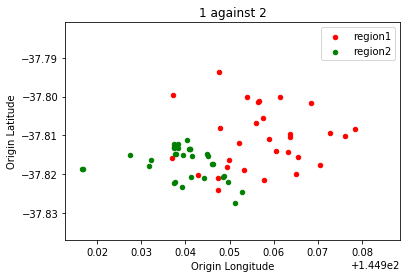

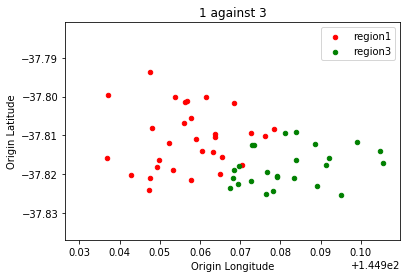

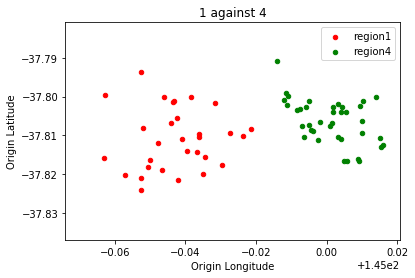

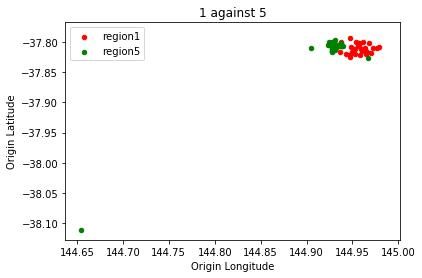

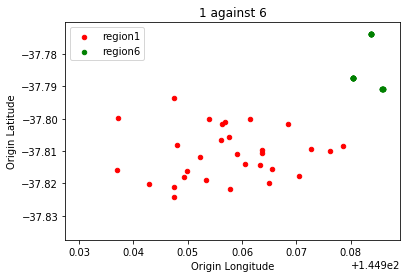

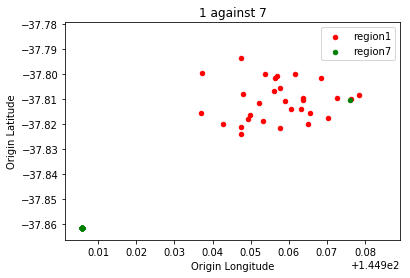

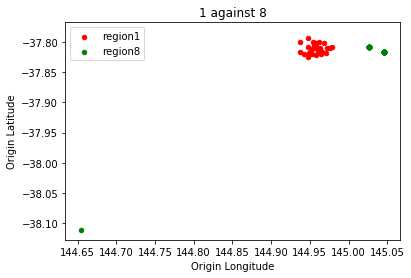

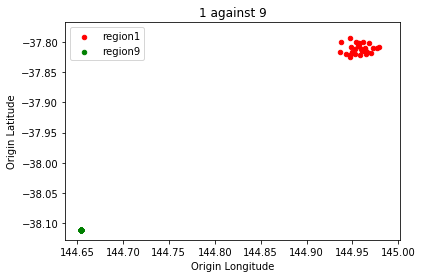

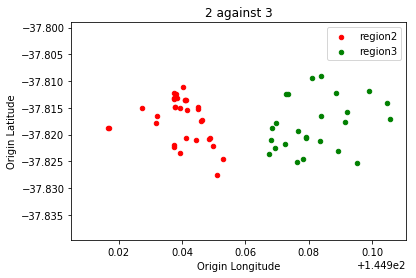

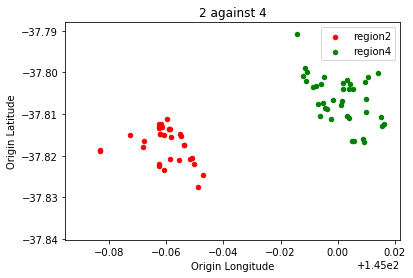

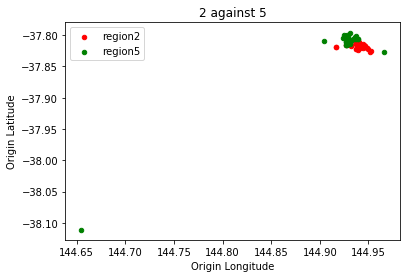

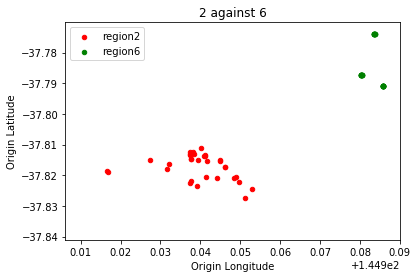

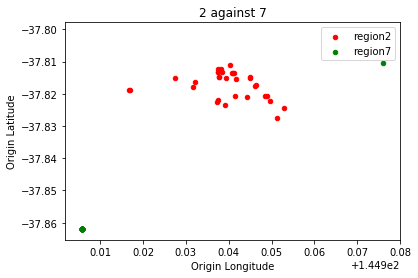

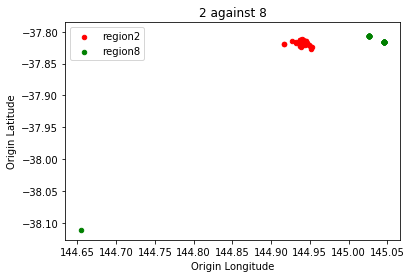

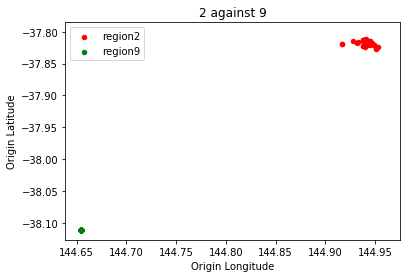

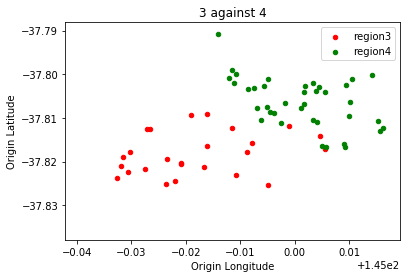

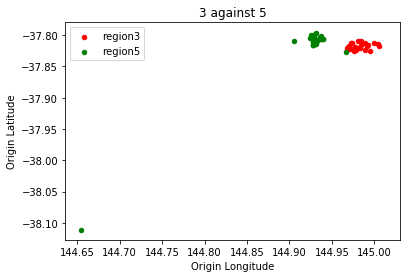

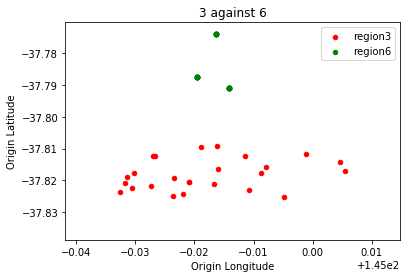

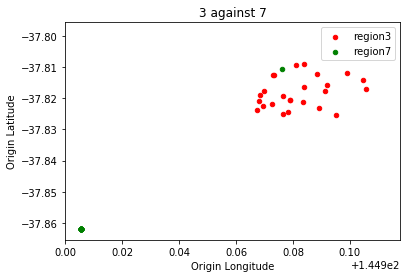

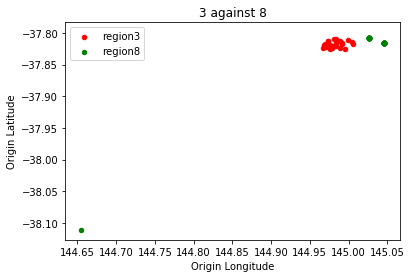

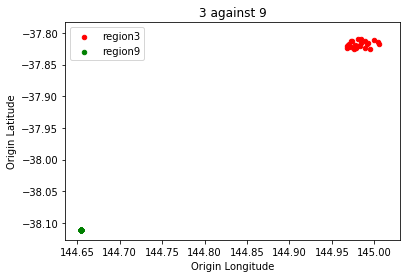

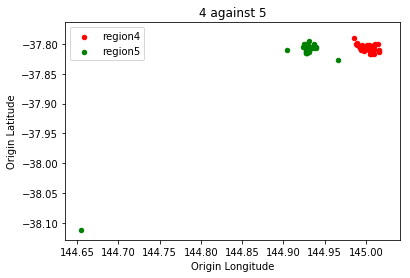

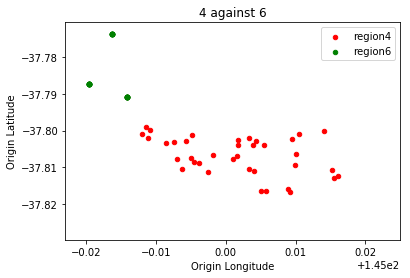

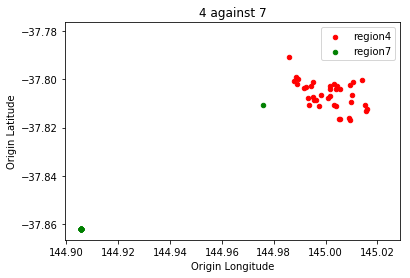

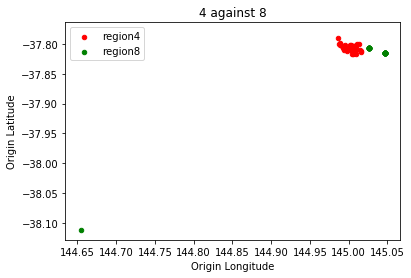

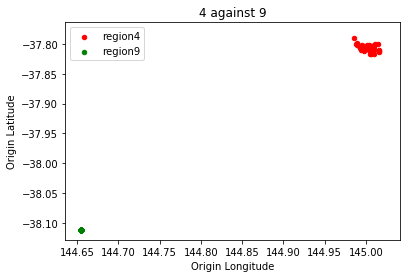

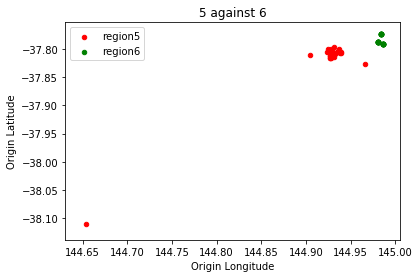

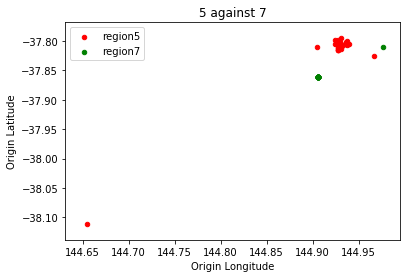

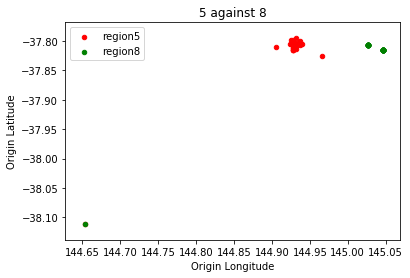

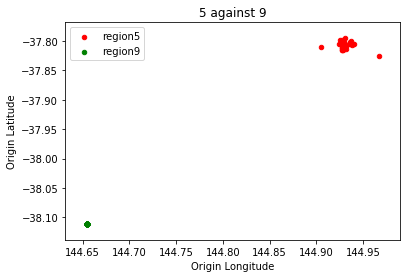

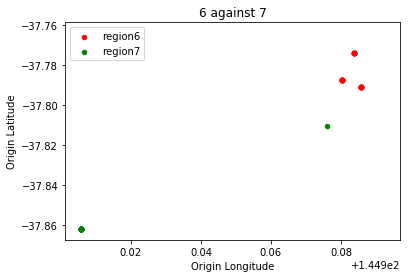

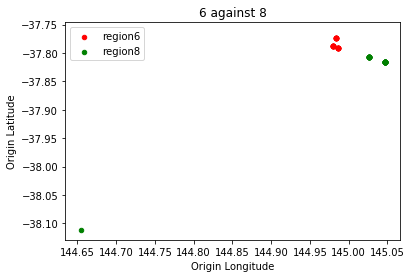

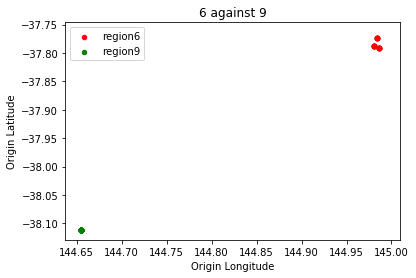

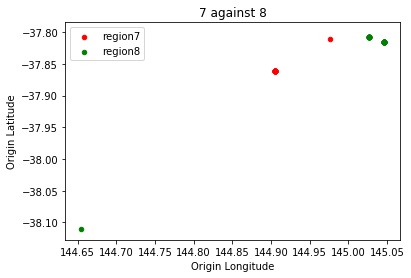

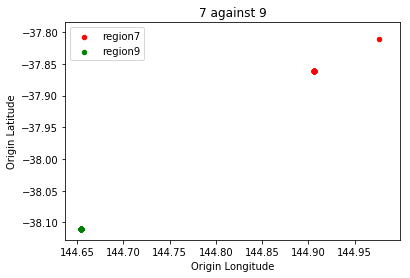

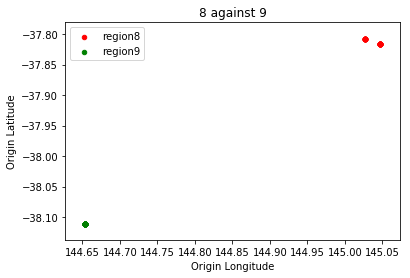

In [62]:
# loop over every pair and plot them
for i in range(9):
    for j in range(i+1,9):
        ax = df4[df4['Origin Region'] == (i+1)].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(i+1), color = 'red', title = str(i+1)+' against '+str(j+1))
        df4[df4['Origin Region'] == j+1].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(j+1), color = 'green',ax= ax)

It seems that some records that should have an Origin Region of 9 is mislabelled as 5 and 8. This problem will be fixed first because the extreme outliers mess up the scale of the graph. 

After this issue is fixed, the above code will be re-run to identified further problems.

In [63]:
df4[df4['Origin Longitude'] < 144.7]

ID  Uber Type  Origin Region  Destination Region  \
2    ID1888132431          0              9                   1   
13   ID5153339290          2              9                   3   
26   ID3277136036          1              5                   3   
34   ID1179263310          0              8                   4   
43   ID3216125880          1              9                   8   
69   ID3570472598          1              9                   8   
75   ID3635805909          1              9                   6   
84   ID1150179573          0              9                   6   
89   ID3953033849          1              9                   2   
107  ID1185901801          0              9                   6   
109  ID1584427949          0              9                   6   
112  ID3885009256          1              9                   8   
117  ID3855933007          1              9                   6   
123  ID3227002463          1              9                   7   
136  ID1138750457          1              9                   8   
137  ID3805201871          1              9                   8   
144  ID1663105806          0              9                   1   
162  ID1931316402          0              9                   2   
183  ID3298832885          1              9                   8   
198  ID5948097390          2              9                   5   
204  ID3907091786          1              9                   3   
208  ID3357782524          1              9                   3   
209  ID1273079392          0              9                   1   
210  ID3479890723          1              9                   2   
212  ID5724268075          2              9                   8   
219  ID3354228563          1              9                   4   
220  ID1261793144          0              9                   6   
226  ID3128003356          1              9                   6   
228  ID1317192593          0              9                   3   
239  ID3237463296          1              9                   1   
249  ID3307178448          1              9                   1   
256  ID3666534404          1              9                   4   
257  ID3452894613          1              9                   1   
270  ID1732910688          0              9                   4   
274  ID1331816049          0              9                   3   
279  ID1795035657          0              9                   2   
281  ID5828733658          2              9                   6   
282  ID3450951890          1              9                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
2         -38.110916        144.654173            -37.816776   
13        -38.110916        144.654173            -37.813957   
26        -38.110916        144.654173            -37.817485   
34        -38.110916        144.654173            -37.812230   
43        -38.110916        144.654173            -37.813900   
69        -38.110916        144.654173            -37.807202   
75        -38.110916        144.654173            -37.773845   
84        -38.110916        144.654173            -37.773803   
89        -38.110916        144.654173            -37.814818   
107       -38.110916        144.654173            -37.790797   
109       -38.110916        144.654173            -37.787433   
112       -38.110916        144.654173            -37.815834   
117       -38.110916        144.654173            -37.787433   
123       -38.110916        144.654173            -37.861835   
136       -38.110916        144.654173            -37.807202   
137       -38.110916        144.654173            -37.815834   
144       -38.110916        144.654173            -37.818809   
162       -38.110916        144.654173            -37.808957   
183       -38.110916        144.654173            -37.815834   
198       -38.110916        144.654173            -37.805357   
204       -38.110916        144.654173            -37.822

#### 6.1.1 The origin region for row 26 and 34 need to be changed to 9.

In [64]:
df4.loc[26,'Origin Region'] = 9
df4.loc[34, 'Origin Region'] = 9

df4.loc[[26,34]]

ID  Uber Type  Origin Region  Destination Region  \
26  ID3277136036          1              9                   3   
34  ID1179263310          0              9                   4   

    Origin Latitude  Origin Longitude  Destination Latitude  \
26       -38.110916        144.654173            -37.817485   
34       -38.110916        144.654173            -37.812230   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
26             145.004416     2018-02-12       15:33:09        11503.08   
34             145.015964     2018-01-28       17:42:42        11704.50   

   Arrival Time  Fare$ weekend    section  Journey Distance(m)  
26     18:44:52  60.35     end  afternoon              47319.0  
34     20:57:46  27.69     end  afternoon              48328.0

#### 6.1.2 Fixed the remaining error by building a classification model

Plot the graphs again.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


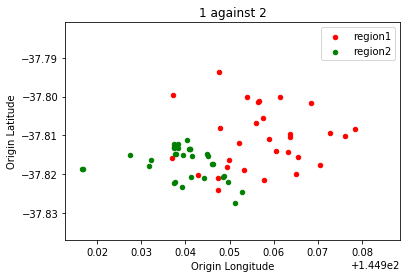

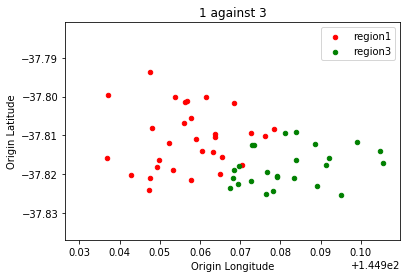

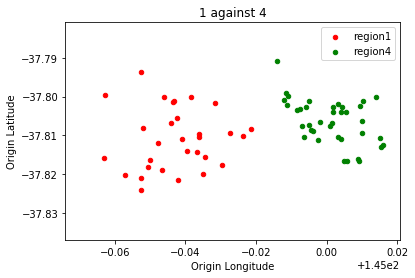

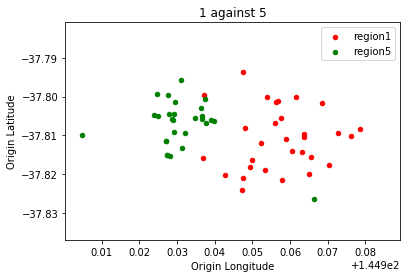

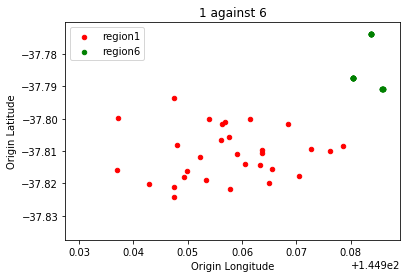

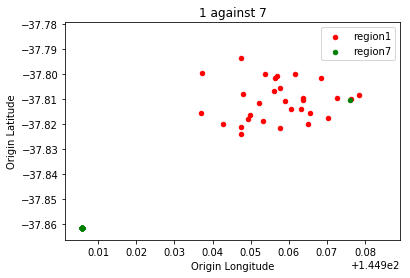

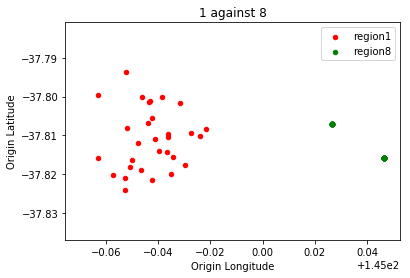

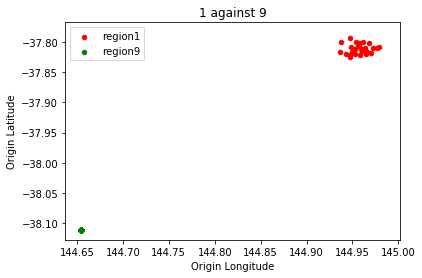

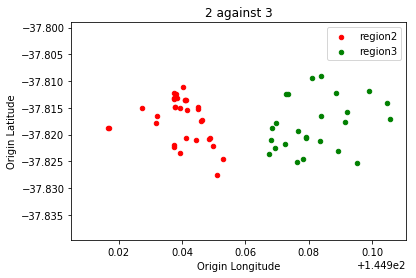

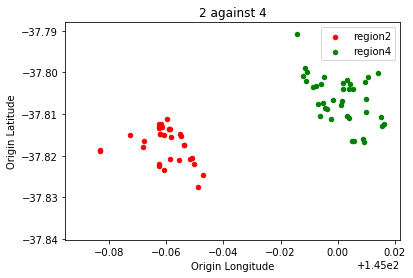

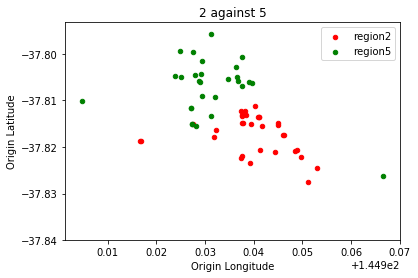

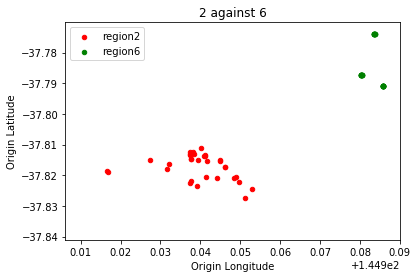

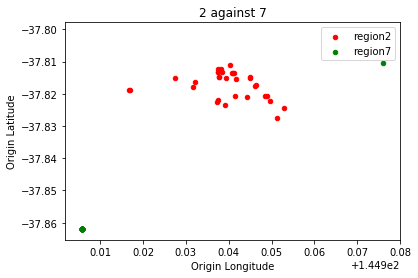

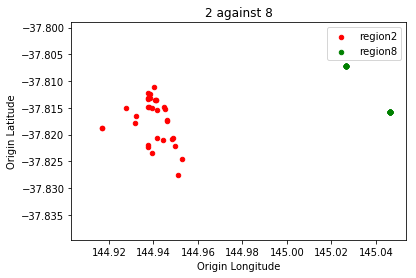

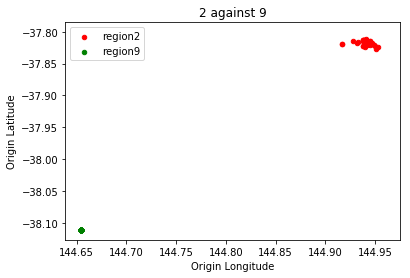

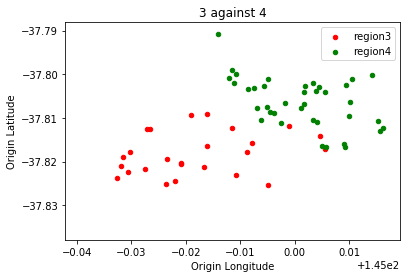

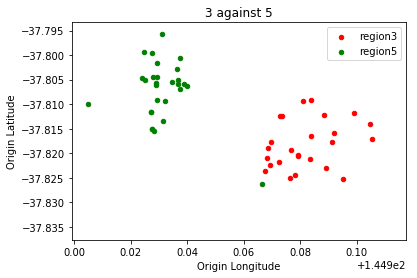

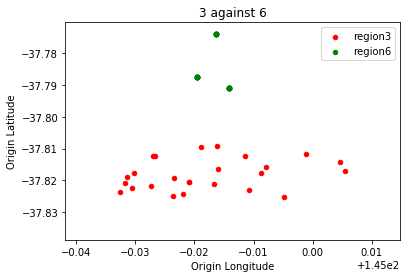

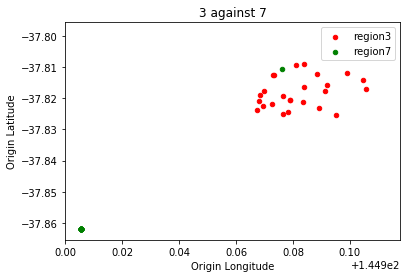

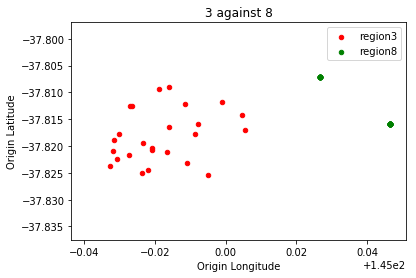

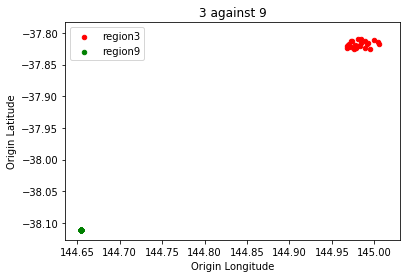

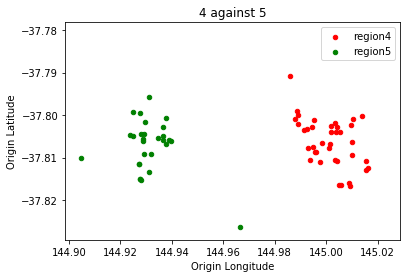

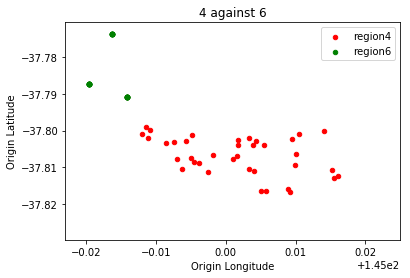

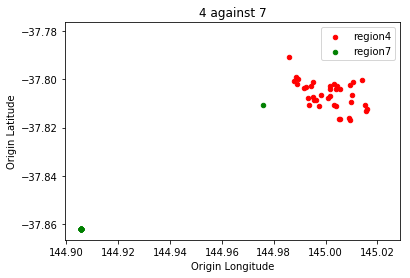

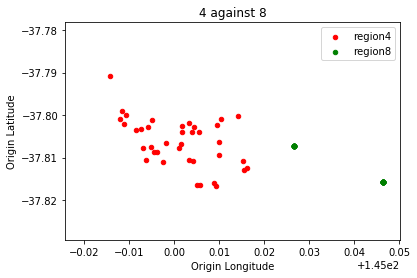

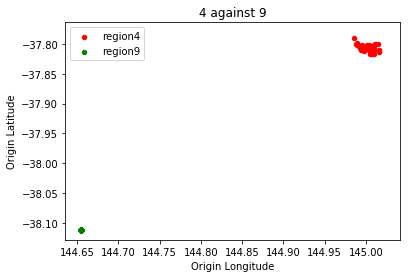

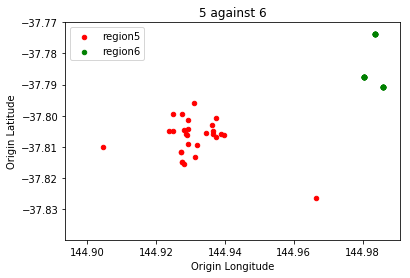

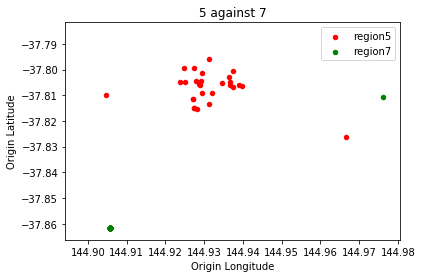

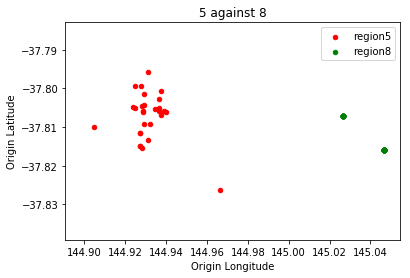

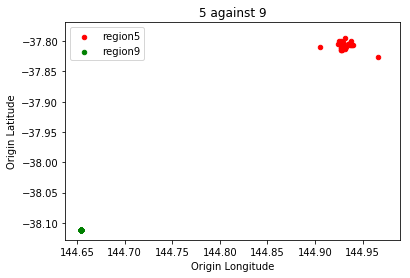

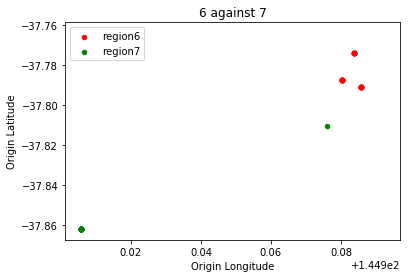

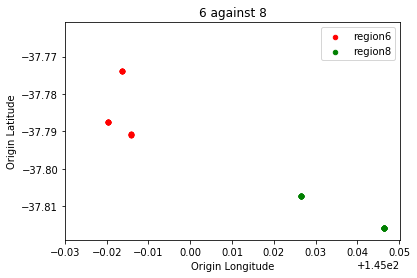

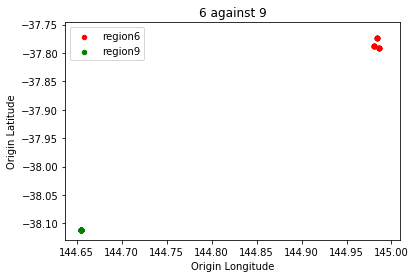

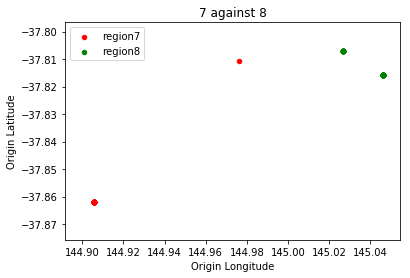

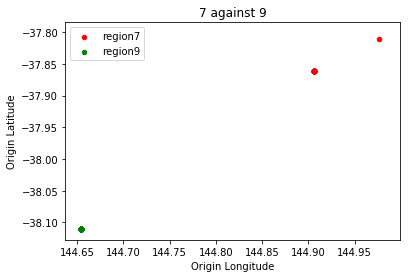

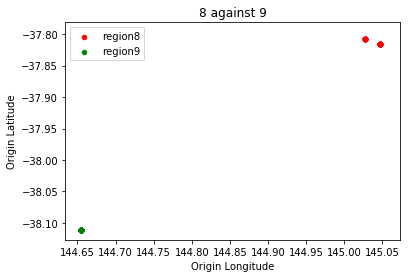

In [65]:
# loop over every pair and plot them
for i in range(9):
    for j in range(i+1,9):
        ax = df4[df4['Origin Region'] == (i+1)].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(i+1), color = 'red', title = str(i+1)+' against '+str(j+1))
        df4[df4['Origin Region'] == j+1].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(j+1), color = 'green',ax = ax)

Without knowing the boundary for each region, it is hard to correct the mislabelled data point. One good way to visualize the true boudary for each region is to load the data from the missing_value and outliers file since they are error free.

In [66]:
# load the two csv file into dataframe
df_mis = pd.read_csv('29481929_missing_value.csv')
df_out = pd.read_csv('29481929_outliers.csv')

In [67]:
df_mis

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0   ID5554381742        2.0              1                   3   
1   ID1779062347        NaN              7                   4   
2   ID1613623572        NaN              4                   3   
3   ID3370932428        NaN              7                   9   
4   ID3969526177        1.0              8                   5   
5   ID3693428814        NaN              5                   3   
6   ID5212641619        NaN              9                   5   
7   ID1767409779        NaN              8                   3   
8   ID1221032080        0.0              7                   5   
9   ID1450755214        0.0              9                   5   
10  ID1522296543        0.0              7                   6   
11  ID3917568105        NaN              8                   1   
12  ID5922742063        NaN              1                   2   
13  ID1157691004        0.0              7                   1   
14  ID1786393253        NaN              8                   9   
15  ID1270650569        NaN              1                   8   
16  ID3226304678        1.0              8                   7   
17  ID1875664905        0.0              4                   7   
18  ID3111399202        NaN              7                   4   
19  ID1290825326        NaN              2                   8   
20  ID1216923298        NaN              8                   3   
21  ID3515372985        1.0              4                   1   
22  ID1244949174        0.0              5                   3   
23  ID1431558222        0.0              6                   8   
24  ID1687861691        NaN              2                   4   
25  ID5321272392        2.0              3                   1   
26  ID5986242676        NaN              2                   6   
27  ID1401288889        NaN              4                   5   
28  ID1917051946        0.0              7                   8   
29  ID3432439544        1.0              8                   4   
..           ...        ...            ...                 ...   
54  ID1956168005        0.0              4                   3   
55  ID5233456411        2.0              4                   3   
56  ID1457703077        0.0              3                   5   
57  ID3282332497        1.0              8                   1   
58  ID5938553119        2.0              8                   5   
59  ID1942576256        0.0              3                   2   
60  ID1776257686        0.0              4                   7   
61  ID1729298503        0.0              7                   3   
62  ID1359517067        0.0              5                   1   
63  ID3343492914        1.0              9                   8   
64  ID3489094980        1.0              7                   4   
65  ID3934210420        1.0              3                   6   
66  ID1487103761        0.0              2                   5   
67  ID1633384068        0.0              8                   3   
68  ID5272174163        2.0              7                   3   
69  ID3886055713        1.0              8                   7   
70  ID1247045255        0.0              3                   1   
71  ID1446908244        0.0              5                   7   
72  ID1788004626        0.0              9                   2   
73  ID3290622474        1.0              7                   1   
74  ID1141989580        0.0              2                   6   
75  ID1925200614        0.0              5                   8   
76  ID3706956277        1.0              7                   5   
77  ID3173234961        1.0              9                   7   
78  ID3692428378        1.0              6                   7   
79  ID3392337922        1.0              4                   3   
80  ID3984069546        1.0              9                   8   
81  ID1966851818        0.0              4                   1   
82  ID3238505829        1.0              8    

In [68]:
df_out

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0            0  ID3886950302          1              7                   3   
1            1  ID1970549353          0              4                   2   
2            2  ID1883088298          0              2                   1   
3            3  ID5756342803          2              6                   1   
4            4  ID1351783679          0              7                   3   
5            5  ID5595495687          2              8                   4   
6            6  ID5895449545          2              4                   1   
7            7  ID3662194749          1              6                   9   
8            8  ID5422218585          2              5                   1   
9            9  ID3226375389          1              8                   1   
10          10  ID1131851025          0              8                   9   
11          11  ID3469431003          1              4                   8   
12          12  ID1845844388          0              9                   6   
13          13  ID1872372154          0              4                   1   
14          14  ID1176718835          0              2                   9   
15          15  ID3541489894          1              5                   3   
16          16  ID1898318217          0              6                   2   
17          17  ID1346703575          0              5                   4   
18          18  ID3522272491          1              5                   9   
19          19  ID1492529069          0              1                   2   
20          20  ID1519931678          0              6                   2   
21          21  ID1419469344          0              3                   1   
22          22  ID1871764891          0              2                   4   
23          23  ID3998352197          1              3                   9   
24          24  ID3208324533          1              8                   6   
25          25  ID3304127677          1              9                   3   
26          26  ID5558320475          2              8                   5   
27          27  ID5463203777          2              5                   6   
28          28  ID1892613388          0              7                   9   
29          29  ID1306302946          0              6                   3   
..         ...           ...        ...            ...                 ...   
58          58  ID1631907969          0              2                   9   
59          59  ID1647530689          0              2                   6   
60          60  ID3786075777          1              1                   6   
61          61  ID3480806608          1              5                   3   
62          62  ID3513093269          1              8                   1   
63          63  ID1792786349          0              5                   1   
64          64  ID3849136196          1              1                   2   
65          65  ID1492433093          0              4                   7   
66          66  ID1750616022          0              2                   4   
67          67  ID3609038509          1              8                   5   
68          68  ID5565105249          2              4                   2   
69          69  ID1156966899          0              7                   9   
70          70  ID5581744926          2              6                   8   
71          71  ID3905856853          1              8                   6   
72          72  ID1752525409          0              9                   5   
73          73  ID5580848274          2              8                   4   
74          74  ID5690432553          2              4                   1   
75          75  ID5829477920          2              3                   9   
76          76  ID5482843789          2              8                   7   
77          77  ID37084498

We have 172 rows of data in the 2 files, and each row has 1 origin region and 1 destination region, this will give us 344 correct data points to build our plot. <br>


##### 6.1.2.1 Extract relevant information
We will extract the origion and destination region, their latitude and longitude.

In [69]:
# initialize empty list to store result
o_reg = []
d_reg = []
o_lat = []
o_long = []
d_lat = []
d_long = []

# interate over missing value file
for index, row in df_mis.iterrows():
    o_reg.append(row['Origin Region'])
    d_reg.append(row['Destination Region'])
    o_lat.append(row['Origin Latitude'])
    o_long.append(row['Origin Longitude'])
    d_lat.append(row['Destination Latitude'])
    d_long.append(row['Destination Longitude'])

# interate over outlier file
for index, row in df_out.iterrows():
    o_reg.append(row['Origin Region'])
    d_reg.append(row['Destination Region'])
    o_lat.append(row['Origin Latitude'])
    o_long.append(row['Origin Longitude'])
    d_lat.append(row['Destination Latitude'])
    d_long.append(row['Destination Longitude'])

We can now concatenate origin region with destination region, origin latitude with destination latitude, origin longitude and destination longitude.

In [70]:
reg = o_reg + d_reg
lat = o_lat + d_lat
long = o_long + d_long

Create dataframe

In [71]:
# create dataframe
d = {'Latitude': lat, 'Longitude': long,'Region': reg, }
df_region = pd.DataFrame(d)
# change the target column to categorical data type
df_region['Region'] = pd.Categorical(df_region['Region'])

df_region.head()

Latitude   Longitude Region
0 -37.818518  144.967095      1
1 -37.861835  144.905716      7
2 -37.816983  145.010877      4
3 -37.861835  144.905716      7
4 -37.815834  145.046450      8

#### 6.1.2.2 Build scatter plot for the correct data and the dirty data.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


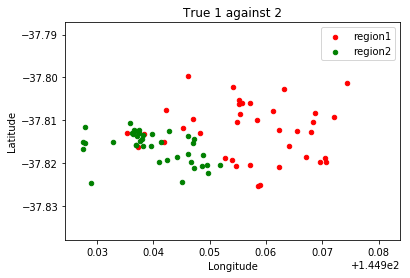

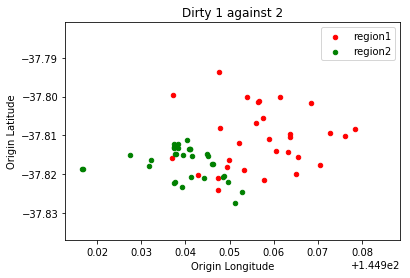

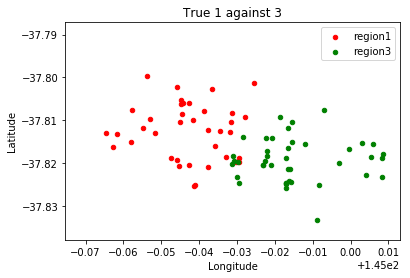

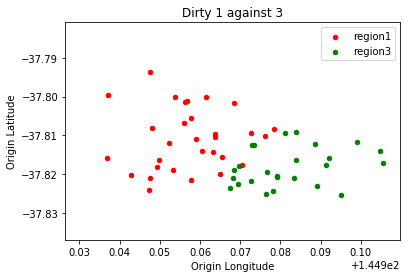

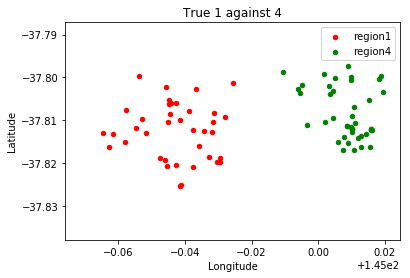

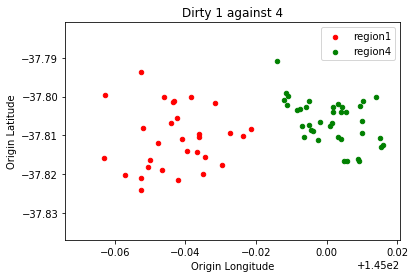

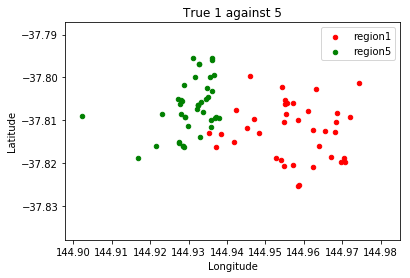

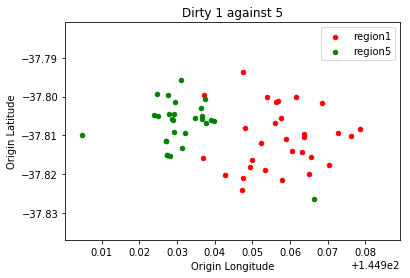

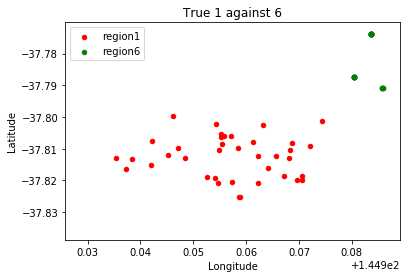

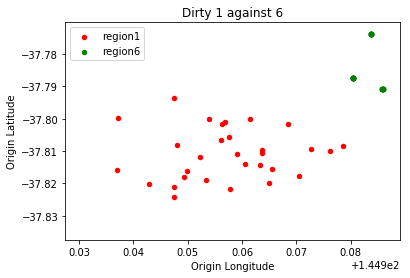

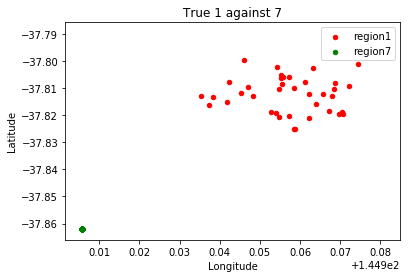

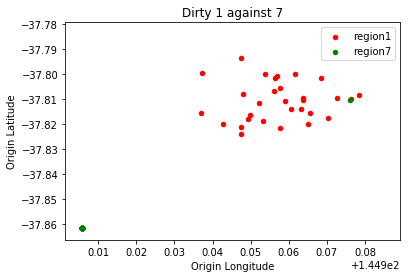

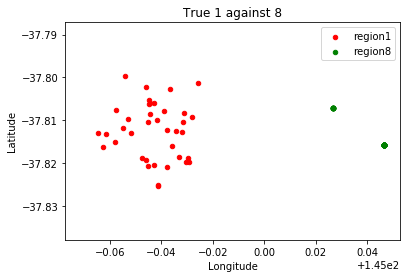

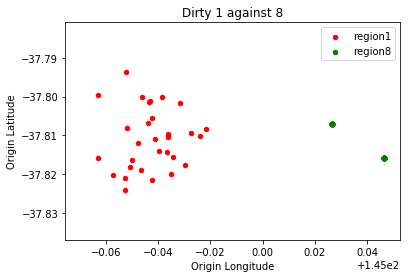

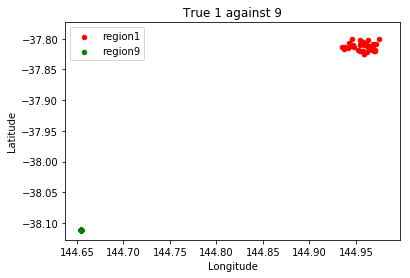

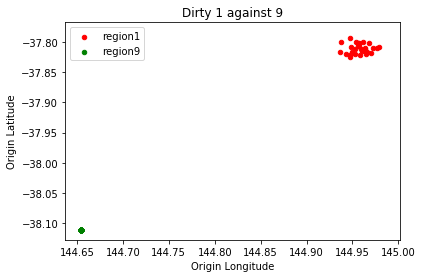

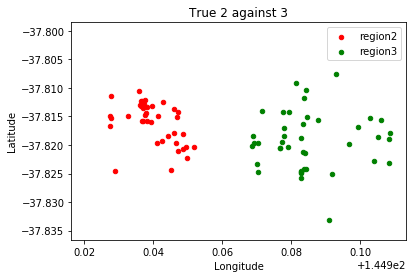

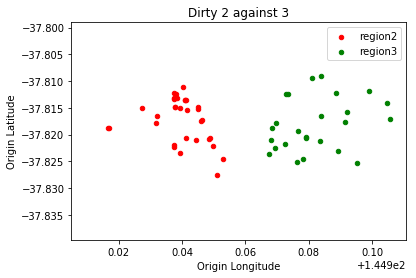

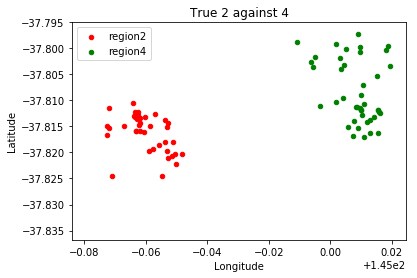

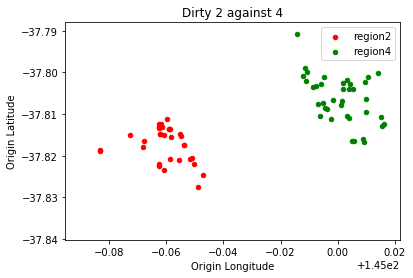

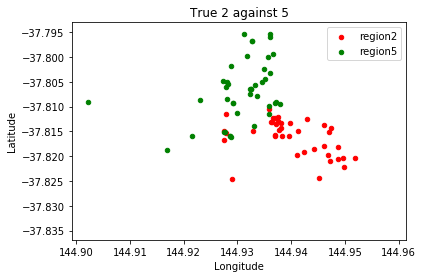

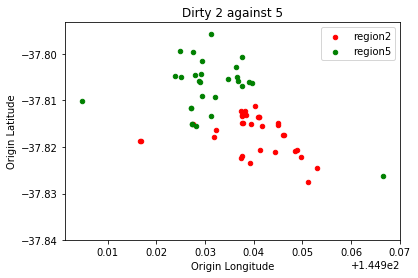

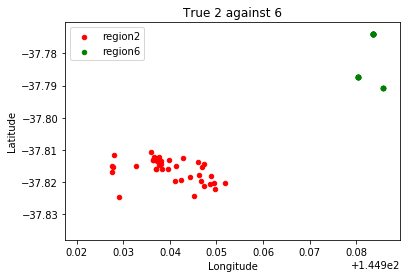

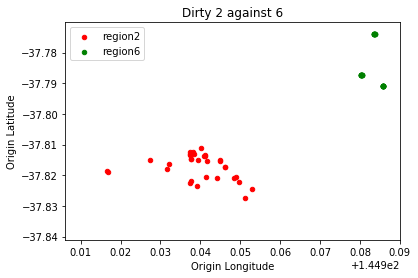

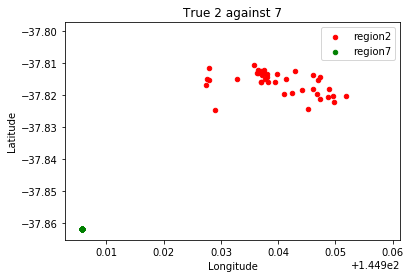

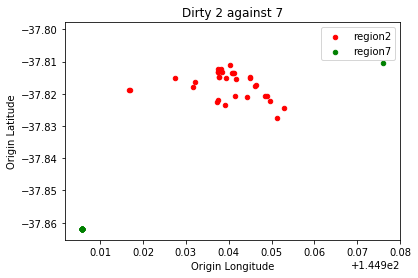

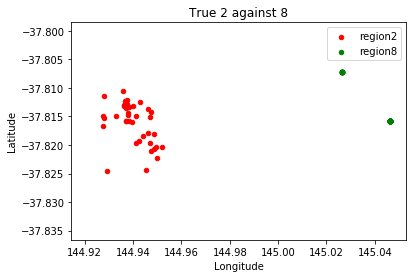

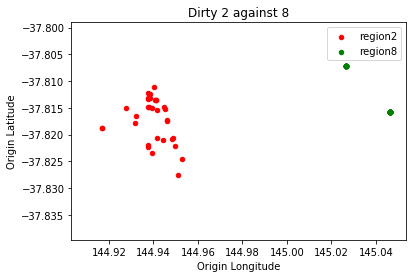

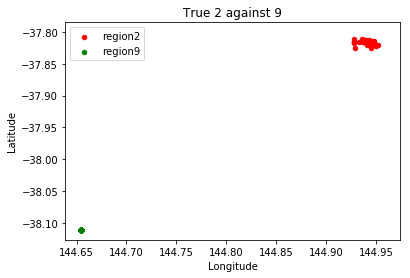

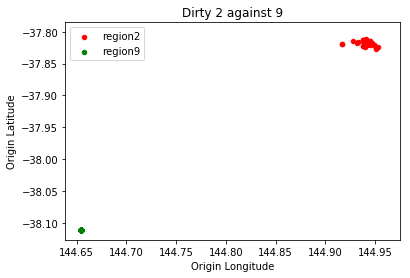

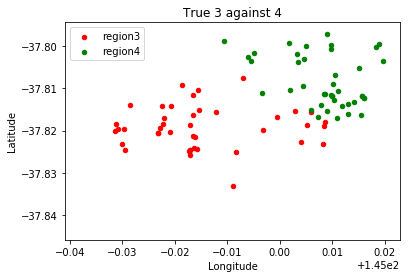

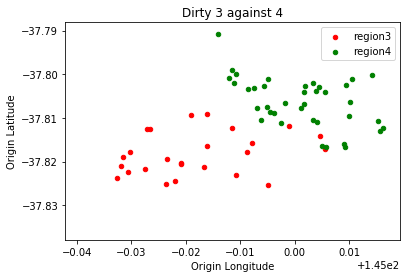

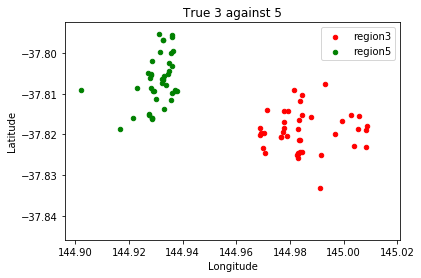

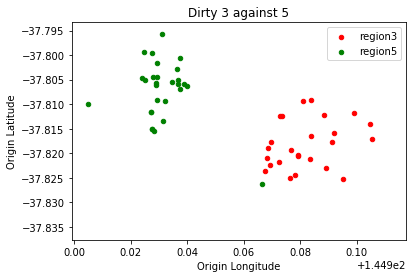

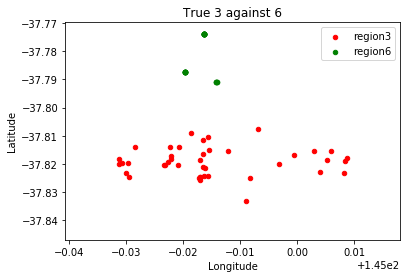

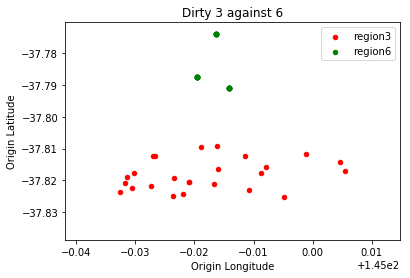

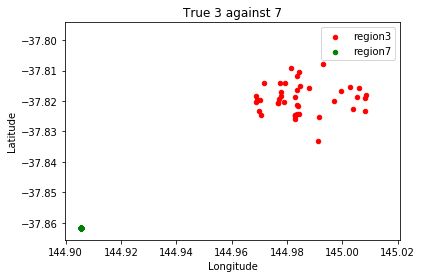

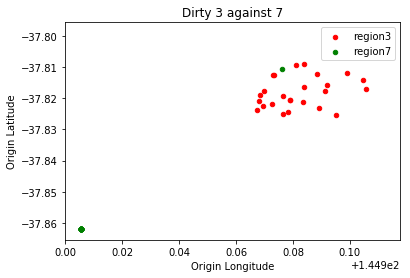

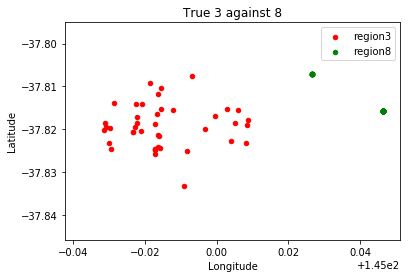

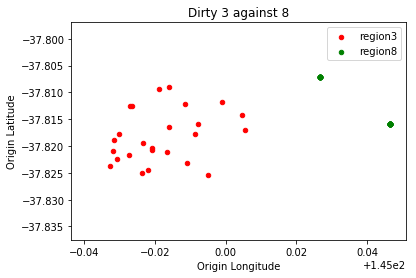

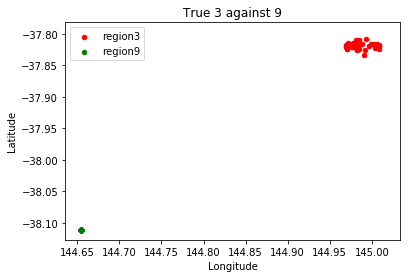

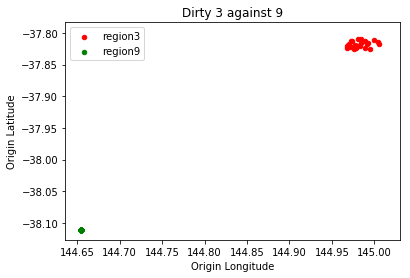

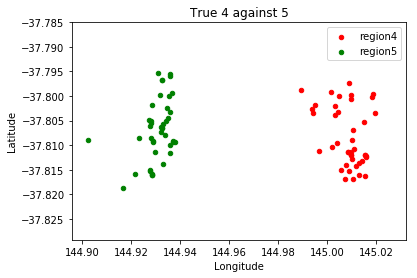

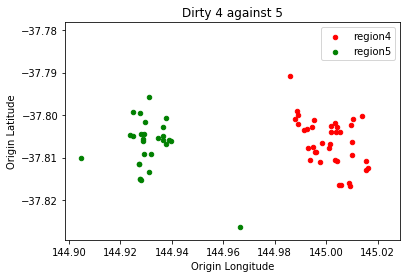

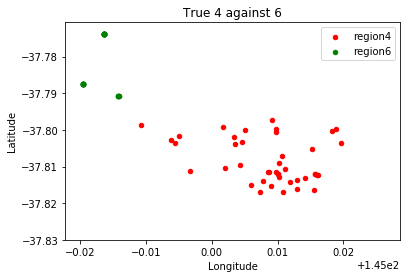

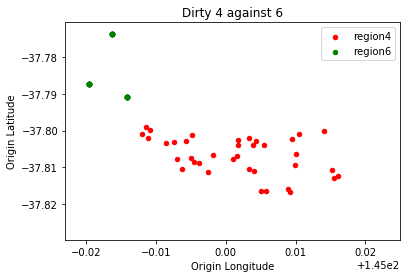

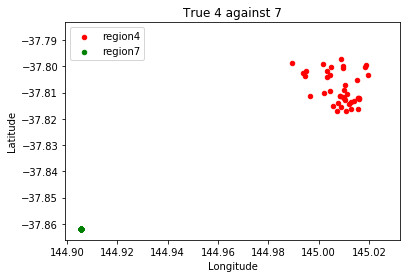

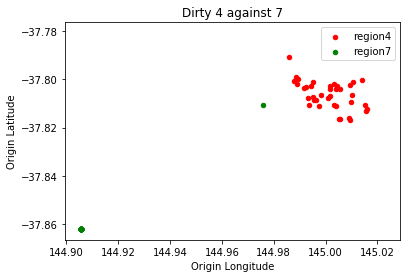

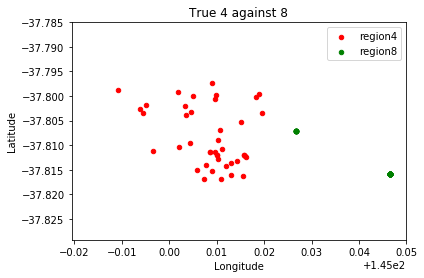

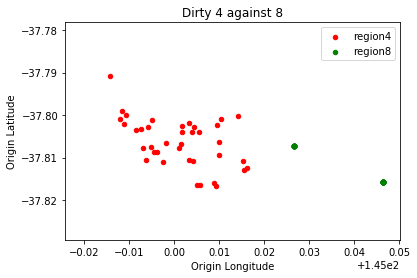

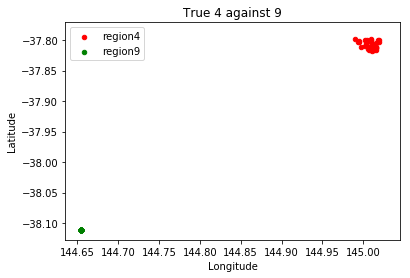

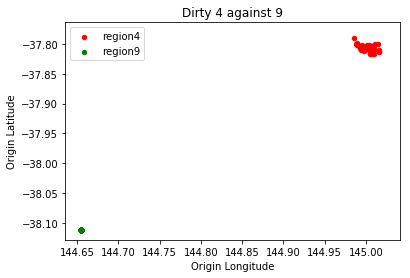

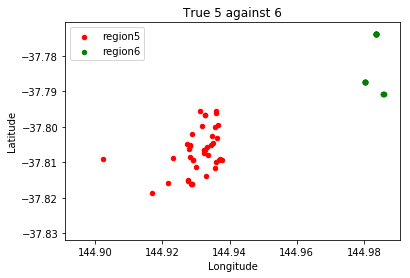

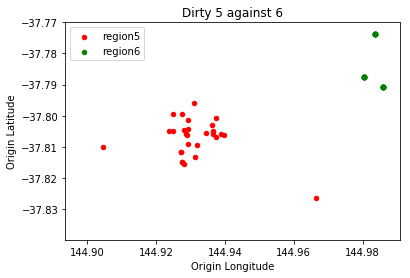

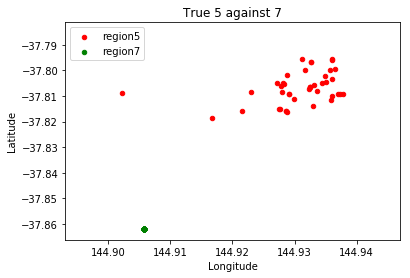

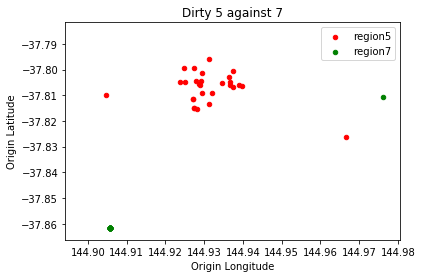

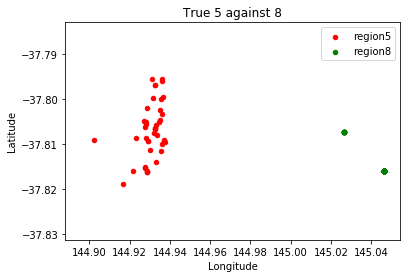

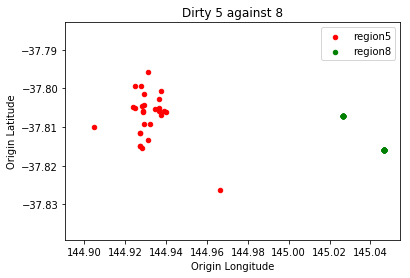

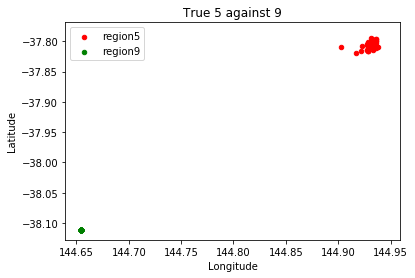

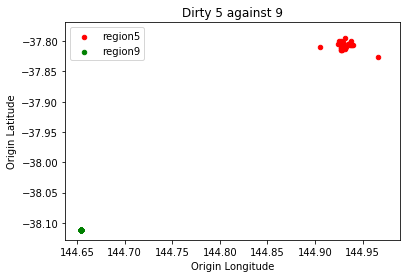

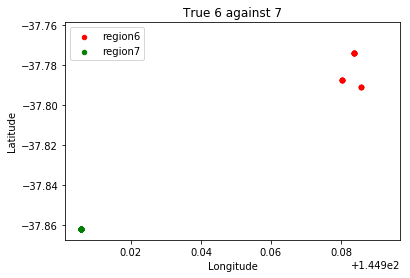

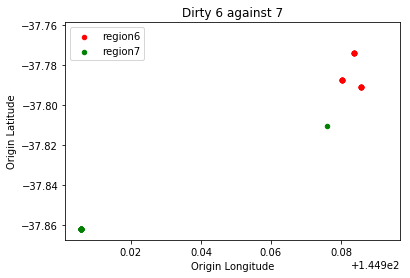

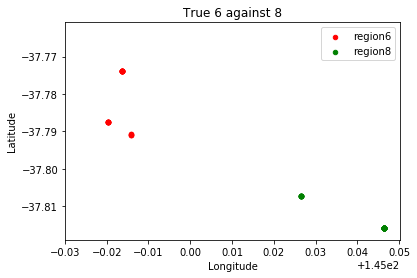

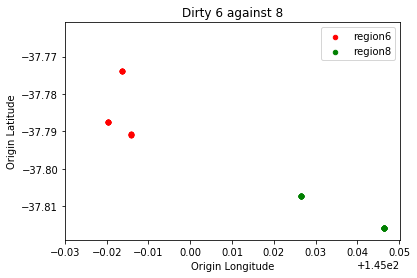

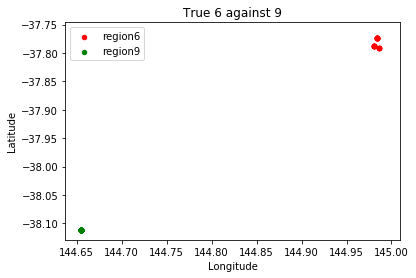

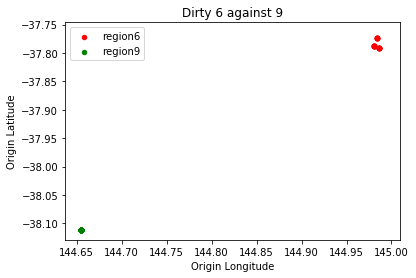

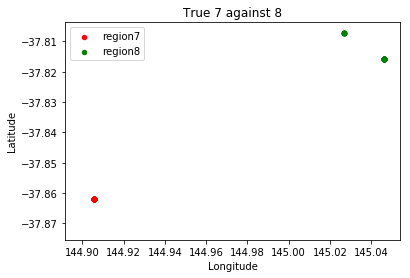

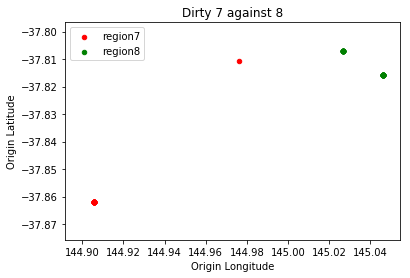

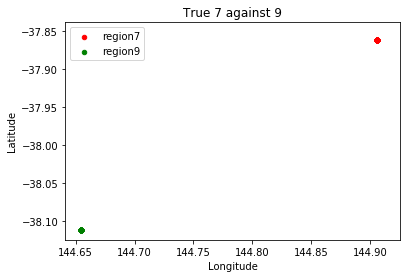

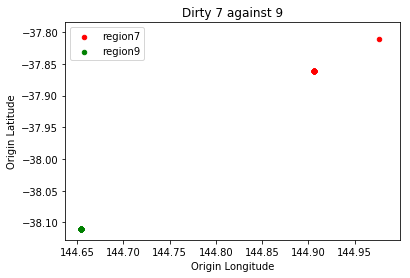

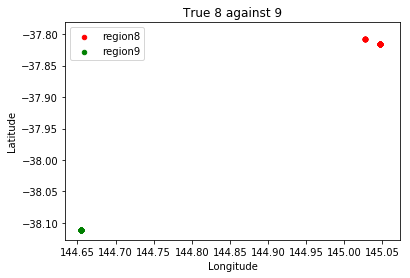

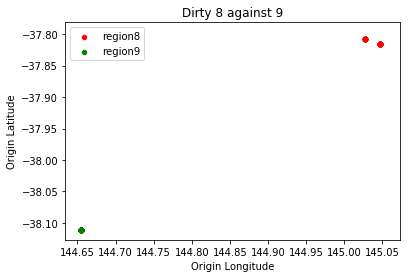

In [72]:
# loop over every pair and plot them
for i in range(9):
    for j in range(i+1,9):
        # Correct data
        ax = df_region[df_region['Region'] == (i+1)].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(i+1), color = 'red', title = 'True ' + str(i+1)+' against '+str(j+1))
        df_region[df_region['Region'] == j+1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(j+1), color = 'green',ax = ax)
        # Dirty data
        bx = df4[df4['Origin Region'] == (i+1)].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(i+1), color = 'red', title = 'Dirty '+ str(i+1)+' against '+str(j+1))
        df4[df4['Origin Region'] == (j+1)].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(j+1), color = 'green', ax = bx)

- These region seems to overlap, but this is also the case in the correct data, so they are treat as normal.
- (1,2),(1,3),(2,5),(3,4)
- These pair of regions do not overlap, so they are normal
- (1,4),(1,6),(1,8),(1,9),(2,3),(2,4),(2,6),(2,7),(2,8),(2,9),(3,6),(3,8),(3,9),(4,5),(4,6),(4,7),(4,8),(4,9),(5,6),(5,7),(5,8),(5,9),(6,7),(6,8),(6,9),(7,8),(7,9),(8,9)
- These region pair has mislabelled data.
- (1,5)/(3,5),(1,7)/(3,7),

It seems like data are mixed up between region 1,3,5 and 1,3,7. We will now plot the 3 series together on the same plot.

#### Region 1,3,5

In [73]:
# helper function to compare plot between dirty data and correct data
def compare_plot(ori_des,r1,r2,r3=None):
    if ori_des == 'O' and r3!= None:
        bx = df4[df4['Origin Region'] == r1].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(r1), color = 'red', title = 'Dirty '+ str(r1) + 'vs' + str(r2)+'vs'+str(r3))
        df4[df4['Origin Region'] == r2].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(r2), color = 'green', ax = bx)
        df4[df4['Origin Region'] == r3].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(r3), color = 'blue', ax = bx)

        ax = df_region[df_region['Region'] == r1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r1), color = 'red', title = 'Correct '+ str(r1) + 'vs' + str(r2)+'vs'+str(r3))
        df_region[df_region['Region'] == r2].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r2), color = 'green', ax = ax)
        df_region[df_region['Region'] == r3].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r3), color = 'blue', ax = ax)
        
    elif ori_des == 'O' and r3 == None:
        bx = df4[df4['Origin Region'] == r1].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(r1), color = 'red', title = 'Dirty '+ str(r1) + 'vs' + str(r2))
        df4[df4['Origin Region'] == r2].plot(kind='scatter', y = 'Origin Latitude', x='Origin Longitude', label = 'region' + str(r2), color = 'green', ax = bx) 
        
        ax = df_region[df_region['Region'] == r1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r1), color = 'red', title = 'Correct '+ str(r1) + 'vs' + str(r2))
        df_region[df_region['Region'] == r2].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r2), color = 'green', ax = ax)
        
    elif ori_des == 'D' and r3!= None:
        bx = df4[df4['Destination Region'] == r1].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(r1), color = 'red', title = 'Dirty '+ str(r1) + 'vs' + str(r2)+'vs'+str(r3))
        df4[df4['Destination Region'] == r2].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(r2), color = 'green', ax = bx)
        df4[df4['Destination Region'] == r3].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(r3), color = 'blue', ax = bx)

        ax = df_region[df_region['Region'] == r1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r1), color = 'red', title = 'Correct '+ str(r1) + 'vs' + str(r2)+'vs'+str(r3))
        df_region[df_region['Region'] == r2].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r2), color = 'green', ax = ax)
        df_region[df_region['Region'] == r3].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r3), color = 'blue', ax = ax)
        
    elif ori_des == 'D' and r3 == None:
        bx = df4[df4['Destination Region'] == r1].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(r1), color = 'red', title = 'Dirty '+ str(r1) + 'vs' + str(r2))
        df4[df4['Destination Region'] == r2].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(r2), color = 'green', ax = bx) 
        
        ax = df_region[df_region['Region'] == r1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r1), color = 'red', title = 'Correct '+ str(r1) + 'vs' + str(r2))
        df_region[df_region['Region'] == r2].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(r2), color = 'green', ax = ax)

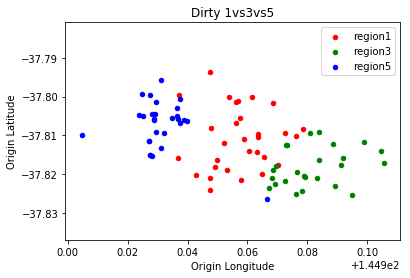

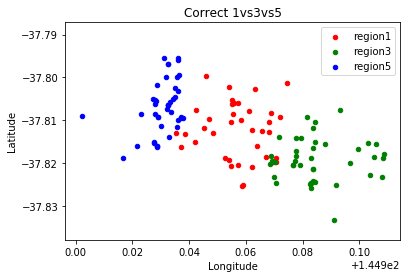

In [74]:
compare_plot('O',1,3,5)

From the plot, it can be seen that there is 1 point that should belong to region 5 but mislabelled as region 1. Also, 1 point that should belong to region 3 but mislabelled as region 5.

In [75]:
# find the record
df4[(df4['Origin Longitude'] < 144.94) & (df4['Origin Latitude'] > -37.81)&(df4['Origin Region'] == 1)]

ID  Uber Type  Origin Region  Destination Region  \
116  ID1624203628          0              1                   8   

     Origin Latitude  Origin Longitude  Destination Latitude  \
116       -37.799655        144.937124            -37.815834   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
116              145.04645     2018-01-20       02:31:20         3276.12   

    Arrival Time  Fare$ weekend section  Journey Distance(m)  
116      3:25:56  16.15     day   night              11468.0

In [76]:
# correct the record
df4.loc[116, 'Origin Region'] = 5

In [77]:
# find the record
df4[(df4['Origin Longitude'] > 144.96) & (df4['Origin Latitude'] < -37.82)&(df4['Origin Region'] == 5)]

ID  Uber Type  Origin Region  Destination Region  \
22  ID1484829810          0              5                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
22        -37.82633        144.966503            -37.815779   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
22             144.973821     2018-05-25       14:34:16          467.04   

   Arrival Time  Fare$ weekend    section  Journey Distance(m)  
22     14:42:03   8.26     day  afternoon               1651.0

In [78]:
# correct the record
df4.loc[22, 'Origin Region'] = 3

Plot the three series again for sanity check.

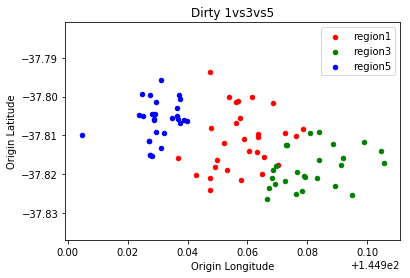

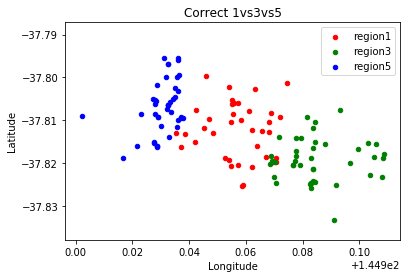

In [79]:
compare_plot('O',1,3,5)

#### Region 1,3,7

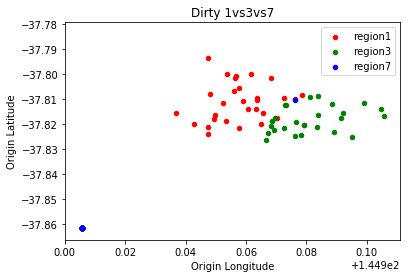

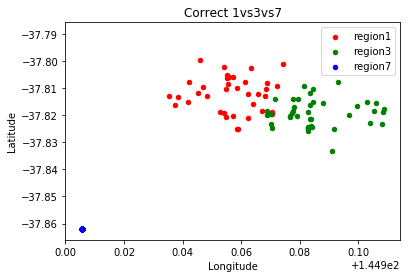

In [80]:
compare_plot('O',1,3,7)

In [81]:
# find the record
df4[(df4['Origin Longitude'] > 144.96)&(df4['Origin Region'] == 7)]

ID  Uber Type  Origin Region  Destination Region  \
38  ID3343595389          1              7                   9   

    Origin Latitude  Origin Longitude  Destination Latitude  \
38       -37.810523        144.976054            -38.110916   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
38             144.654173     2018-06-06       10:40:53        10806.48   

   Arrival Time  Fare$ weekend  section  Journey Distance(m)  
38     13:40:59   50.7     day  morning              44900.0

In [82]:
# correct the record
df4.loc[38, 'Origin Region'] = 1

Plot the series again for sanity check.

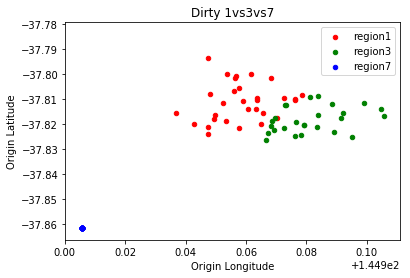

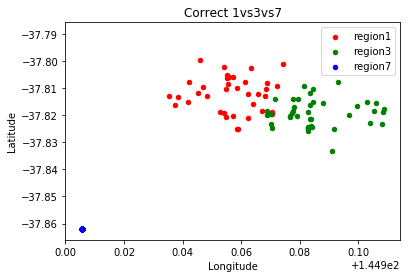

In [83]:
compare_plot('O',1,3,7)

The same analysis will be perfrom for destination region.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


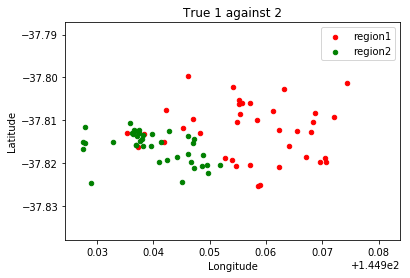

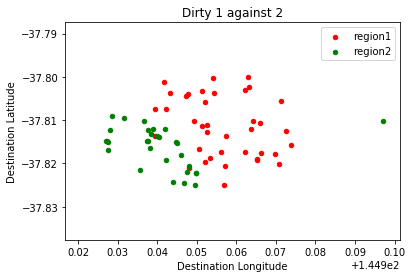

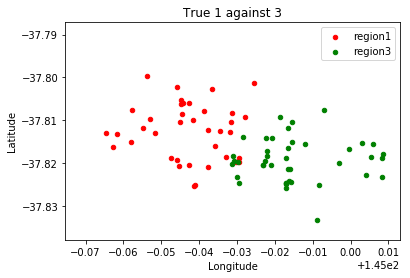

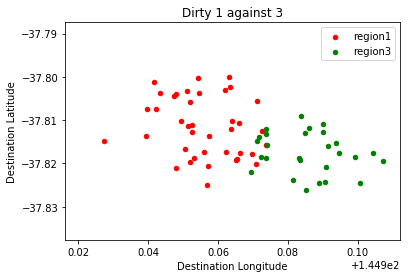

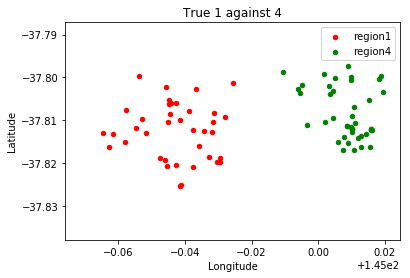

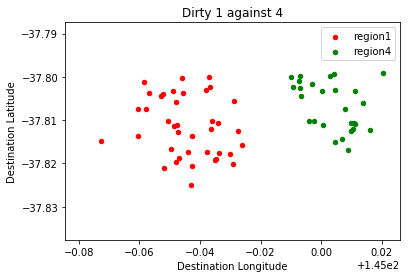

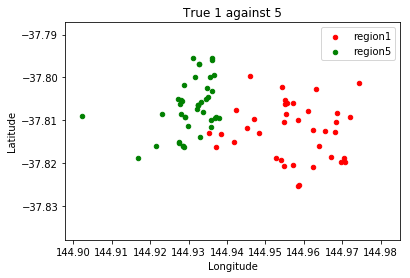

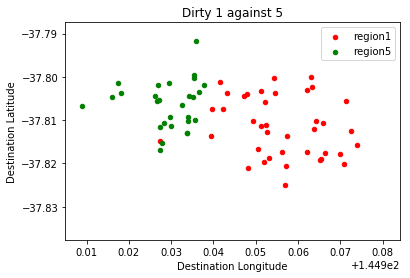

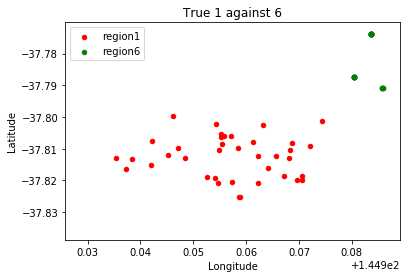

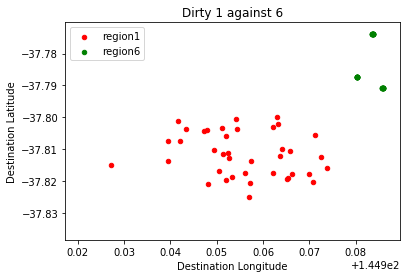

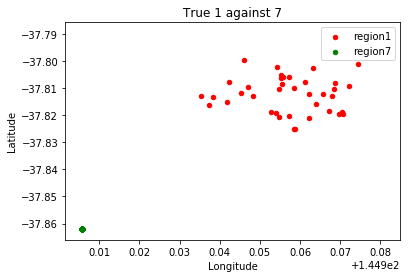

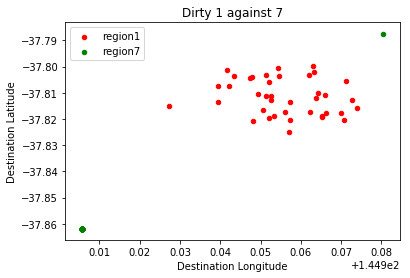

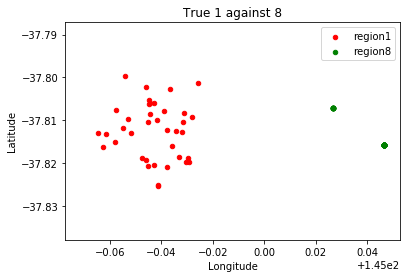

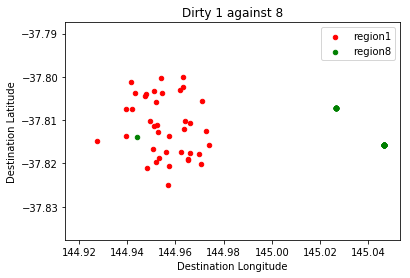

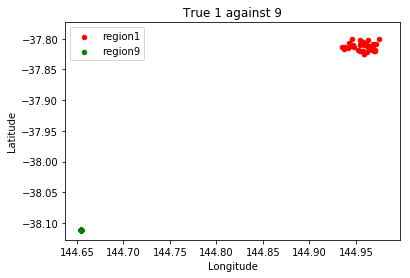

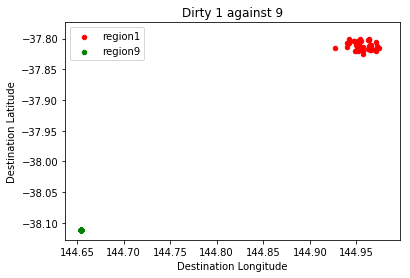

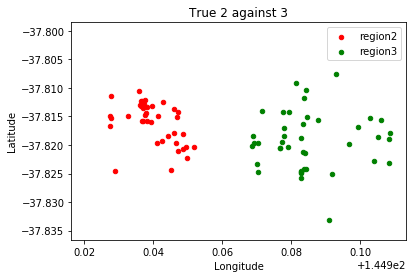

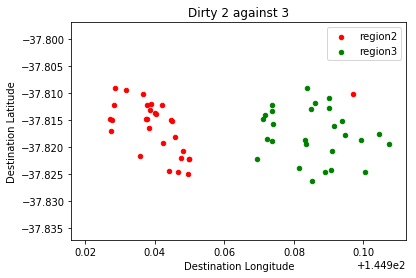

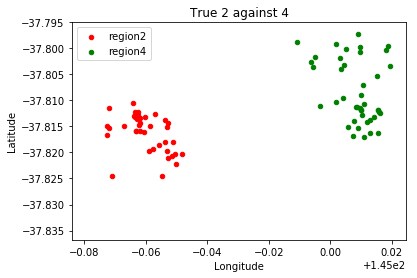

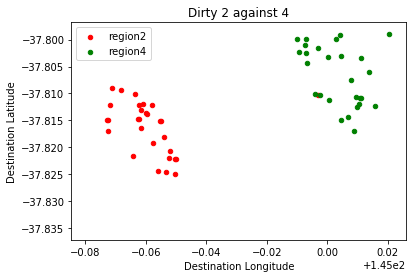

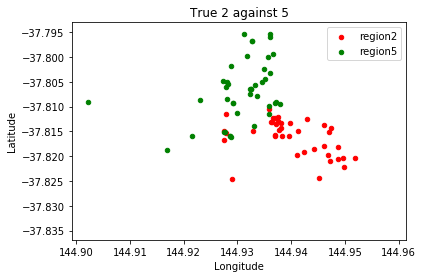

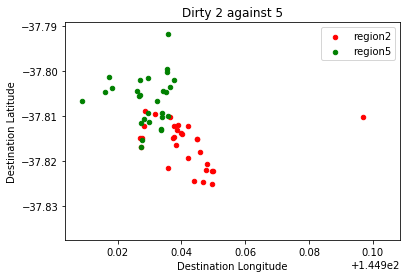

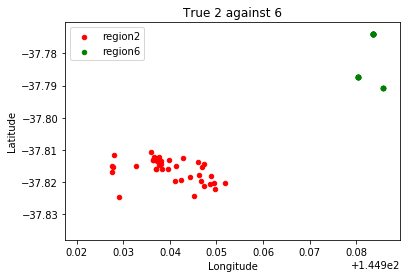

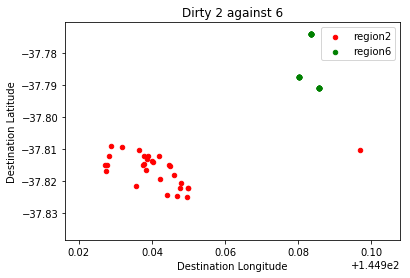

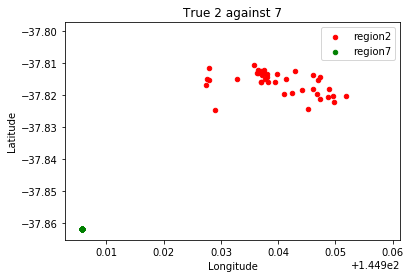

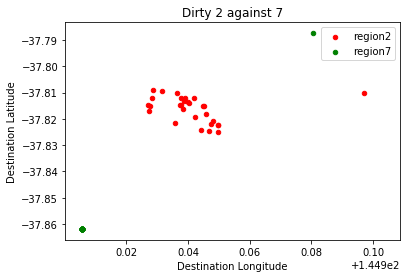

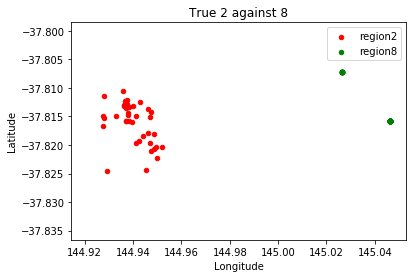

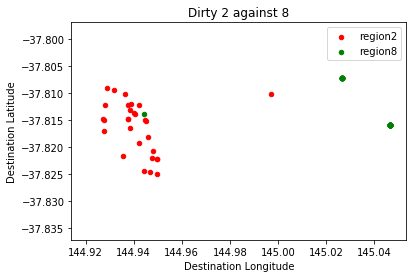

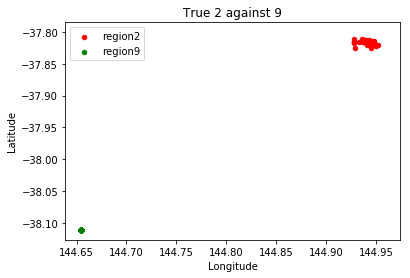

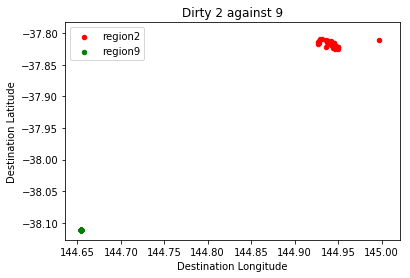

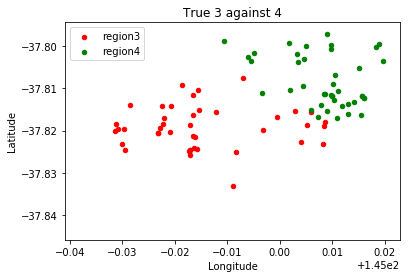

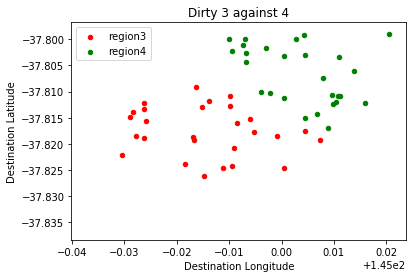

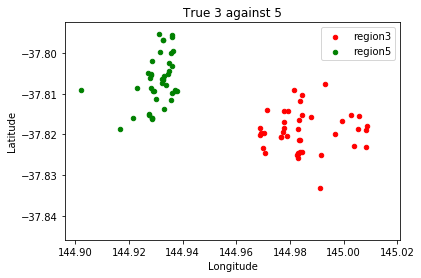

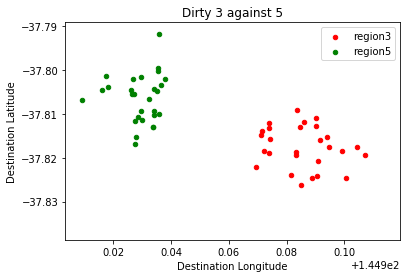

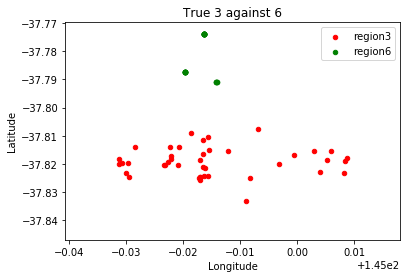

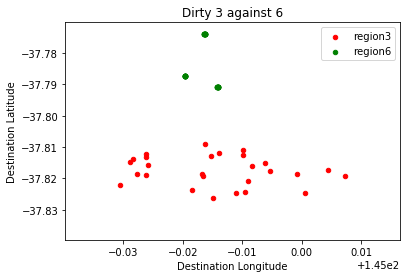

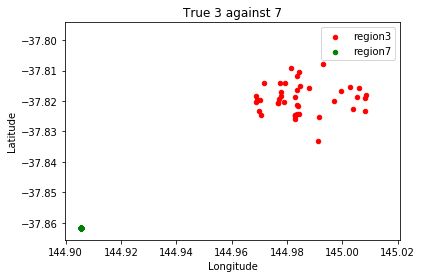

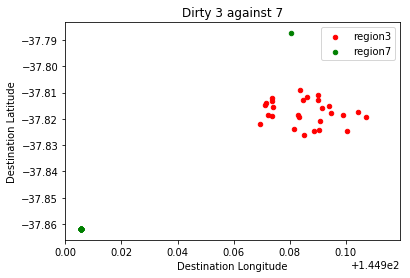

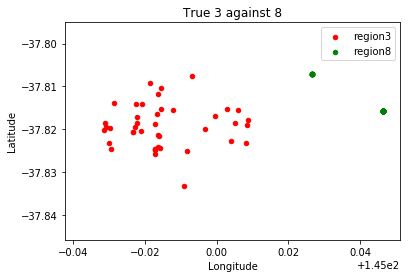

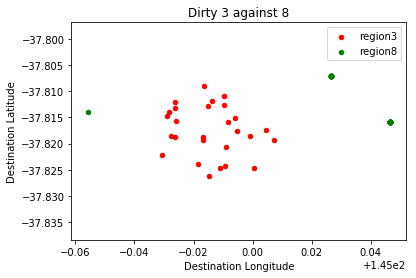

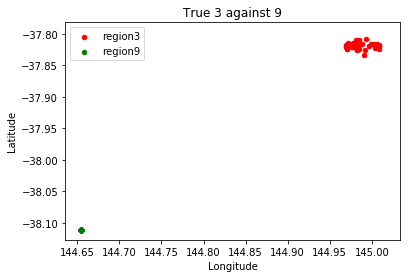

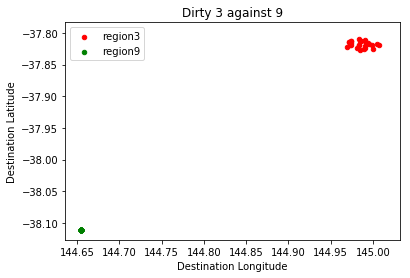

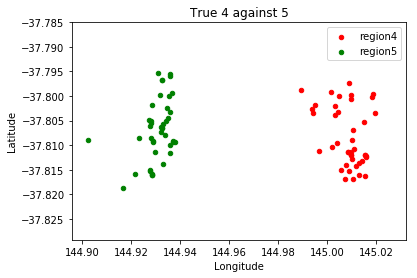

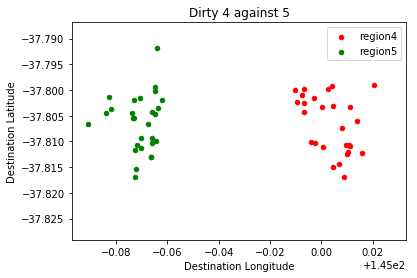

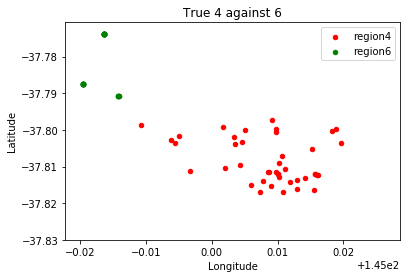

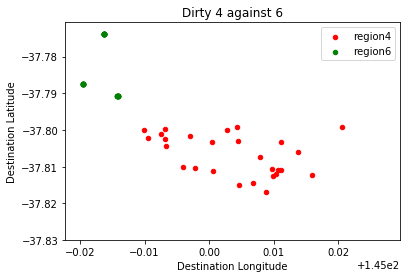

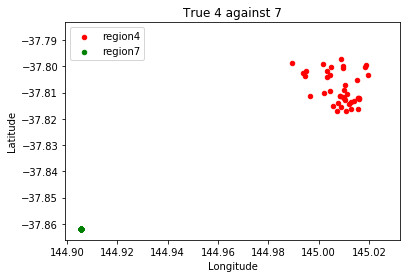

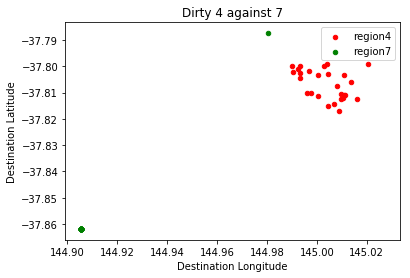

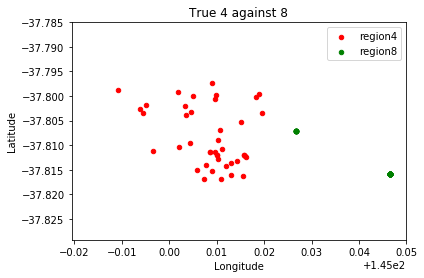

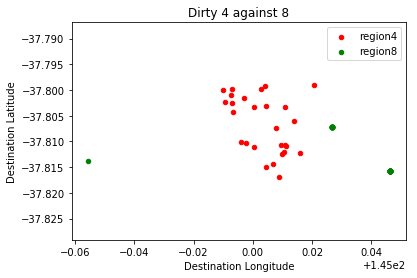

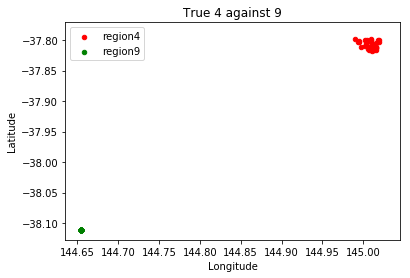

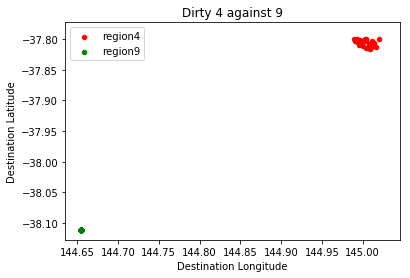

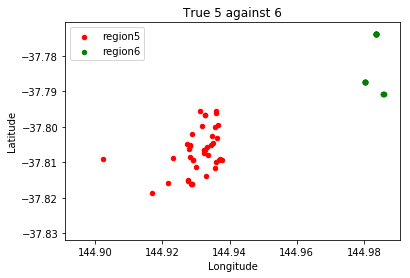

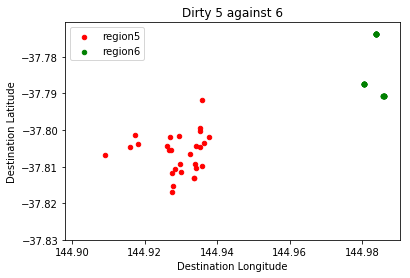

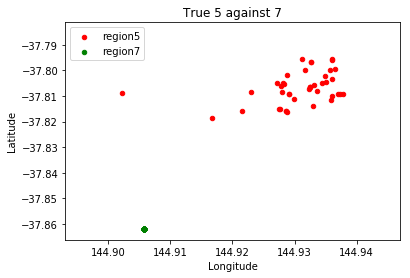

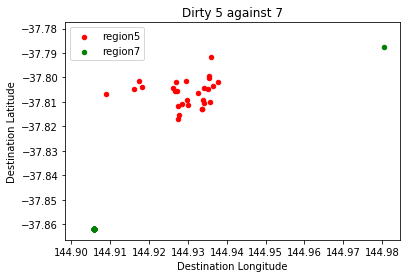

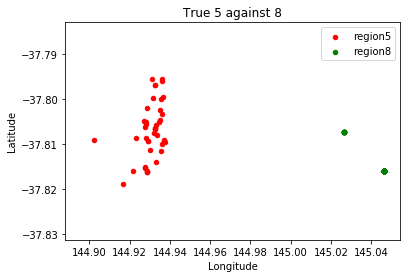

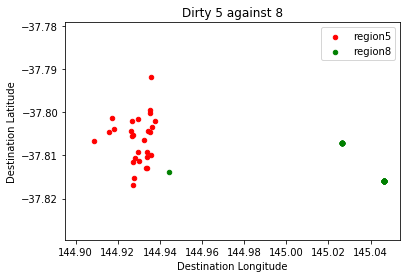

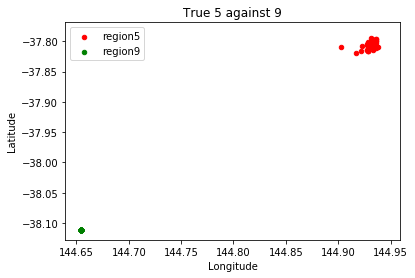

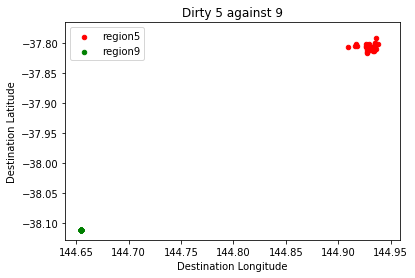

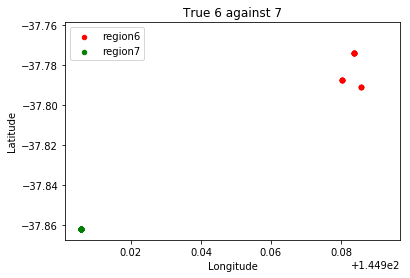

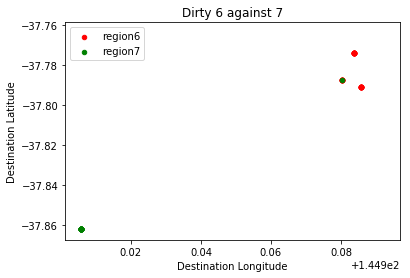

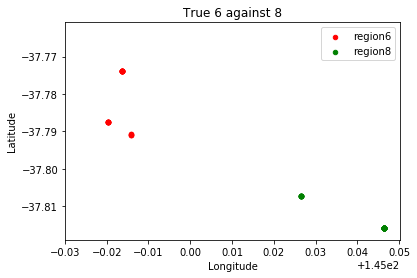

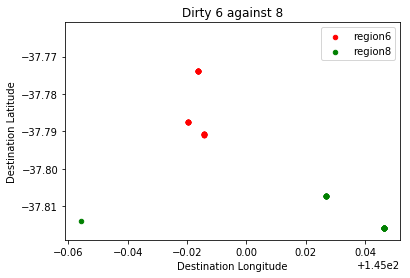

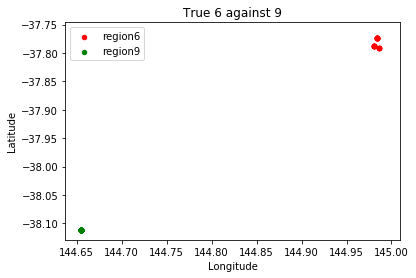

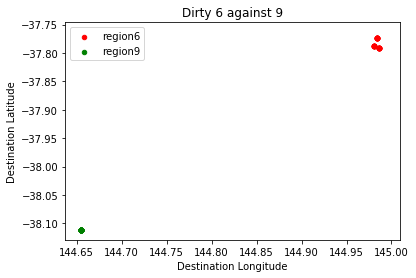

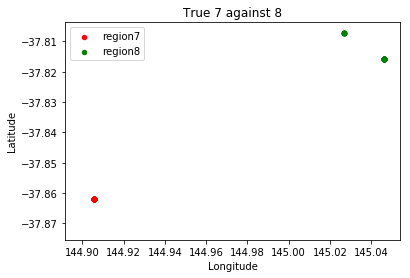

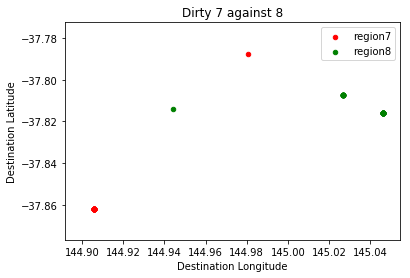

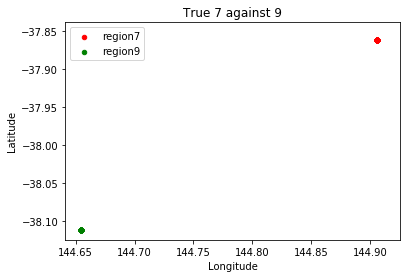

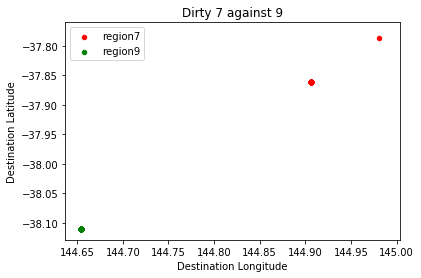

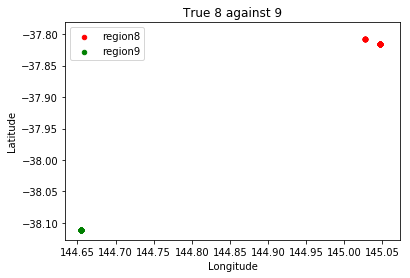

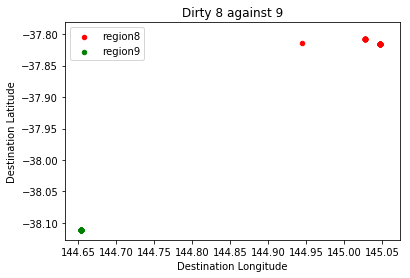

In [84]:
# loop over every pair and plot them
for i in range(9):
    for j in range(i+1,9):
        # Correct data
        ax = df_region[df_region['Region'] == (i+1)].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(i+1), color = 'red', title = 'True ' + str(i+1)+' against '+str(j+1))
        df_region[df_region['Region'] == j+1].plot(kind='scatter', y = 'Latitude', x='Longitude', label = 'region' + str(j+1), color = 'green',ax = ax)
        # Dirty data
        bx = df4[df4['Destination Region'] == (i+1)].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(i+1), color = 'red', title = 'Dirty '+ str(i+1)+' against '+str(j+1))
        df4[df4['Destination Region'] == (j+1)].plot(kind='scatter', y = 'Destination Latitude', x='Destination Longitude', label = 'region' + str(j+1), color = 'green', ax = bx)

The following pairs seem to have problems.
- (1,5)
- (1,8),(2,8)
- (2,3),(2,4)
- (6,7)

#### Region 1 and 5

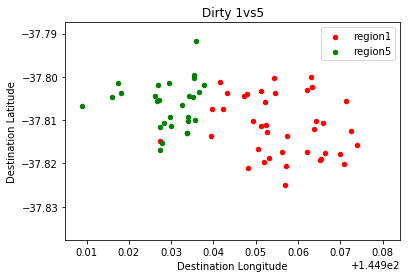

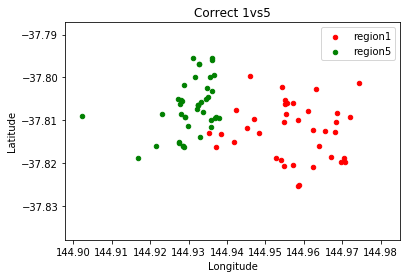

In [85]:
compare_plot('D',1,5)

In [86]:
# find the record
df4[(df4['Destination Longitude'] < 144.93) &(df4['Destination Region'] == 1)]

ID  Uber Type  Origin Region  Destination Region  \
48  ID1151986295          0              7                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
48       -37.861835        144.905716            -37.814916   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
48             144.927268     2018-07-05       03:51:13         3806.16   

   Arrival Time  Fare$ weekend section  Journey Distance(m)  
48      4:54:39  17.96     day   night              11839.0

In [87]:
# correct the record
df4.loc[48, 'Destination Region'] = 5

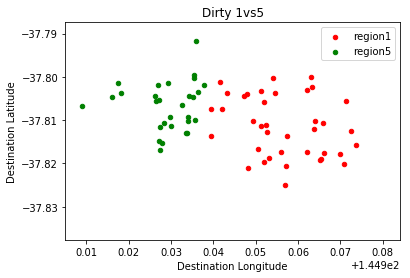

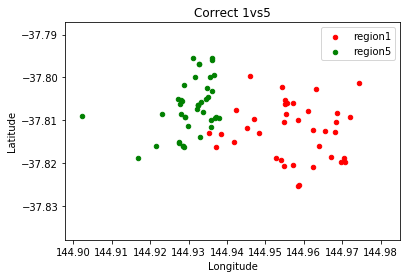

In [88]:
compare_plot('D',1,5)

#### Region 1,2,8

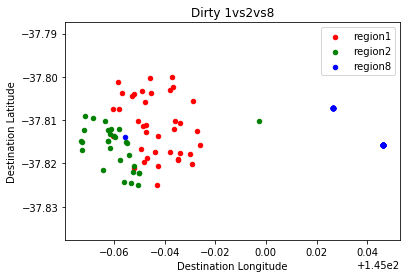

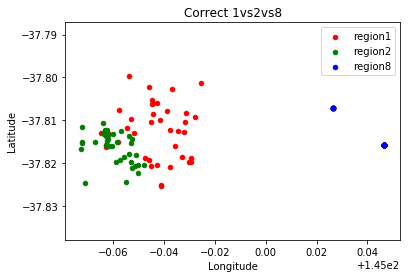

In [89]:
compare_plot('D',1,2,8)

In [90]:
# find the record
df4[(df4['Destination Longitude'] < 145.00) &(df4['Destination Region'] == 8)]

ID  Uber Type  Origin Region  Destination Region  \
43  ID3216125880          1              9                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
43       -38.110916        144.654173              -37.8139   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
43             144.944226     2018-02-14       10:51:32        10049.22   

   Arrival Time  Fare$ weekend  section  Journey Distance(m)  
43     13:39:01   47.9     day  morning              41926.0

In [91]:
# correct the record
df4.loc[43, 'Destination Region'] = 2

In [92]:
# find the record
df4[(df4['Destination Longitude'] < 144.95) &(df4['Destination Latitude'] < -37.82)&(df4['Destination Region'] == 1)]

ID  Uber Type  Origin Region  Destination Region  \
264  ID1528896283          0              6                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
264       -37.787433        144.980377            -37.820953   

     Destination Longitude Departure Date Departure Time  Travel Time(s)  \
264             144.948091     2018-02-09       20:13:03         1422.66   

    Arrival Time  Fare$ weekend    section  Journey Distance(m)  
264     20:36:45   9.23     day  afternoon               5460.0

In [93]:
# correct the record
df4.loc[264, 'Destination Region'] = 2

Plot the graph again for sanity check

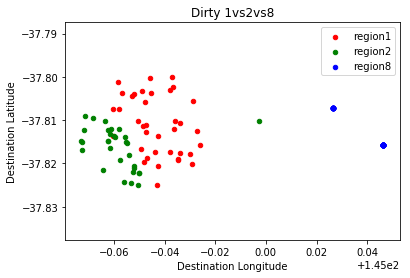

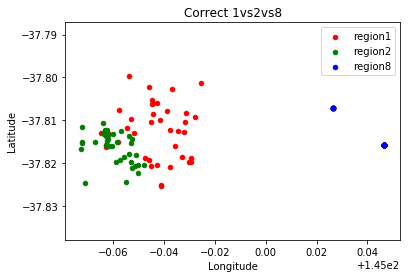

In [94]:
compare_plot('D',1,2,8)

#### Region 2,3,4

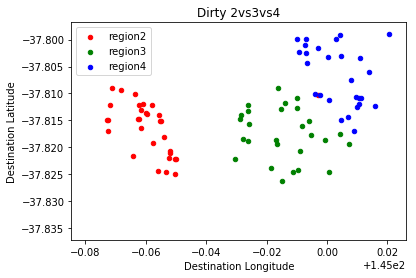

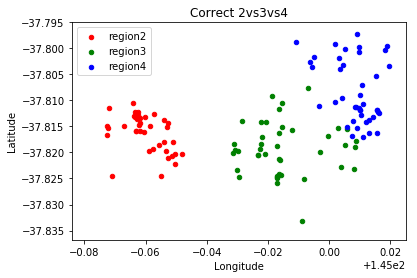

In [95]:
compare_plot('D',2,3,4)

In [96]:
# find the record
df4[(df4['Destination Longitude'] > 144.98) &(df4['Destination Region'] == 2)]

ID  Uber Type  Origin Region  Destination Region  \
55  ID3807606908          1              2                   2   

    Origin Latitude  Origin Longitude  Destination Latitude  \
55       -37.813624        144.941056            -37.810192   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
55             144.997097     2018-01-25       23:28:39         1349.94   

   Arrival Time  Fare$ weekend section  Journey Distance(m)  
55     23:51:08  22.75     day   night               5233.0

In [97]:
# correct the record
df4.loc[55, 'Destination Region'] = 4

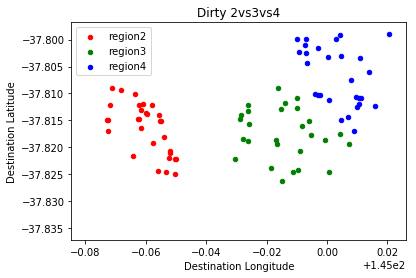

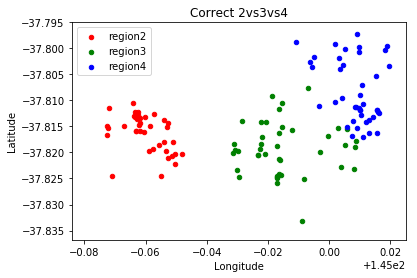

In [98]:
compare_plot('D',2,3,4)

#### Region 6,7

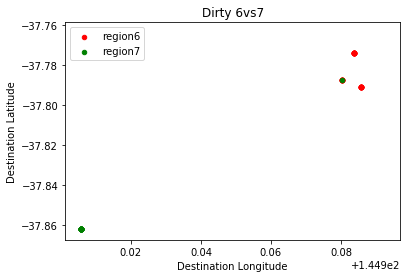

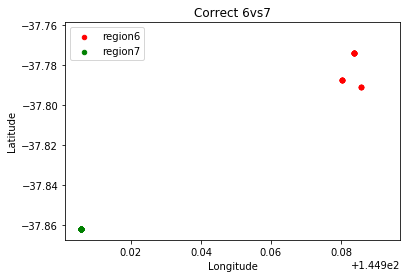

In [99]:
compare_plot('D',6,7)

In [100]:
# find the record
df4[(df4['Destination Longitude'] > 144.96) &(df4['Destination Region'] == 7)]

ID  Uber Type  Origin Region  Destination Region  \
53  ID1515717352          0              3                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
53       -37.814129        145.004671            -37.787433   

    Destination Longitude Departure Date Departure Time  Travel Time(s)  \
53             144.980377     2018-05-04       01:09:10         1290.48   

   Arrival Time  Fare$ weekend section  Journey Distance(m)  
53      1:30:40  11.05     day   night               5035.0

In [101]:
# correct the record
df4.loc[53, 'Destination Region'] = 6

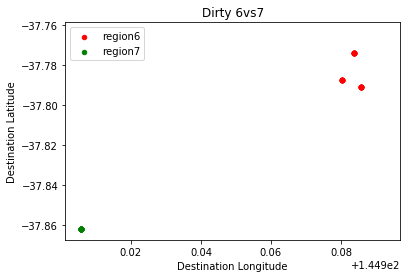

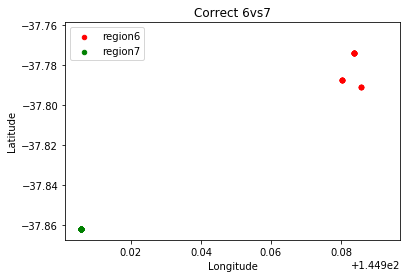

In [102]:
compare_plot('D',6,7)

In [103]:
# make a check point
df5 = df4.copy()

#### 7. Build linear regression model for fare

In [104]:
df5.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time  Travel Time(s)  \
0             144.654173     2018-03-05       06:31:09        11418.06   
1             145.046450     2018-07-01       11:01:15         4213.56   
2             144.950585     2018-04-16       08:04:41        10340.10   
3             144.952078     2018-04-20       20:46:40         3186.42   
4             144.905716     2018-06-26       11:26:35         3069.78   

  Arrival Time   Fare$ weekend    section  Journey Distance(m)  
0      9:41:27   22.12     end    morning              47186.0  
1     12:11:28  272.76     end    morning              13562.0  
2     10:57:01   19.71     end    morning              42962.0  
3     21:39:46   23.87     day  afternoon               9557.0  
4     12:17:44   16.98     day    morning               9177.0

In [105]:
# get dummy variables for categorical data (time section and weekend)
df_section = pd.get_dummies(df5['section'])
df_weekend = pd.get_dummies(df5['weekend'])

# join the 3 dataframes together
df5 = pd.concat([df5,df_weekend,df_section], axis = 1)

df5.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time  ...    Arrival Time  \
0             144.654173     2018-03-05       06:31:09  ...         9:41:27   
1             145.046450     2018-07-01       11:01:15  ...        12:11:28   
2             144.950585     2018-04-16       08:04:41  ...        10:57:01   
3             144.952078     2018-04-20       20:46:40  ...        21:39:46   
4             144.905716     2018-06-26       11:26:35  ...        12:17:44   

    Fare$  weekend    section Journey Distance(m)  day  end  afternoon  \
0   22.12      end    morning             47186.0    0    1          0   
1  272.76      end    morning             13562.0    0    1          0   
2   19.71      end    morning             42962.0    0    1          0   
3   23.87      day  afternoon              9557.0    1    0          1   
4   16.98      day    morning              9177.0    1    0          0   

   morning  night  
0        1      0  
1        1      0  
2        1      0  
3        0      0  
4        1      0  

[5 rows x 21 columns]

Each Uber Type has its own method of calculating dare, therefore, we need to build a model for each Uber Type. Since Journey distance is highly correlated with travel time, we should only include only one of them in to our model.

In [107]:
# extract relevant columns
df_lin = df5[['Uber Type','Travel Time(s)','morning','afternoon','night','day','end','Fare$']].copy()
df_lin.head()

Uber Type  Travel Time(s)  morning  afternoon  night  day  end   Fare$
0          0        11418.06        1          0      0    0    1   22.12
1          2         4213.56        1          0      0    0    1  272.76
2          0        10340.10        1          0      0    0    1   19.71
3          1         3186.42        0          1      0    1    0   23.87
4          1         3069.78        1          0      0    1    0   16.98

In [108]:
# group each uber type
df_lin_0 = df_lin[df_lin['Uber Type'] == 0]
df_lin_1 = df_lin[df_lin['Uber Type'] == 1]
df_lin_2 = df_lin[df_lin['Uber Type'] == 2]

# get independent and target variables
x_0 = df_lin_0.iloc[:,1:-1]
y_0 = df_lin_0.iloc[:,-1]

x_1 = df_lin_1.iloc[:,1:-1]
y_1 = df_lin_1.iloc[:,-1]

x_2 = df_lin_2.iloc[:,1:-1]
y_2 = df_lin_2.iloc[:,-1]

In [109]:
# import library
from sklearn import linear_model

In [110]:
# fit data into model
regr_0 = linear_model.LinearRegression()
regr_0.fit(x_0,y_0)

regr_1 = linear_model.LinearRegression()
regr_1.fit(x_1,y_1)

regr_2 = linear_model.LinearRegression()
regr_2.fit(x_2,y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
# make prediction
y_0_pred = regr_0.predict(x_0)
y_1_pred = regr_1.predict(x_1)
y_2_pred = regr_2.predict(x_2)

In [112]:
# import library
from sklearn.metrics import r2_score

# evaluate model performance
print('model 0:',r2_score(y_0,y_0_pred),'\n','model 1:',r2_score(y_1,y_1_pred),'\n', 'model 2:',r2_score(y_2,y_2_pred),'\n')

model 0: 0.9399358733104856 
 model 1: 0.9431621439655027 
 model 2: 0.9962599931429075 



The R2 score for the three models are all over 0.9, which are pretty good.

#### 8. Check Uber Type (0,1,2)

First, we need to make sure that all Uber Type are 0,1 or 2

In [113]:
# get records that has value for Uber Type other than 0,1 or 2
df_wrong_type = df5[(df5['Uber Type'] != 0) & (df5['Uber Type'] != 1) & (df5['Uber Type'] != 2)].copy()
# extract relevant information for regression
df_wrong_type = df_wrong_type[['Travel Time(s)','morning','afternoon','night','day','end','Fare$']]

df_wrong_type

Travel Time(s)  morning  afternoon  night  day  end  Fare$
135         1357.08        1          0      0    1    0  93.08
138         2684.10        0          1      0    1    0   9.51

The Uber type is wrong for this 2 records, we will now use the linear regression models to figure out the correct Uber type. We will choose the model (uber type) that has the smallest residual.

In [114]:
x = df_wrong_type.iloc[:,:-1]
y = df_wrong_type.iloc[:,-1]
print(x)
print(y)

     Travel Time(s)  morning  afternoon  night  day  end
135         1357.08        1          0      0    1    0
138         2684.10        0          1      0    1    0
135    93.08
138     9.51
Name: Fare$, dtype: float64


In [115]:
# make predictions
print(regr_0.predict(x))
print(regr_1.predict(x))
print(regr_2.predict(x))

[ 6.64392979 12.38089658]
[13.37748874 23.17542629]
[ 98.47631229 178.79989694]


Record 135 should be Uber type 2 and record 138 should be Uber type 0

In [116]:
df5.loc[135, 'Uber Type'] = 2
df5.loc[138, 'Uber Type'] = 0
df5.loc[[135,138]]

ID  Uber Type  Origin Region  Destination Region  \
135  ID5616164584          2              4                   6   
138  ID1314834496          0              3                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
135       -37.806692        144.998209            -37.773845   
138       -37.818862        144.968526            -37.861835   

     Destination Longitude Departure Date Departure Time  ...    Arrival Time  \
135             144.983689     2018-02-23       08:11:18  ...         8:33:55   
138             144.905716     2018-06-05       19:36:21  ...        20:21:05   

     Fare$  weekend    section Journey Distance(m)  day  end  afternoon  \
135  93.08      day    morning              6206.0    1    0          0   
138   9.51      day  afternoon              7676.0    1    0          1   

     morning  night  
135        1      0  
138        0      0  

[2 rows x 21 columns]

In [117]:
# make a checkpoint
df6 = df5.copy()

#### 9. Check relation between Uber Type and Fare

Since we are using a linear regression model to estimate fare, although the models have a pretty high r2 score, but we will never be able to calculate the exact true fare using the model.
If the relationship does not hold between Uber Type and Fare, it can be assume that Uber Type is wrong, since there is no viable way to calculate the true fare.

We will predict the fare for each record using all 3 models, the predicted type (model) would be the one with the least residual.

In [118]:
df6.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time  ...    Arrival Time  \
0             144.654173     2018-03-05       06:31:09  ...         9:41:27   
1             145.046450     2018-07-01       11:01:15  ...        12:11:28   
2             144.950585     2018-04-16       08:04:41  ...        10:57:01   
3             144.952078     2018-04-20       20:46:40  ...        21:39:46   
4             144.905716     2018-06-26       11:26:35  ...        12:17:44   

    Fare$  weekend    section Journey Distance(m)  day  end  afternoon  \
0   22.12      end    morning             47186.0    0    1          0   
1  272.76      end    morning             13562.0    0    1          0   
2   19.71      end    morning             42962.0    0    1          0   
3   23.87      day  afternoon              9557.0    1    0          1   
4   16.98      day    morning              9177.0    1    0          0   

   morning  night  
0        1      0  
1        1      0  
2        1      0  
3        0      0  
4        1      0  

[5 rows x 21 columns]

In [131]:
# get a subset of dataframe to work on
df_lin = df6[['Travel Time(s)','morning','afternoon','night','day','end','Fare$']]

# get independent variables
x = df_lin.iloc[:,:-1]

# predict fare for each record using all 3 models
df6['fare_0'] = regr_0.predict(x)
df6['fare_1'] = regr_1.predict(x)
df6['fare_2'] = regr_2.predict(x)

type_est = []

# choose the models that give the least residual
for index, row in df6.iterrows():
    u_type = 0
    residual = abs(row['Fare$'] - row['fare_0'])
    
    if abs(row['Fare$'] - row['fare_1']) < residual:
        residual = abs(row['Fare$'] - row['fare_1'])
        u_type = 1
        
    if abs(row['Fare$'] - row['fare_2']) < residual:
        residual = abs(row['Fare$'] - row['fare_2'])
        u_type = 2
        
    type_est.append(u_type)

# add new working column
df6['type_est'] = type_est
    
df6.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time    ...     \
0             144.654173     2018-03-05       06:31:09    ...      
1             145.046450     2018-07-01       11:01:15    ...      
2             144.950585     2018-04-16       08:04:41    ...      
3             144.952078     2018-04-20       20:46:40    ...      
4             144.905716     2018-06-26       11:26:35    ...      

   Journey Distance(m) day  end afternoon morning  night     fare_0  \
0              47186.0   0    1         0       1      0  22.957995   
1              13562.0   0    1         0       1      0  12.199490   
2              42962.0   0    1         0       1      0  21.348274   
3               9557.0   1    0         1       0      0  13.131013   
4               9177.0   1    0         0       1      0   9.201511   

      fare_1      fare_2  type_est  
0  54.421863  703.507192         0  
1  25.483885  263.392599         2  
2  50.092072  637.655859         0  
3  25.193072  209.486046         1  
4  20.256811  203.103179         1  

[5 rows x 25 columns]

In [134]:
# records that is inconsistent with our predicted Uber Type

# keep the index
idx_wrong_type = df6[df6['Uber Type'] != df6['type_est']].index
# show records
df6.loc[idx_wrong_type][['Uber Type','Fare$','fare_0','fare_1','fare_2','type_est']]

Uber Type  Fare$     fare_0     fare_1      fare_2  type_est
63           0   8.14   5.319579   9.815280   44.299058         1
126          1   8.35   9.803514  16.242843   73.362992         0
129          2  12.69  11.746026  18.630947   90.474815         0
136          1  26.98  27.731154  61.627372  744.402813         0
142          1  15.44  15.036929  28.339085  187.027503         0

In [137]:
# correct the errors
df6.loc[idx_wrong_type, 'Uber Type'] = df6.loc[idx_wrong_type, 'type_est']
# show the record
df6.loc[idx_wrong_type][['Uber Type','Fare$','fare_0','fare_1','fare_2','type_est']]

Uber Type  Fare$     fare_0     fare_1      fare_2  type_est
63           1   8.14   5.319579   9.815280   44.299058         1
126          0   8.35   9.803514  16.242843   73.362992         0
129          0  12.69  11.746026  18.630947   90.474815         0
136          0  26.98  27.731154  61.627372  744.402813         0
142          0  15.44  15.036929  28.339085  187.027503         0

In [138]:
# make a check point
df7 = df6.copy()

#### 10. Re-run the regression model.

Since we have correct some errors regarding uber type, we need to re run the regression model.

In [139]:
# get a shallow copy to work on
df_lin = df7[['Uber Type','Travel Time(s)','morning','afternoon','night','day','end','Fare$']].copy()

# group each uber type
df_lin_0 = df_lin[df_lin['Uber Type'] == 0]
df_lin_1 = df_lin[df_lin['Uber Type'] == 1]
df_lin_2 = df_lin[df_lin['Uber Type'] == 2]

# get independent and target variables
x_0 = df_lin_0.iloc[:,1:-1]
y_0 = df_lin_0.iloc[:,-1]

x_1 = df_lin_1.iloc[:,1:-1]
y_1 = df_lin_1.iloc[:,-1]

x_2 = df_lin_2.iloc[:,1:-1]
y_2 = df_lin_2.iloc[:,-1]

# fit data into model
regr_0 = linear_model.LinearRegression()
regr_0.fit(x_0,y_0)

regr_1 = linear_model.LinearRegression()
regr_1.fit(x_1,y_1)

regr_2 = linear_model.LinearRegression()
regr_2.fit(x_2,y_2)

# make prediction
y_0_pred = regr_0.predict(x_0)
y_1_pred = regr_1.predict(x_1)
y_2_pred = regr_2.predict(x_2)

# evaluate model performance
print('model 0:',r2_score(y_0,y_0_pred),'\n','model 1:',r2_score(y_1,y_1_pred),'\n', 'model 2:',r2_score(y_2,y_2_pred),'\n')

model 0: 0.9411625127413302 
 model 1: 0.9859481133554084 
 model 2: 0.9997943494023778 



The performance for all 3 models have increased.
The dataframe is now clean, we can drop all working columns and export the output.

In [140]:
df7.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude Departure Date Departure Time    ...     \
0             144.654173     2018-03-05       06:31:09    ...      
1             145.046450     2018-07-01       11:01:15    ...      
2             144.950585     2018-04-16       08:04:41    ...      
3             144.952078     2018-04-20       20:46:40    ...      
4             144.905716     2018-06-26       11:26:35    ...      

   Journey Distance(m) day  end afternoon morning  night     fare_0  \
0              47186.0   0    1         0       1      0  22.957995   
1              13562.0   0    1         0       1      0  12.199490   
2              42962.0   0    1         0       1      0  21.348274   
3               9557.0   1    0         1       0      0  13.131013   
4               9177.0   1    0         0       1      0   9.201511   

      fare_1      fare_2  type_est  
0  54.421863  703.507192         0  
1  25.483885  263.392599         2  
2  50.092072  637.655859         0  
3  25.193072  209.486046         1  
4  20.256811  203.103179         1  

[5 rows x 25 columns]

In [143]:
# drop all working columns
df7 = df7.iloc[:,:-9].drop(columns=['weekend','section'])

ID  Uber Type  Origin Region  Destination Region  \
0    ID1260495501          0              6                   9   
1    ID5124266015          2              6                   8   
2    ID1888132431          0              9                   1   
3    ID3704898422          1              7                   1   
4    ID3769097117          1              1                   7   
5    ID1207382807          0              5                   4   
6    ID3914035215          1              4                   2   
7    ID5323290791          2              4                   8   
8    ID3822247553          1              5                   8   
9    ID3130964711          1              4                   7   
10   ID3697047809          1              2                   3   
11   ID5645524671          2              5                   2   
12   ID1865515832          0              1                   4   
13   ID5153339290          2              9                   3   
14   ID5851877364          2              5                   8   
15   ID3737810420          1              8                   1   
16   ID1611746919          0              8                   4   
17   ID1844955353          0              4                   2   
18   ID3730449880          1              2                   6   
19   ID1733012035          0              5                   4   
20   ID1927297315          0              6                   9   
21   ID1220645840          0              1                   9   
22   ID1484829810          0              3                   1   
23   ID5585843659          2              1                   6   
24   ID1299986778          0              6                   9   
25   ID3967825785          1              2                   9   
26   ID3277136036          1              9                   3   
27   ID1907774189          0              4                   2   
28   ID3342224163          1              4                   5   
29   ID3324016193          1              5                   9   
..            ...        ...            ...                 ...   
253  ID1896408951          0              1                   6   
254  ID3957271507          1              3                   1   
255  ID3977866565          1              1                   7   
256  ID3666534404          1              9                   4   
257  ID3452894613          1              9                   1   
258  ID1384675323          0              2                   3   
259  ID1382980998          0              6                   8   
260  ID5311216777          2              3                   6   
261  ID1184563250          0              1                   8   
262  ID1153260549          0              4                   2   
263  ID3743350527          1              4                   7   
264  ID1528896283          0              6                   2   
265  ID3540255748          1              1                   8   
266  ID1576832918          0              6                   5   
267  ID1302564679          0              4                   3   
268  ID3794821807          1              5                   7   
269  ID1503201516          0              2                   7   
270  ID1732910688          0              9                   4   
271  ID1608961637          0              4                   7   
272  ID5388460007          2              4                   2   
273  ID1970296042          0              1                   9   
274  ID1331816049          0              9                   3   
275  ID1790748198          0              2                   1   
276  ID1742866921          0              1                   3   
277  ID1474405071          0              4                   9   
278  ID5593153756          2              3                   5   
279  ID1795035657          0              9                   2   
280  ID3764266689          1              8                   

In [147]:
# rearrange columns
col = ['ID','Uber Type', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time',  
       'Fare$']
df7 = df7[col]
df7.head()

ID  Uber Type  Origin Region  Destination Region  \
0  ID1260495501          0              6                   9   
1  ID5124266015          2              6                   8   
2  ID1888132431          0              9                   1   
3  ID3704898422          1              7                   1   
4  ID3769097117          1              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -38.110916   
1       -37.773803        144.983647            -37.815834   
2       -38.110916        144.654173            -37.816776   
3       -37.861835        144.905716            -37.805783   
4       -37.805567        144.957651            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.654173              47186.0     2018-03-05       06:31:09   
1             145.046450              13562.0     2018-07-01       11:01:15   
2             144.950585              42962.0     2018-04-16       08:04:41   
3             144.952078               9557.0     2018-04-20       20:46:40   
4             144.905716               9177.0     2018-06-26       11:26:35   

   Travel Time(s) Arrival Time   Fare$  
0        11418.06      9:41:27   22.12  
1         4213.56     12:11:28  272.76  
2        10340.10     10:57:01   19.71  
3         3186.42     21:39:46   23.87  
4         3069.78     12:17:44   16.98

In [150]:
# output
df7.to_csv('29481929_dirty_data_solution.csv',index = False)

## 4. Remove outliers in 29481929_outliers.csv

### Blueprint
1. Predict Fare for each record using the model built in the previous task.
2. Compute residual for each record.
3. Perform residual analysis for each Uber Type.


First, we need to add some new column to determine time section and whether it was a weekday or weekend for each record.

In [169]:
# Load data
df_out = pd.read_csv('29481929_outliers.csv')
df_out.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID3886950302          1              7                   3   
1           1  ID1970549353          0              4                   2   
2           2  ID1883088298          0              2                   1   
3           3  ID5756342803          2              6                   1   
4           4  ID1351783679          0              7                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.821273   
1       -37.802642        144.993873            -37.815892   
2       -37.811481        144.927881            -37.816300   
3       -37.790797        144.985865            -37.806034   
4       -37.861835        144.905716            -37.824296   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.983562               8958.0     2018-06-28       00:10:22   
1             144.938251               5786.0     2018-04-24       08:13:42   
2             144.937246               2189.0     2018-01-10       08:57:59   
3             144.957221               4046.0     2018-05-16       16:02:58   
4             144.984324               8959.0     2018-02-22       04:54:30   

   Travel Time(s) Arrival Time  Fare$  
0         2957.22      0:59:39  27.26  
1         1476.90      8:38:18   6.73  
2          562.98      9:07:21   4.92  
3         1186.92     16:22:44  87.72  
4         2957.46      5:43:47  17.25

In [170]:
# determine weekday or weekend
weekday_end(df_out)
# determine time section
time_section(df_out)
# drop working column
df_out = df_out.drop(columns = ['Departure Time work'])

# get dummy variables for categorical data (time section and weekend)
df_section = pd.get_dummies(df_out['section'])
df_weekend = pd.get_dummies(df_out['weekend'])

# join the 3 dataframes together
df_out = pd.concat([df_out,df_weekend,df_section], axis = 1)

# drop the weekend and section column
df_out = df_out.drop(columns =['weekend','section'])
df_out.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID3886950302          1              7                   3   
1           1  ID1970549353          0              4                   2   
2           2  ID1883088298          0              2                   1   
3           3  ID5756342803          2              6                   1   
4           4  ID1351783679          0              7                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.821273   
1       -37.802642        144.993873            -37.815892   
2       -37.811481        144.927881            -37.816300   
3       -37.790797        144.985865            -37.806034   
4       -37.861835        144.905716            -37.824296   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.983562               8958.0     2018-06-28       00:10:22   
1             144.938251               5786.0     2018-04-24       08:13:42   
2             144.937246               2189.0     2018-01-10       08:57:59   
3             144.957221               4046.0     2018-05-16       16:02:58   
4             144.984324               8959.0     2018-02-22       04:54:30   

   Travel Time(s) Arrival Time  Fare$  day  end  afternoon  morning  night  
0         2957.22      0:59:39  27.26    1    0          0        0      1  
1         1476.90      8:38:18   6.73    1    0          0        1      0  
2          562.98      9:07:21   4.92    1    0          0        1      0  
3         1186.92     16:22:44  87.72    1    0          1        0      0  
4         2957.46      5:43:47  17.25    1    0          0        0      1

In [171]:
# initialize empty list to store prediction
fare_pred = []
# extract subset of dataframe
temp_df = df_out[['Uber Type','Travel Time(s)','morning','afternoon','night','day','end']]
# loop over dataframe and predict fare for each row
for index, row in temp_df.iterrows():
    if row['Uber Type'] == 0:
        fare_predict = regr_0.predict(row[1:].values.reshape(1,6))
    elif row['Uber Type'] == 1:
        fare_predict = regr_1.predict(row[1:].values.reshape(1,6))
    elif row['Uber Type'] == 2:
        fare_predict = regr_2.predict(row[1:].values.reshape(1,6))
    # append result to result list    
    fare_pred.append(round(fare_predict[0],2))
# add a new column to dataframe    
df_out['fare_pred'] = fare_pred

In [172]:
# add residual column
df_out['residual'] =  df_out['Fare$'] - df_out['fare_pred']
df_out.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID3886950302          1              7                   3   
1           1  ID1970549353          0              4                   2   
2           2  ID1883088298          0              2                   1   
3           3  ID5756342803          2              6                   1   
4           4  ID1351783679          0              7                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.821273   
1       -37.802642        144.993873            -37.815892   
2       -37.811481        144.927881            -37.816300   
3       -37.790797        144.985865            -37.806034   
4       -37.861835        144.905716            -37.824296   

   Destination Longitude  Journey Distance(m)    ...    Travel Time(s)  \
0             144.983562               8958.0    ...           2957.22   
1             144.938251               5786.0    ...           1476.90   
2             144.937246               2189.0    ...            562.98   
3             144.957221               4046.0    ...           1186.92   
4             144.984324               8959.0    ...           2957.46   

  Arrival Time  Fare$ day  end  afternoon  morning  night  fare_pred  residual  
0      0:59:39  27.26   1    0          0        0      1      29.92     -2.66  
1      8:38:18   6.73   1    0          0        1      0       6.69      0.04  
2      9:07:21   4.92   1    0          0        1      0       5.32     -0.40  
3     16:22:44  87.72   1    0          1        0      0      93.78     -6.06  
4      5:43:47  17.25   1    0          0        0      1      15.66      1.59  

[5 rows x 22 columns]

**Uber Type 0**

(array([ 1.,  2.,  0.,  3.,  0.,  2.,  2.,  9., 16.,  8.]),
 array([-13.955 , -12.1395, -10.324 ,  -8.5085,  -6.693 ,  -4.8775,
         -3.062 ,  -1.2465,   0.569 ,   2.3845,   4.2   ]),
 <a list of 10 Patch objects>)

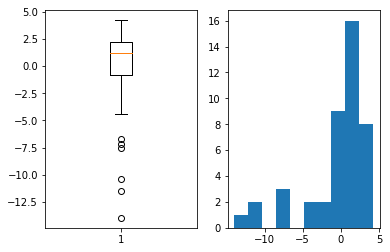

In [173]:
# residual anlysis for Uber Type 0
plt.subplot(1,2,1)
plt.boxplot(df_out[df_out['Uber Type'] == 0]['residual'])

plt.subplot(1,2,2)
plt.hist(df_out[df_out['Uber Type'] == 0]['residual'])

In [174]:
# keep track of index
out_0_idx = df_out[(df_out['Uber Type'] == 0)& (df_out['residual'] < -5)].index
# show result to be removed
df_out[(df_out['Uber Type'] == 0)& (df_out['residual'] < -5)]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
35          35  ID1511611392          0              7                   3   
49          49  ID1316779401          0              3                   9   
65          65  ID1492433093          0              4                   7   
79          79  ID1852244010          0              9                   8   
82          82  ID1161333543          0              5                   9   
83          83  ID1881492811          0              4                   2   

    Origin Latitude  Origin Longitude  Destination Latitude  \
35       -37.861835        144.905716            -37.817059   
49       -37.815171        144.984583            -38.110916   
65       -37.809021        145.010170            -37.861835   
79       -38.110916        144.654173            -37.815834   
82       -37.815946        144.928586            -38.110916   
83       -37.816298        145.015465            -37.821074   

    Destination Longitude  Journey Distance(m)    ...    Travel Time(s)  \
35             144.977876               8775.0    ...           2944.38   
49             144.654173              45401.0    ...          10865.82   
65             144.905716              12154.0    ...           3861.54   
79             145.046450              51032.0    ...          12681.06   
82             144.654173              44216.0    ...          10628.82   
83             144.947273               7839.0    ...           2017.56   

   Arrival Time   Fare$ day  end  afternoon  morning  night  fare_pred  \
35      0:02:00   8.130   1    0          0        0      1      15.64   
49      0:24:12  16.045   1    0          0        0      1      27.51   
65     17:36:28   7.300   1    0          1        0      0      14.04   
79      6:06:35  16.275   1    0          0        0      1      30.23   
82      3:44:41  16.780   1    0          0        0      1      27.15   
83     21:49:25   8.440   0    1          0        0      1      15.63   

    residual  
35    -7.510  
49   -11.465  
65    -6.740  
79   -13.955  
82   -10.370  
83    -7.190  

[6 rows x 22 columns]

These 6 records need to be removed.

**Uber Type 1**

(array([ 1.,  1.,  0.,  0.,  0.,  1.,  1.,  5.,  9., 13.]),
 array([-34.5  , -30.941, -27.382, -23.823, -20.264, -16.705, -13.146,
         -9.587,  -6.028,  -2.469,   1.09 ]),
 <a list of 10 Patch objects>)

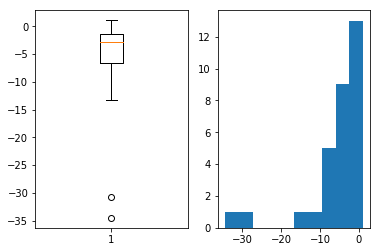

In [175]:
# residual anlysis for Uber Type 1
plt.subplot(1,2,1)
plt.boxplot(df_out[df_out['Uber Type'] == 1]['residual'])

plt.subplot(1,2,2)
plt.hist(df_out[df_out['Uber Type'] == 1]['residual'])

In [176]:
# keep track of index
out_1_idx = df_out[(df_out['Uber Type'] == 1)& (df_out['residual'] < -25)].index
# show result to be removed
df_out[(df_out['Uber Type'] == 1)& (df_out['residual'] < -25)]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
7            7  ID3662194749          1              6                   9   
47          47  ID3208390368          1              9                   6   

    Origin Latitude  Origin Longitude  Destination Latitude  \
7        -37.773845        144.983689            -38.110916   
47       -38.110916        144.654173            -37.790797   

    Destination Longitude  Journey Distance(m)    ...    Travel Time(s)  \
7              144.654173              48197.0    ...          11519.40   
47             144.985865              47193.0    ...          11535.78   

   Arrival Time  Fare$ day  end  afternoon  morning  night  fare_pred  \
7      19:40:08  27.10   0    1          1        0      0      61.60   
47     15:01:50  25.58   0    1          0        1      0      56.34   

    residual  
7     -34.50  
47    -30.76  

[2 rows x 22 columns]

**Uber Type 2**

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2., 10.]),
 array([-368.825 , -331.9885, -295.152 , -258.3155, -221.479 , -184.6425,
        -147.806 , -110.9695,  -74.133 ,  -37.2965,   -0.46  ]),
 <a list of 10 Patch objects>)

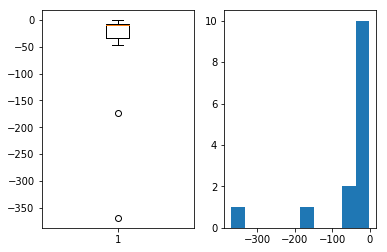

In [177]:
# residual anlysis for Uber Type 2
plt.subplot(1,2,1)
plt.boxplot(df_out[df_out['Uber Type'] == 2]['residual'])

plt.subplot(1,2,2)
plt.hist(df_out[df_out['Uber Type'] == 2]['residual'])

In [178]:
# keep track of index
out_2_idx = df_out[(df_out['Uber Type'] == 2)& (df_out['residual'] < -150)].index
# show result to be removed
df_out[(df_out['Uber Type'] == 2)& (df_out['residual'] < -150)]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
75          75  ID5829477920          2              3                   9   
76          76  ID5482843789          2              8                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
75       -37.824563        144.982912            -38.110916   
76       -37.815834        145.046450            -37.861835   

    Destination Longitude  Journey Distance(m)    ...    Travel Time(s)  \
75             144.654173              45620.0    ...          11014.86   
76             144.905716              15151.0    ...           4917.48   

   Arrival Time    Fare$ day  end  afternoon  morning  night  fare_pred  \
75      1:37:25  330.095   1    0          0        0      1     698.92   
76      5:02:37  155.715   1    0          0        0      1     329.30   

    residual  
75  -368.825  
76  -173.585  

[2 rows x 22 columns]

In [179]:
# concatenate all index for record to be dropped
remove_idx = list(out_0_idx)+list(out_1_idx)+list(out_2_idx)
remove_idx

[35, 49, 65, 79, 82, 83, 7, 47, 75, 76]

In [180]:
# remove outliers
df_out = df_out.drop(remove_idx)

# remove all working columns
df_out = df_out.drop(columns = ['day','end','morning','afternoon', 'night','fare_pred','residual'])
df_out.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID3886950302          1              7                   3   
1           1  ID1970549353          0              4                   2   
2           2  ID1883088298          0              2                   1   
3           3  ID5756342803          2              6                   1   
4           4  ID1351783679          0              7                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.821273   
1       -37.802642        144.993873            -37.815892   
2       -37.811481        144.927881            -37.816300   
3       -37.790797        144.985865            -37.806034   
4       -37.861835        144.905716            -37.824296   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.983562               8958.0     2018-06-28       00:10:22   
1             144.938251               5786.0     2018-04-24       08:13:42   
2             144.937246               2189.0     2018-01-10       08:57:59   
3             144.957221               4046.0     2018-05-16       16:02:58   
4             144.984324               8959.0     2018-02-22       04:54:30   

   Travel Time(s) Arrival Time  Fare$  
0         2957.22      0:59:39  27.26  
1         1476.90      8:38:18   6.73  
2          562.98      9:07:21   4.92  
3         1186.92     16:22:44  87.72  
4         2957.46      5:43:47  17.25

In [182]:
# output file
df_out.to_csv('29481929_outliers_solution.csv', index = False)

## 5. Impute missing values in 29481929_missing_value.csv

In [190]:
# read file
df_mis = pd.read_csv('29481929_missing_value.csv')
df_mis.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID5554381742        2.0              1                   3   
1  ID1779062347        NaN              7                   4   
2  ID1613623572        NaN              4                   3   
3  ID3370932428        NaN              7                   9   
4  ID3969526177        1.0              8                   5   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.818518        144.967095            -37.817889   
1       -37.861835        144.905716            -37.812756   
2       -37.816983        145.010877            -37.824930   
3       -37.861835        144.905716            -38.110916   
4       -37.815834        145.046450            -37.805151   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             145.008641               4027.0     2018-04-19       08:00:46   
1             145.010281              12119.0     2018-06-16       19:05:39   
2             144.982805               3525.0     2018-02-09       18:01:22   
3             144.654173              50797.0     2018-04-02       19:35:15   
4             144.928088              10738.0     2018-06-13       10:00:47   

   Travel Time(s) Arrival Time  Fare$  
0         1021.68      8:17:47  93.51  
1         3889.62     20:10:28  18.05  
2          879.72     18:16:01   8.78  
3        13173.36     23:14:48  58.63  
4         2992.56     10:50:39  16.62

In [191]:
# quick exploration for missing value
df_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
Unnamed: 0               84 non-null object
Uber Type                66 non-null float64
Origin Region            84 non-null int64
Destination Region       84 non-null int64
Origin Latitude          84 non-null float64
Origin Longitude         84 non-null float64
Destination Latitude     84 non-null float64
Destination Longitude    84 non-null float64
Journey Distance(m)      84 non-null float64
Departure Date           84 non-null object
Departure Time           84 non-null object
Travel Time(s)           84 non-null float64
Arrival Time             84 non-null object
Fare$                    68 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 9.3+ KB


There are missing values in both the Uber Type and Fare$ column.
- To estimate uber type, all 3 models will be run on each row, and we will choose the one that gives the least residuals.
- To estimate fare, we will run the regression model for that uber type.

Before running the regression model, we need to add the necessary features to the dataframe as before.

In [192]:
# determine weekday or weekend
weekday_end(df_mis)
# determine time section
time_section(df_mis)
# drop working column
df_mis = df_mis.drop(columns = ['Departure Time work'])

# get dummy variables for categorical data (time section and weekend)
df_section = pd.get_dummies(df_mis['section'])
df_weekend = pd.get_dummies(df_mis['weekend'])

# join the 3 dataframes together
df_mis = pd.concat([df_mis,df_weekend,df_section], axis = 1)

# drop the weekend and section column
df_mis = df_mis.drop(columns =['weekend','section'])
df_mis.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID5554381742        2.0              1                   3   
1  ID1779062347        NaN              7                   4   
2  ID1613623572        NaN              4                   3   
3  ID3370932428        NaN              7                   9   
4  ID3969526177        1.0              8                   5   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.818518        144.967095            -37.817889   
1       -37.861835        144.905716            -37.812756   
2       -37.816983        145.010877            -37.824930   
3       -37.861835        144.905716            -38.110916   
4       -37.815834        145.046450            -37.805151   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             145.008641               4027.0     2018-04-19       08:00:46   
1             145.010281              12119.0     2018-06-16       19:05:39   
2             144.982805               3525.0     2018-02-09       18:01:22   
3             144.654173              50797.0     2018-04-02       19:35:15   
4             144.928088              10738.0     2018-06-13       10:00:47   

   Travel Time(s) Arrival Time  Fare$  day  end  afternoon  morning  night  
0         1021.68      8:17:47  93.51    1    0          0        1      0  
1         3889.62     20:10:28  18.05    1    0          1        0      0  
2          879.72     18:16:01   8.78    1    0          1        0      0  
3        13173.36     23:14:48  58.63    0    1          1        0      0  
4         2992.56     10:50:39  16.62    1    0          0        1      0

#### 1. Impute missing values for Uber Type

In [194]:
# get a subset of dataframe to work on
df_lin = df_mis[['Travel Time(s)','morning','afternoon','night','day','end','Fare$']]

# get independent variables
x = df_lin.iloc[:,:-1]

# predict fare for each record using all 3 models
df_mis['fare_0'] = regr_0.predict(x)
df_mis['fare_1'] = regr_1.predict(x)
df_mis['fare_2'] = regr_2.predict(x)

type_est = []

# choose the models that give the least residual
for index, row in df_mis.iterrows():
    u_type = 0
    residual = abs(row['Fare$'] - row['fare_0'])
    
    if abs(row['Fare$'] - row['fare_1']) < residual:
        residual = abs(row['Fare$'] - row['fare_1'])
        u_type = 1
        
    if abs(row['Fare$'] - row['fare_2']) < residual:
        residual = abs(row['Fare$'] - row['fare_2'])
        u_type = 2
        
    type_est.append(u_type)

# add new working column
df_mis['type_est'] = type_est
    
df_mis.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID5554381742        2.0              1                   3   
1  ID1779062347        NaN              7                   4   
2  ID1613623572        NaN              4                   3   
3  ID3370932428        NaN              7                   9   
4  ID3969526177        1.0              8                   5   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.818518        144.967095            -37.817889   
1       -37.861835        144.905716            -37.812756   
2       -37.816983        145.010877            -37.824930   
3       -37.861835        144.905716            -38.110916   
4       -37.815834        145.046450            -37.805151   

   Destination Longitude  Journey Distance(m) Departure Date    ...     Fare$  \
0             145.008641               4027.0     2018-04-19    ...     93.51   
1             145.010281              12119.0     2018-06-16    ...     18.05   
2             144.982805               3525.0     2018-02-09    ...      8.78   
3             144.654173              50797.0     2018-04-02    ...     58.63   
4             144.928088              10738.0     2018-06-13    ...     16.62   

   day end  afternoon  morning  night     fare_0     fare_1      fare_2  \
0    1   0          0        1      0   6.007204  11.367065   75.858886   
1    1   0          1        0      0  14.077732  28.506889  257.617776   
2    1   0          1        0      0   9.569977  16.104499   75.158766   
3    0   1          1        0      0  29.351349  68.412596  822.471472   
4    1   0          0        1      0   8.958879  19.488140  195.332892   

   type_est  
0         2  
1         0  
2         0  
3         1  
4         1  

[5 rows x 23 columns]

In [200]:
# get index
idx_mis_type = df_mis[df_mis['Uber Type'].isnull()].index
# show records
df_mis[df_mis['Uber Type'].isnull()]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
1   ID1779062347        NaN              7                   4   
2   ID1613623572        NaN              4                   3   
3   ID3370932428        NaN              7                   9   
5   ID3693428814        NaN              5                   3   
6   ID5212641619        NaN              9                   5   
7   ID1767409779        NaN              8                   3   
11  ID3917568105        NaN              8                   1   
12  ID5922742063        NaN              1                   2   
14  ID1786393253        NaN              8                   9   
15  ID1270650569        NaN              1                   8   
18  ID3111399202        NaN              7                   4   
19  ID1290825326        NaN              2                   8   
20  ID1216923298        NaN              8                   3   
24  ID1687861691        NaN              2                   4   
26  ID5986242676        NaN              2                   6   
27  ID1401288889        NaN              4                   5   
32  ID3196171623        NaN              3                   9   
38  ID1617690250        NaN              7                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
1        -37.861835        144.905716            -37.812756   
2        -37.816983        145.010877            -37.824930   
3        -37.861835        144.905716            -38.110916   
5        -37.796004        144.936076            -37.823207   
6        -38.110916        144.654173            -37.816121   
7        -37.815834        145.046450            -37.815613   
11       -37.815834        145.046450            -37.812934   
12       -37.809257        144.972146            -37.820384   
14       -37.807202        145.026637            -38.110916   
15       -37.806185        144.955150            -37.815834   
18       -37.861835        144.905716            -37.811334   
19       -37.817930        144.946140            -37.815834   
20       -37.807202        145.026637            -37.810429   
24       -37.819732        144.946777            -37.798740   
26       -37.814321        144.938075            -37.773845   
27       -37.801751        144.995098            -37.816042   
32       -37.814180        144.979302            -38.110916   
38       -37.861835        144.905716            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date    ...     \
1              145.010281              12119.0     2018-06-16    ...      
2              144.982805               3525.0     2018-02-09    ...      
3              144.654173              50797.0     2018-04-02    ...      
5              145.008204               8280.0     2018-06-23    ...      
6              144.928757              44188.0     2018-05-11    ...      
7              144.987888               5691.0     2018-02-03    ...      
11             144.948335              10323.0     2018-07-22    ...      
12             144.949541               2732.0     2018-03-13    ...      
14             144.654173              49777.0     2018-04-27    ...      
15             145.046450               8167.0     2018-01-03    ...      
18             145.008678              11789.0     2018-05-06    ...      
19             145.046450               9461.0     2018-05-28    ...      
20             144.984431               4457.0     2018-04-10    ...      
24             144.989296               5371.0     2018-03-25    ...      
26             144.983689               6944.0     2018-07-16    ...      
27             144.928669               7696.0     2018-06-03    ...      
32             144.654173              44932.0     2018-04-13    ...      
38             145.046450              15151.0     2018-01-23    ...      

     Fare$  day end  afternoon  morning  night     fare_0     fare_1  \
1    18.05    1   0          1        0      0  14.0777

In [201]:
# change records
df_mis.loc[idx_mis_type ,'Uber Type'] = df_mis.loc[idx_mis_type,'type_est']
df_mis.loc[idx_mis_type]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
1   ID1779062347        0.0              7                   4   
2   ID1613623572        0.0              4                   3   
3   ID3370932428        1.0              7                   9   
5   ID3693428814        1.0              5                   3   
6   ID5212641619        2.0              9                   5   
7   ID1767409779        0.0              8                   3   
11  ID3917568105        1.0              8                   1   
12  ID5922742063        2.0              1                   2   
14  ID1786393253        0.0              8                   9   
15  ID1270650569        0.0              1                   8   
18  ID3111399202        1.0              7                   4   
19  ID1290825326        0.0              2                   8   
20  ID1216923298        0.0              8                   3   
24  ID1687861691        0.0              2                   4   
26  ID5986242676        2.0              2                   6   
27  ID1401288889        0.0              4                   5   
32  ID3196171623        1.0              3                   9   
38  ID1617690250        0.0              7                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
1        -37.861835        144.905716            -37.812756   
2        -37.816983        145.010877            -37.824930   
3        -37.861835        144.905716            -38.110916   
5        -37.796004        144.936076            -37.823207   
6        -38.110916        144.654173            -37.816121   
7        -37.815834        145.046450            -37.815613   
11       -37.815834        145.046450            -37.812934   
12       -37.809257        144.972146            -37.820384   
14       -37.807202        145.026637            -38.110916   
15       -37.806185        144.955150            -37.815834   
18       -37.861835        144.905716            -37.811334   
19       -37.817930        144.946140            -37.815834   
20       -37.807202        145.026637            -37.810429   
24       -37.819732        144.946777            -37.798740   
26       -37.814321        144.938075            -37.773845   
27       -37.801751        144.995098            -37.816042   
32       -37.814180        144.979302            -38.110916   
38       -37.861835        144.905716            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date    ...     \
1              145.010281              12119.0     2018-06-16    ...      
2              144.982805               3525.0     2018-02-09    ...      
3              144.654173              50797.0     2018-04-02    ...      
5              145.008204               8280.0     2018-06-23    ...      
6              144.928757              44188.0     2018-05-11    ...      
7              144.987888               5691.0     2018-02-03    ...      
11             144.948335              10323.0     2018-07-22    ...      
12             144.949541               2732.0     2018-03-13    ...      
14             144.654173              49777.0     2018-04-27    ...      
15             145.046450               8167.0     2018-01-03    ...      
18             145.008678              11789.0     2018-05-06    ...      
19             145.046450               9461.0     2018-05-28    ...      
20             144.984431               4457.0     2018-04-10    ...      
24             144.989296               5371.0     2018-03-25    ...      
26             144.983689               6944.0     2018-07-16    ...      
27             144.928669               7696.0     2018-06-03    ...      
32             144.654173              44932.0     2018-04-13    ...      
38             145.046450              15151.0     2018-01-23    ...      

     Fare$  day end  afternoon  morning  night     fare_0     fare_1  \
1    18.05    1   0          1        0      0  14.0777

#### 2. impute missing values for fare

In [207]:
# get index
idx_mis_fare_0 = df_mis[(df_mis['Fare$'].isnull())&(df_mis['Uber Type'] == 0)].index
idx_mis_fare_1 = df_mis[(df_mis['Fare$'].isnull())&(df_mis['Uber Type'] == 1)].index
idx_mis_fare_2 = df_mis[(df_mis['Fare$'].isnull())&(df_mis['Uber Type'] == 2)].index
# show records
df_mis.loc[idx_mis_fare_0]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
40  ID1904541501        0.0              9                   2   
46  ID1340199927        0.0              8                   6   
53  ID1983776185        0.0              1                   9   
56  ID1457703077        0.0              3                   5   
59  ID1942576256        0.0              3                   2   
66  ID1487103761        0.0              2                   5   
71  ID1446908244        0.0              5                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
40       -38.110916        144.654173            -37.812390   
46       -37.807202        145.026637            -37.773803   
53       -37.810511        144.954855            -38.110916   
56       -37.824679        144.970532            -37.809397   
59       -37.823277        144.970022            -37.813250   
66       -37.812210        144.937550            -37.808635   
71       -37.809912        144.935947            -37.861835   

    Destination Longitude  Journey Distance(m) Departure Date    ...    Fare$  \
40             144.936933              42910.0     2018-06-16    ...      NaN   
46             144.983647              11470.0     2018-01-26    ...      NaN   
53             144.654173              42958.0     2018-01-15    ...      NaN   
56             144.937837               4204.0     2018-07-07    ...      NaN   
59             144.939769               3640.0     2018-06-12    ...      NaN   
66             144.923068               1613.0     2018-07-01    ...      NaN   
71             144.905716              10552.0     2018-07-14    ...      NaN   

    day end  afternoon  morning  night     fare_0     fare_1      fare_2  \
40    1   0          0        0      1  26.628037  60.086702  654.269469   
46    1   0          1        0      0  13.432727  26.732258  231.510116   
53    0   1          1        0      0  25.168162  56.903208  653.149947   
56    1   0          1        0      0   9.853211  16.883774   86.623150   
59    1   0          0        1      0   5.882660  11.024401   70.817757   
66    0   1          0        1      0   6.480126  10.550952   41.629435   
71    1   0          0        1      0   9.607927  21.273896  221.604226   

    type_est  
40         0  
46         0  
53         0  
56         0  
59         0  
66         0  
71         0  

[7 rows x 23 columns]

In [209]:
# change records for type 0
df_mis.loc[idx_mis_fare_0 ,'Fare$'] = round(df_mis.loc[idx_mis_fare_0,'fare_0'],2)
df_mis.loc[idx_mis_fare_0]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
40  ID1904541501        0.0              9                   2   
46  ID1340199927        0.0              8                   6   
53  ID1983776185        0.0              1                   9   
56  ID1457703077        0.0              3                   5   
59  ID1942576256        0.0              3                   2   
66  ID1487103761        0.0              2                   5   
71  ID1446908244        0.0              5                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
40       -38.110916        144.654173            -37.812390   
46       -37.807202        145.026637            -37.773803   
53       -37.810511        144.954855            -38.110916   
56       -37.824679        144.970532            -37.809397   
59       -37.823277        144.970022            -37.813250   
66       -37.812210        144.937550            -37.808635   
71       -37.809912        144.935947            -37.861835   

    Destination Longitude  Journey Distance(m) Departure Date    ...     \
40             144.936933              42910.0     2018-06-16    ...      
46             144.983647              11470.0     2018-01-26    ...      
53             144.654173              42958.0     2018-01-15    ...      
56             144.937837               4204.0     2018-07-07    ...      
59             144.939769               3640.0     2018-06-12    ...      
66             144.923068               1613.0     2018-07-01    ...      
71             144.905716              10552.0     2018-07-14    ...      

    Fare$  day end  afternoon  morning  night     fare_0     fare_1  \
40  26.63    1   0          0        0      1  26.628037  60.086702   
46  13.43    1   0          1        0      0  13.432727  26.732258   
53  25.17    0   1          1        0      0  25.168162  56.903208   
56   9.85    1   0          1        0      0   9.853211  16.883774   
59   5.88    1   0          0        1      0   5.882660  11.024401   
66   6.48    0   1          0        1      0   6.480126  10.550952   
71   9.61    1   0          0        1      0   9.607927  21.273896   

        fare_2  type_est  
40  654.269469         0  
46  231.510116         0  
53  653.149947         0  
56   86.623150         0  
59   70.817757         0  
66   41.629435         0  
71  221.604226         0  

[7 rows x 23 columns]

In [210]:
# change records for type 1
df_mis.loc[idx_mis_fare_1 ,'Fare$'] = round(df_mis.loc[idx_mis_fare_1,'fare_1'],2)
df_mis.loc[idx_mis_fare_1]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
45  ID3583440354        1.0              3                   1   
69  ID3886055713        1.0              8                   7   
73  ID3290622474        1.0              7                   1   
77  ID3173234961        1.0              9                   7   
79  ID3392337922        1.0              4                   3   
80  ID3984069546        1.0              9                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
45       -37.819882        144.996867            -37.812318   
69       -37.815834        145.046450            -37.861835   
73       -37.861835        144.905716            -37.819726   
77       -38.110916        144.654173            -37.861835   
79       -37.803492        145.019590            -37.813973   
80       -38.110916        144.654173            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date    ...     \
45             144.962296               3698.0     2018-02-23    ...      
69             144.905716              15151.0     2018-04-13    ...      
73             144.969655               7664.0     2018-02-05    ...      
77             144.905716              50797.0     2018-04-05    ...      
79             144.971537               6014.0     2018-07-23    ...      
80             145.046450              51032.0     2018-05-11    ...      

    Fare$  day end  afternoon  morning  night     fare_0     fare_1  \
45  21.63    1   0          0        0      1  12.650356  21.629280   
69  38.00    1   0          0        0      1  18.599533  37.997518   
73  30.36    0   1          0        0      1  16.593705  30.361512   
77  61.57    1   0          0        1      0  24.253437  61.568745   
79  20.57    0   1          1        0      0  11.963356  20.572228   
80  69.99    1   0          0        0      1  30.226603  69.987599   

        fare_2  type_est  
45   88.499232         0  
69  329.302207         0  
73  194.741215         0  
77  814.405966         0  
79  118.663074         0  
80  799.927517         0  

[6 rows x 23 columns]

In [211]:
# change records for type 2
df_mis.loc[idx_mis_fare_2 ,'Fare$'] = round(df_mis.loc[idx_mis_fare_2,'fare_2'],2)
df_mis.loc[idx_mis_fare_2]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
50  ID5315453718        2.0              5                   1   
55  ID5233456411        2.0              4                   3   
68  ID5272174163        2.0              7                   3   

    Origin Latitude  Origin Longitude  Destination Latitude  \
50       -37.811313        144.929907            -37.805266   
55       -37.813214        145.014196            -37.819725   
68       -37.861835        144.905716            -37.815282   

    Destination Longitude  Journey Distance(m) Departure Date    ...     \
50             144.955172               3388.0     2018-03-17    ...      
55             144.970330               5123.0     2018-05-19    ...      
68             145.002933              11138.0     2018-07-19    ...      

     Fare$  day end  afternoon  morning  night     fare_0     fare_1  \
50   84.04    1   0          0        0      1  12.540189  21.326174   
55  102.58    1   0          1        0      0  10.247421  17.968381   
68  236.96    1   0          1        0      0  13.567336  27.102612   

        fare_2  type_est  
50   84.040053         0  
55  102.579447         0  
68  236.958608         0  

[3 rows x 23 columns]

In [213]:
df_mis = df_mis.iloc[:,:-9]
df_mis

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0   ID5554381742        2.0              1                   3   
1   ID1779062347        0.0              7                   4   
2   ID1613623572        0.0              4                   3   
3   ID3370932428        1.0              7                   9   
4   ID3969526177        1.0              8                   5   
5   ID3693428814        1.0              5                   3   
6   ID5212641619        2.0              9                   5   
7   ID1767409779        0.0              8                   3   
8   ID1221032080        0.0              7                   5   
9   ID1450755214        0.0              9                   5   
10  ID1522296543        0.0              7                   6   
11  ID3917568105        1.0              8                   1   
12  ID5922742063        2.0              1                   2   
13  ID1157691004        0.0              7                   1   
14  ID1786393253        0.0              8                   9   
15  ID1270650569        0.0              1                   8   
16  ID3226304678        1.0              8                   7   
17  ID1875664905        0.0              4                   7   
18  ID3111399202        1.0              7                   4   
19  ID1290825326        0.0              2                   8   
20  ID1216923298        0.0              8                   3   
21  ID3515372985        1.0              4                   1   
22  ID1244949174        0.0              5                   3   
23  ID1431558222        0.0              6                   8   
24  ID1687861691        0.0              2                   4   
25  ID5321272392        2.0              3                   1   
26  ID5986242676        2.0              2                   6   
27  ID1401288889        0.0              4                   5   
28  ID1917051946        0.0              7                   8   
29  ID3432439544        1.0              8                   4   
..           ...        ...            ...                 ...   
54  ID1956168005        0.0              4                   3   
55  ID5233456411        2.0              4                   3   
56  ID1457703077        0.0              3                   5   
57  ID3282332497        1.0              8                   1   
58  ID5938553119        2.0              8                   5   
59  ID1942576256        0.0              3                   2   
60  ID1776257686        0.0              4                   7   
61  ID1729298503        0.0              7                   3   
62  ID1359517067        0.0              5                   1   
63  ID3343492914        1.0              9                   8   
64  ID3489094980        1.0              7                   4   
65  ID3934210420        1.0              3                   6   
66  ID1487103761        0.0              2                   5   
67  ID1633384068        0.0              8                   3   
68  ID5272174163        2.0              7                   3   
69  ID3886055713        1.0              8                   7   
70  ID1247045255        0.0              3                   1   
71  ID1446908244        0.0              5                   7   
72  ID1788004626        0.0              9                   2   
73  ID3290622474        1.0              7                   1   
74  ID1141989580        0.0              2                   6   
75  ID1925200614        0.0              5                   8   
76  ID3706956277        1.0              7                   5   
77  ID3173234961        1.0              9                   7   
78  ID3692428378        1.0              6                   7   
79  ID3392337922        1.0              4                   3   
80  ID3984069546        1.0              9                   8   
81  ID1966851818        0.0              4                   1   
82  ID3238505829        1.0              8    

In [214]:
# output file
df_mis.to_csv('29481929.missing_value_solution.csv',index  = False)